In [180]:
from pathlib import Path
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import torch

sns.set(
    context="notebook",
    style="ticks",
    font_scale=1.8,
    rc={"figure.dpi": 300, "figure.constrained_layout.use": True, "lines.linewidth": 3},
)

results_path = Path.cwd().resolve().parent / "benchmarks/results/"
mcts_path = Path.cwd().resolve().parent / "tgnnexplainer/xgraph/saved_mcts_results"

os.makedirs("plots", exist_ok=True)
plot_only_og = True
explainers = ["xtg", "attn", "pbone", "pg", "xtg-d", "xtg-og"]
labels = {
    "xtg": "MLPNavigator",
    "attn": "ATTN",
    "pbone": "PBONE",
    "pg": "PG",
    "xtg-d": "DotProductNavigator",
    "xtg-non": "PGNavigator (NO NAV)",
    "xtg-og": "PGNavigator",
}
dataset_to_index = {
    "simulate_v1": "Synthetic V1",
    "simulate_v2": "Synthetic V2",
    "wikipedia": "Wikipedia",
    "reddit": "Reddit",
}
markers = {"xtg-og": "s", "attn": "o", "pbone": "^", "pg": "X", "xtg-d": "P", "xtg": "X"}

In [139]:
## Their data
df_tgat_theirs = {
    ("Wikipedia", "Best FID"): {
        "ATTN": 0.891,
        "PBONE": 0.027,
        "PG": 1.354,
        "THEIRS": 1.836,
    },
    ("Wikipedia", "AUFSC"): {
        "ATTN": 0.564,
        "PBONE": -2.227,
        "PG": 0.564,
        "THEIRS": 1.477,
    },
    ("Reddit", "Best FID"): {
        "ATTN": 0.658,
        "PBONE": 0.167,
        "PG": 0.804,
        "THEIRS": 1.518,
    },
    ("Reddit", "AUFSC"): {
        "ATTN": -0.654,
        "PBONE": -2.492,
        "PG": -0.369,
        "THEIRS": 1.076,
    },
    ("Simulate V1", "Best FID"): {
        "ATTN": 0.555,
        "PBONE": 0.044,
        "PG": 0.555,
        "THEIRS": 0.78,
    },
    ("Simulate V1", "AUFSC"): {
        "ATTN": -0.081,
        "PBONE": -2.882,
        "PG": 0.39,
        "THEIRS": 0.666,
    },
    ("Simulate V2", "Best FID"): {
        "ATTN": 0.605,
        "PBONE": 0.096,
        "PG": 1.329,
        "THEIRS": 1.63,
    },
    ("Simulate V2", "AUFSC"): {
        "ATTN": 0.291,
        "PBONE": -4.771,
        "PG": -0.926,
        "THEIRS": 1.331,
    },
}

df_tgn_theirs = {
    ("Wikipedia", "Best FID"): {
        "ATTN": 0.479,
        "PBONE": 0.296,
        "PG": 0.464,
        "THEIRS": 0.866,
    },
    ("Wikipedia", "AUFSC"): {
        "ATTN": 0.231,
        "PBONE": -0.601,
        "PG": -0.231,
        "THEIRS": 0.59,
    },
    ("Reddit", "Best FID"): {
        "ATTN": 0.575,
        "PBONE": 0.34,
        "PG": 0.679,
        "THEIRS": 1.362,
    },
    ("Reddit", "AUFSC"): {"ATTN": 0.289, "PBONE": -0.256, "PG": 0.02, "THEIRS": 1.113},
    ("Simulate V1", "Best FID"): {
        "ATTN": 2.178,
        "PBONE": 0.001,
        "PG": 2.006,
        "THEIRS": 2.708,
    },
    ("Simulate V1", "AUFSC"): {
        "ATTN": 1.624,
        "PBONE": -3.311,
        "PG": 0.626,
        "THEIRS": 2.281,
    },
    ("Simulate V2", "Best FID"): {
        "ATTN": 0.988,
        "PBONE": 0.32,
        "PG": 1.012,
        "THEIRS": 4.356,
    },
    ("Simulate V2", "AUFSC"): {
        "ATTN": -1.338,
        "PBONE": -5.413,
        "PG": -1.338,
        "THEIRS": 3.224,
    },
}

df_tgat_theirs = pd.DataFrame.from_dict(df_tgat_theirs, orient="columns")
df_tgn_theirs = pd.DataFrame.from_dict(df_tgn_theirs, orient="columns")
# df_tgat_theirs

relative_diffs_tgat = {}

for col in df_tgat_theirs.columns:
    prop = (df_tgat_theirs - df_tgat_theirs.min(axis=0))/ (df_tgat_theirs.max(axis=0) - df_tgat_theirs.min(axis=0))
    two_largest = prop[col].nlargest(2)[::-1]
    if len(two_largest) == 2:
        x1, x2 = two_largest.values
        relative_diffs_tgat[col] = (x2 - x1) / abs(x1)

df1 = pd.DataFrame.from_dict(relative_diffs_tgat, orient="index", columns=["Relative Difference"]).T
df1
for col in df_tgn_theirs.columns:
    prop = (df_tgn_theirs - df_tgn_theirs.min(axis=0))/ (df_tgn_theirs.max(axis=0) - df_tgn_theirs.min(axis=0))

    two_largest = prop[col].nlargest(2)[::-1]
    if len(two_largest) == 2:
        x1, x2 = two_largest.values
        relative_diffs_tgat[col] = (x2 - x1) / abs(x1)

df2 = pd.DataFrame.from_dict(relative_diffs_tgat, orient="index", columns=["Relative Difference"]).T

relative_diff_df = pd.concat([df1, df2])
relative_diff_df
# Get the best and second best value in each columns


,"(Wikipedia, Best FID)","(Wikipedia, AUFSC)","(Reddit, Best FID)","(Reddit, AUFSC)","(Simulate V1, Best FID)","(Simulate V1, AUFSC)","(Simulate V2, Best FID)","(Simulate V2, AUFSC)"
Relative Difference,0.363225,0.327123,1.120879,0.680641,0.440313,0.084352,0.24412,0.205452
Relative Difference,2.114754,0.431490,2.014749,1.511927,0.243454,0.133131,4.83237,1.119509


## TGAT
### Wikipedia

Best Fid: {'xtg': 1.3948060590028764, 'attn': 0.8115232161860914, 'pbone': 1.2597488984894007, 'pg': 0.6847479770611972, 'xtg-d': 1.2794689267873764, 'xtg-og': 1.5450168764591217}
AUFSC: {'xtg': 0.881114971932955, 'attn': 0.5135449832312763, 'pbone': 0.8691429948334582, 'pg': -0.37464903415529993, 'xtg-d': 0.5082737971709574, 'xtg-og': 1.1465770089209546}


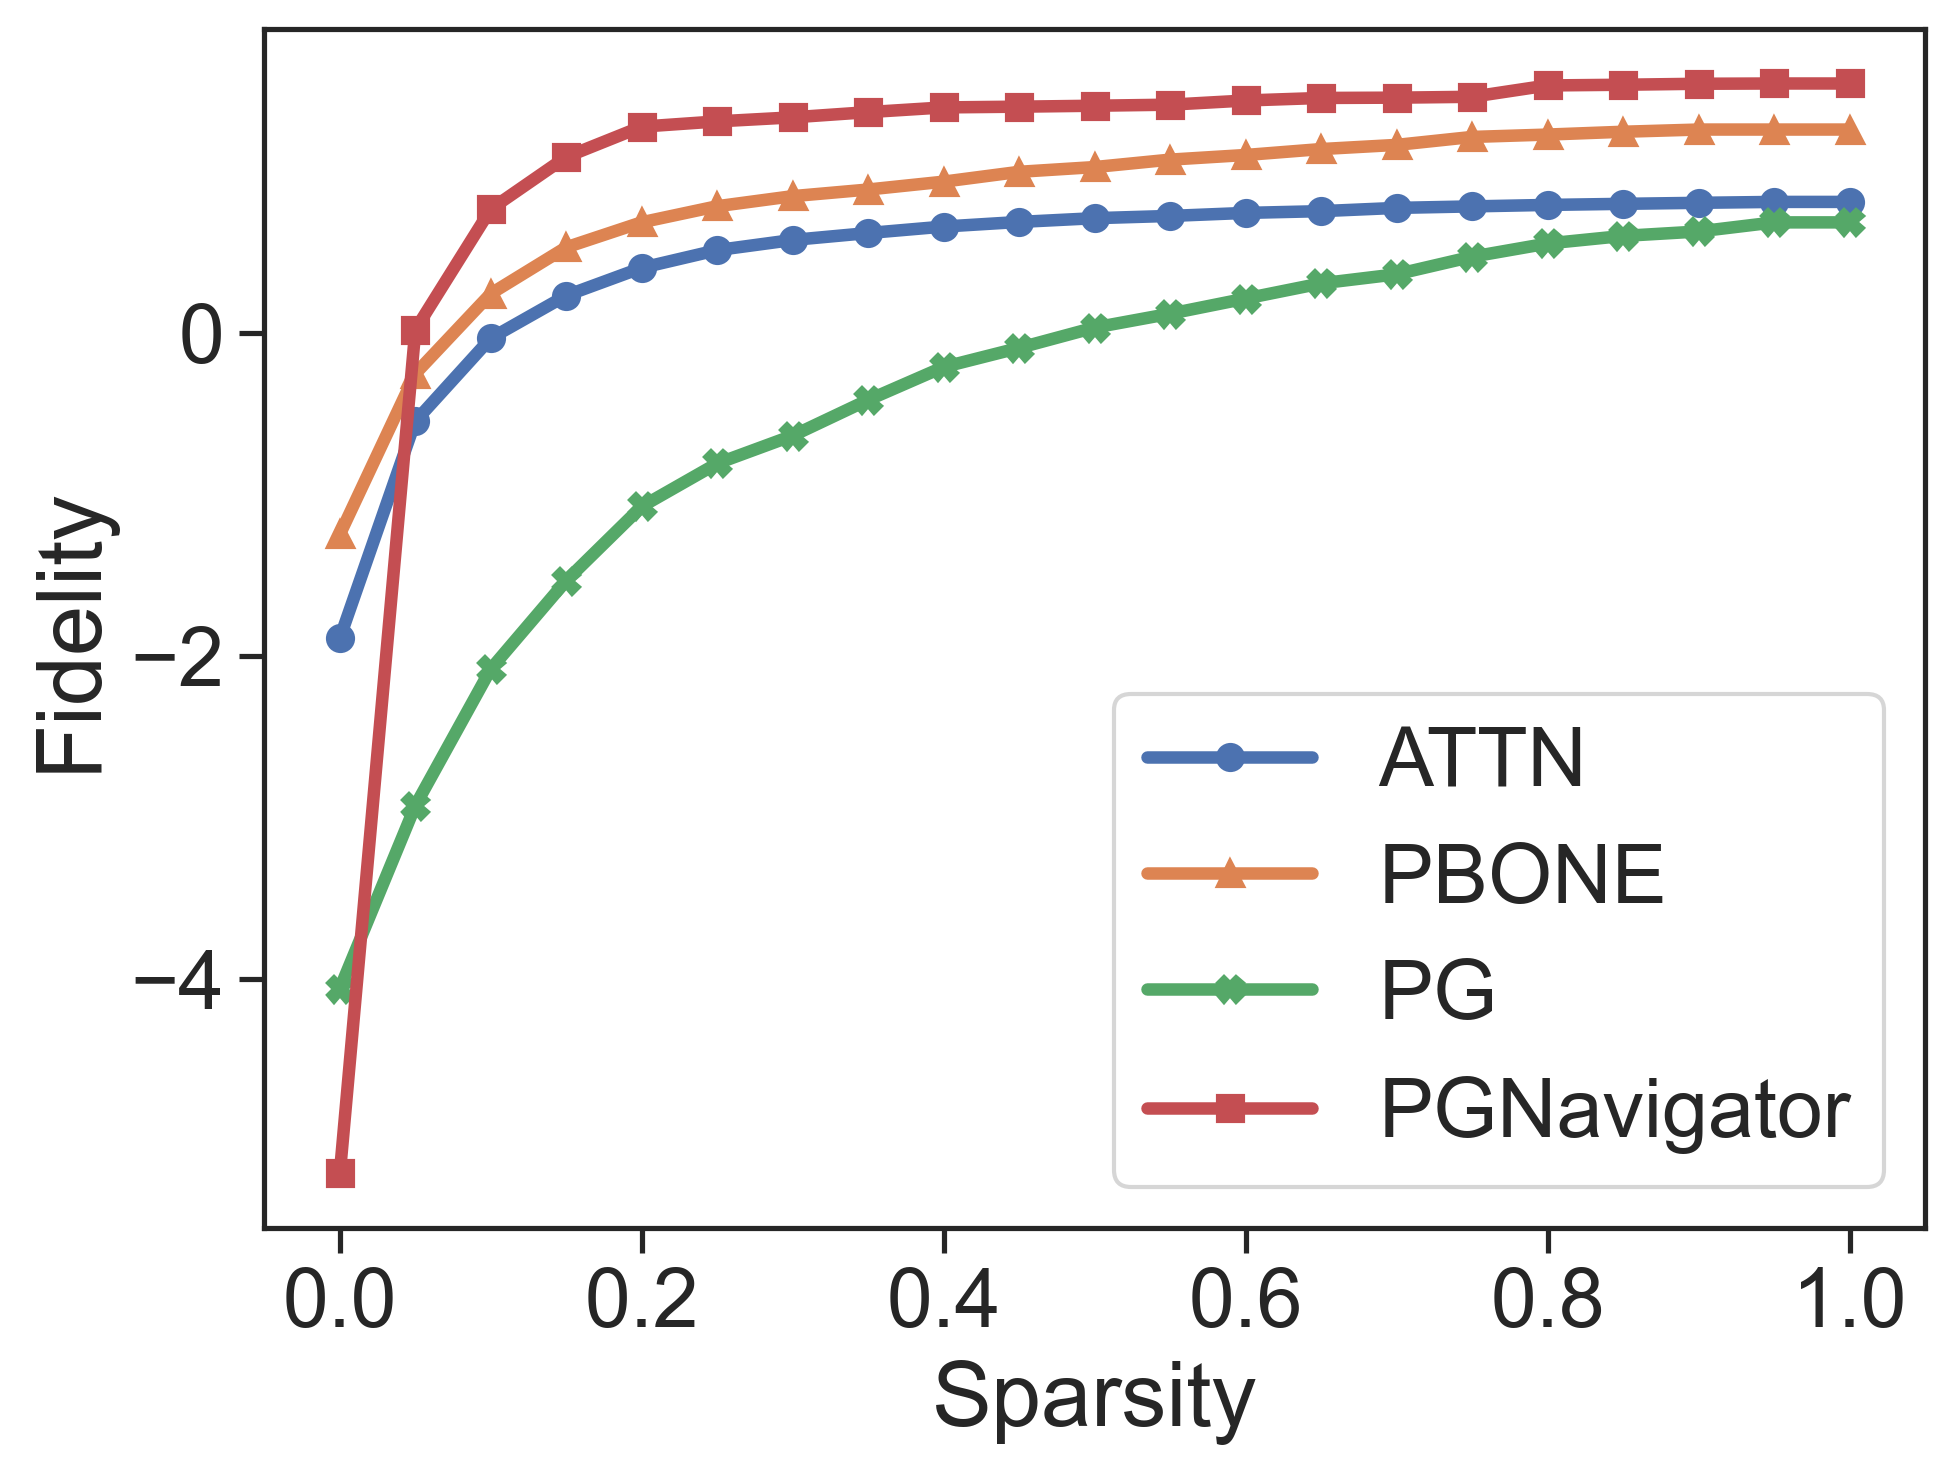

In [166]:
tgat_wikipedia_files = {
    k: results_path / v
    for k, v in zip(
        explainers,
        [
            "tgat_wikipedia_subgraphx_tg_110314_to_155151_eval_mlp_true_pg_positive_th20.csv",
            "tgat_wikipedia_attn_explainer_tg_110314_to_155614_eval_th25.csv",
            "tgat_wikipedia_pbone_explainer_tg_110314_to_155614_eval_th25.csv",
            "tgat_wikipedia_pg_explainer_tg_110314_to_155614_eval_th25.csv",
            "tgat_wikipedia_subgraphx_tg_110314_to_155151_eval_dot_true_pg_positive_th25.csv",
            "tgat_wikipedia_subgraphx_tg_110314_to_155151_eval_pg_true_pg_positive_th25.csv",
        ],
    )
}

tgat_wikipedia_tabs = {
    k: pd.read_csv(v).groupby("sparsity").mean()
    for k, v in tgat_wikipedia_files.items()
}

tgat_wikipedia_best_fids = {
    k: tab["fid_inv_best"].max() for k, tab in tgat_wikipedia_tabs.items()
}
tgat_wikipedia_aufsc = {
    k: np.trapz(tab["fid_inv_best"], tab.index)
    for k, tab in tgat_wikipedia_tabs.items()
}

print("Best Fid:", tgat_wikipedia_best_fids)
print("AUFSC:", tgat_wikipedia_aufsc)

for k, tab in tgat_wikipedia_tabs.items():
    if k not in ['xtg-og', 'attn', 'pbone', 'pg'] and plot_only_og: continue
    plt.plot(tab.index, tab["fid_inv_best"], label=labels[k],marker=markers[k])
plt.xlabel('Sparsity')
plt.ylabel('Fidelity')
plt.legend()
plt.savefig("plots/tgat_wikipedia.pdf")

## Reddit

Best Fid: {'xtg': 1.1622504767030477, 'attn': 0.46591258417069914, 'pbone': 1.2121049303114415, 'pg': 0.5481336815953255, 'xtg-d': 1.2849917187541724, 'xtg-og': 1.2038380052894353}
AUFSC: {'xtg': 0.36793317848630247, 'attn': -0.9362572968028485, 'pbone': 0.8172783054485916, 'pg': -0.8289851863332094, 'xtg-d': 0.5329389365892856, 'xtg-og': 0.36356835609488186}


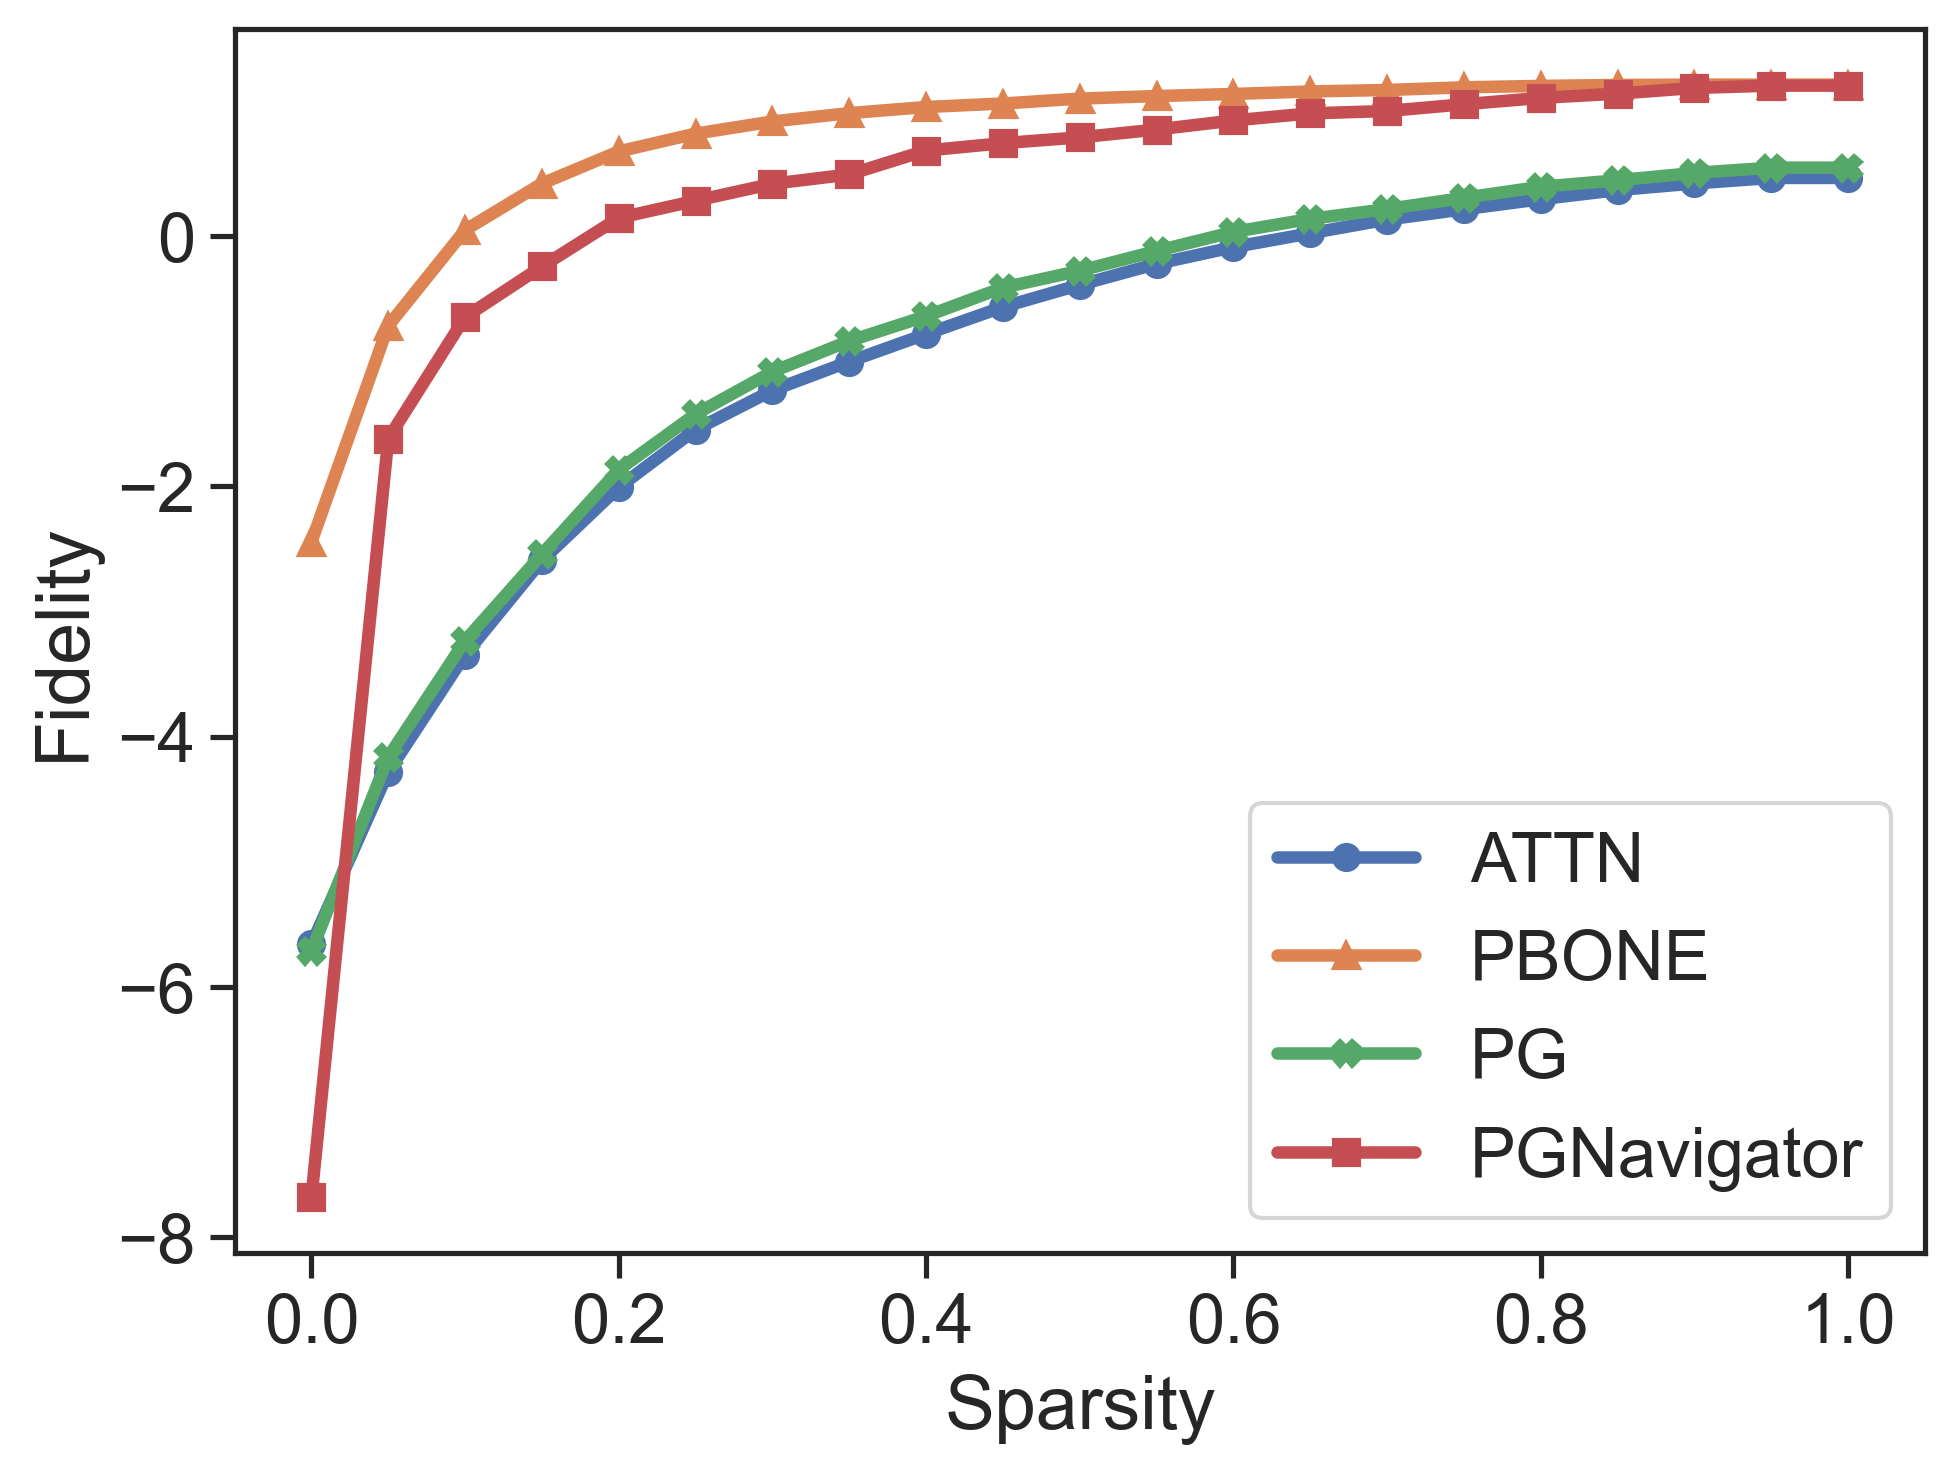

In [141]:
tgat_reddit_files = {
    k: results_path / v
    for k, v in zip(
        explainers,
        [
            "tgat_reddit_subgraphx_tg_470920_to_663534_eval_mlp_true_pg_positive_th20.csv",
            "tgat_reddit_attn_explainer_tg_470920_to_665351_eval_th25.csv",
            "tgat_reddit_pbone_explainer_tg_470920_to_665351_eval_th25.csv",
            "tgat_reddit_pg_explainer_tg_470920_to_665351_eval_th25.csv",
            "tgat_reddit_subgraphx_tg_470920_to_663534_eval_dot_true_pg_positive_th25.csv",
            "tgat_reddit_subgraphx_tg_470920_to_663534_eval_pg_true_pg_positive_th25.csv",
        ],
    )
}

tgat_reddit_tabs = {
    k: pd.read_csv(v).groupby("sparsity").mean() for k, v in tgat_reddit_files.items()
}

tgat_reddit_best_fids = {
    k: tab["fid_inv_best"].max() for k, tab in tgat_reddit_tabs.items()
}

tgat_reddit_aufsc = {
    k: np.trapz(tab["fid_inv_best"], tab.index) for k, tab in tgat_reddit_tabs.items()
}

print("Best Fid:", tgat_reddit_best_fids)
print("AUFSC:", tgat_reddit_aufsc)

for k, tab in tgat_reddit_tabs.items():
    if k not in ['xtg-og', 'attn', 'pbone', 'pg'] and plot_only_og: continue
    plt.plot(tab.index, tab["fid_inv_best"], label=labels[k], marker=markers[k])
plt.legend()
plt.xlabel('Sparsity'); plt.ylabel('Fidelity')
plt.savefig("plots/tgat_reddit.png")

## Simulate V1

Best Fid: {'xtg': 1.1817334110245985, 'attn': 0.5039484711254344, 'pbone': 0.922990075805608, 'pg': 0.600311413991685, 'xtg-d': 0.9000731908223208, 'xtg-og': 1.1080439783194487}
AUFSC: {'xtg': 0.7768883111722328, 'attn': 0.08898551203310488, 'pbone': 0.46922491170173763, 'pg': -0.46849153845333585, 'xtg-d': 0.2514480130637393, 'xtg-og': 0.7933148551951438}


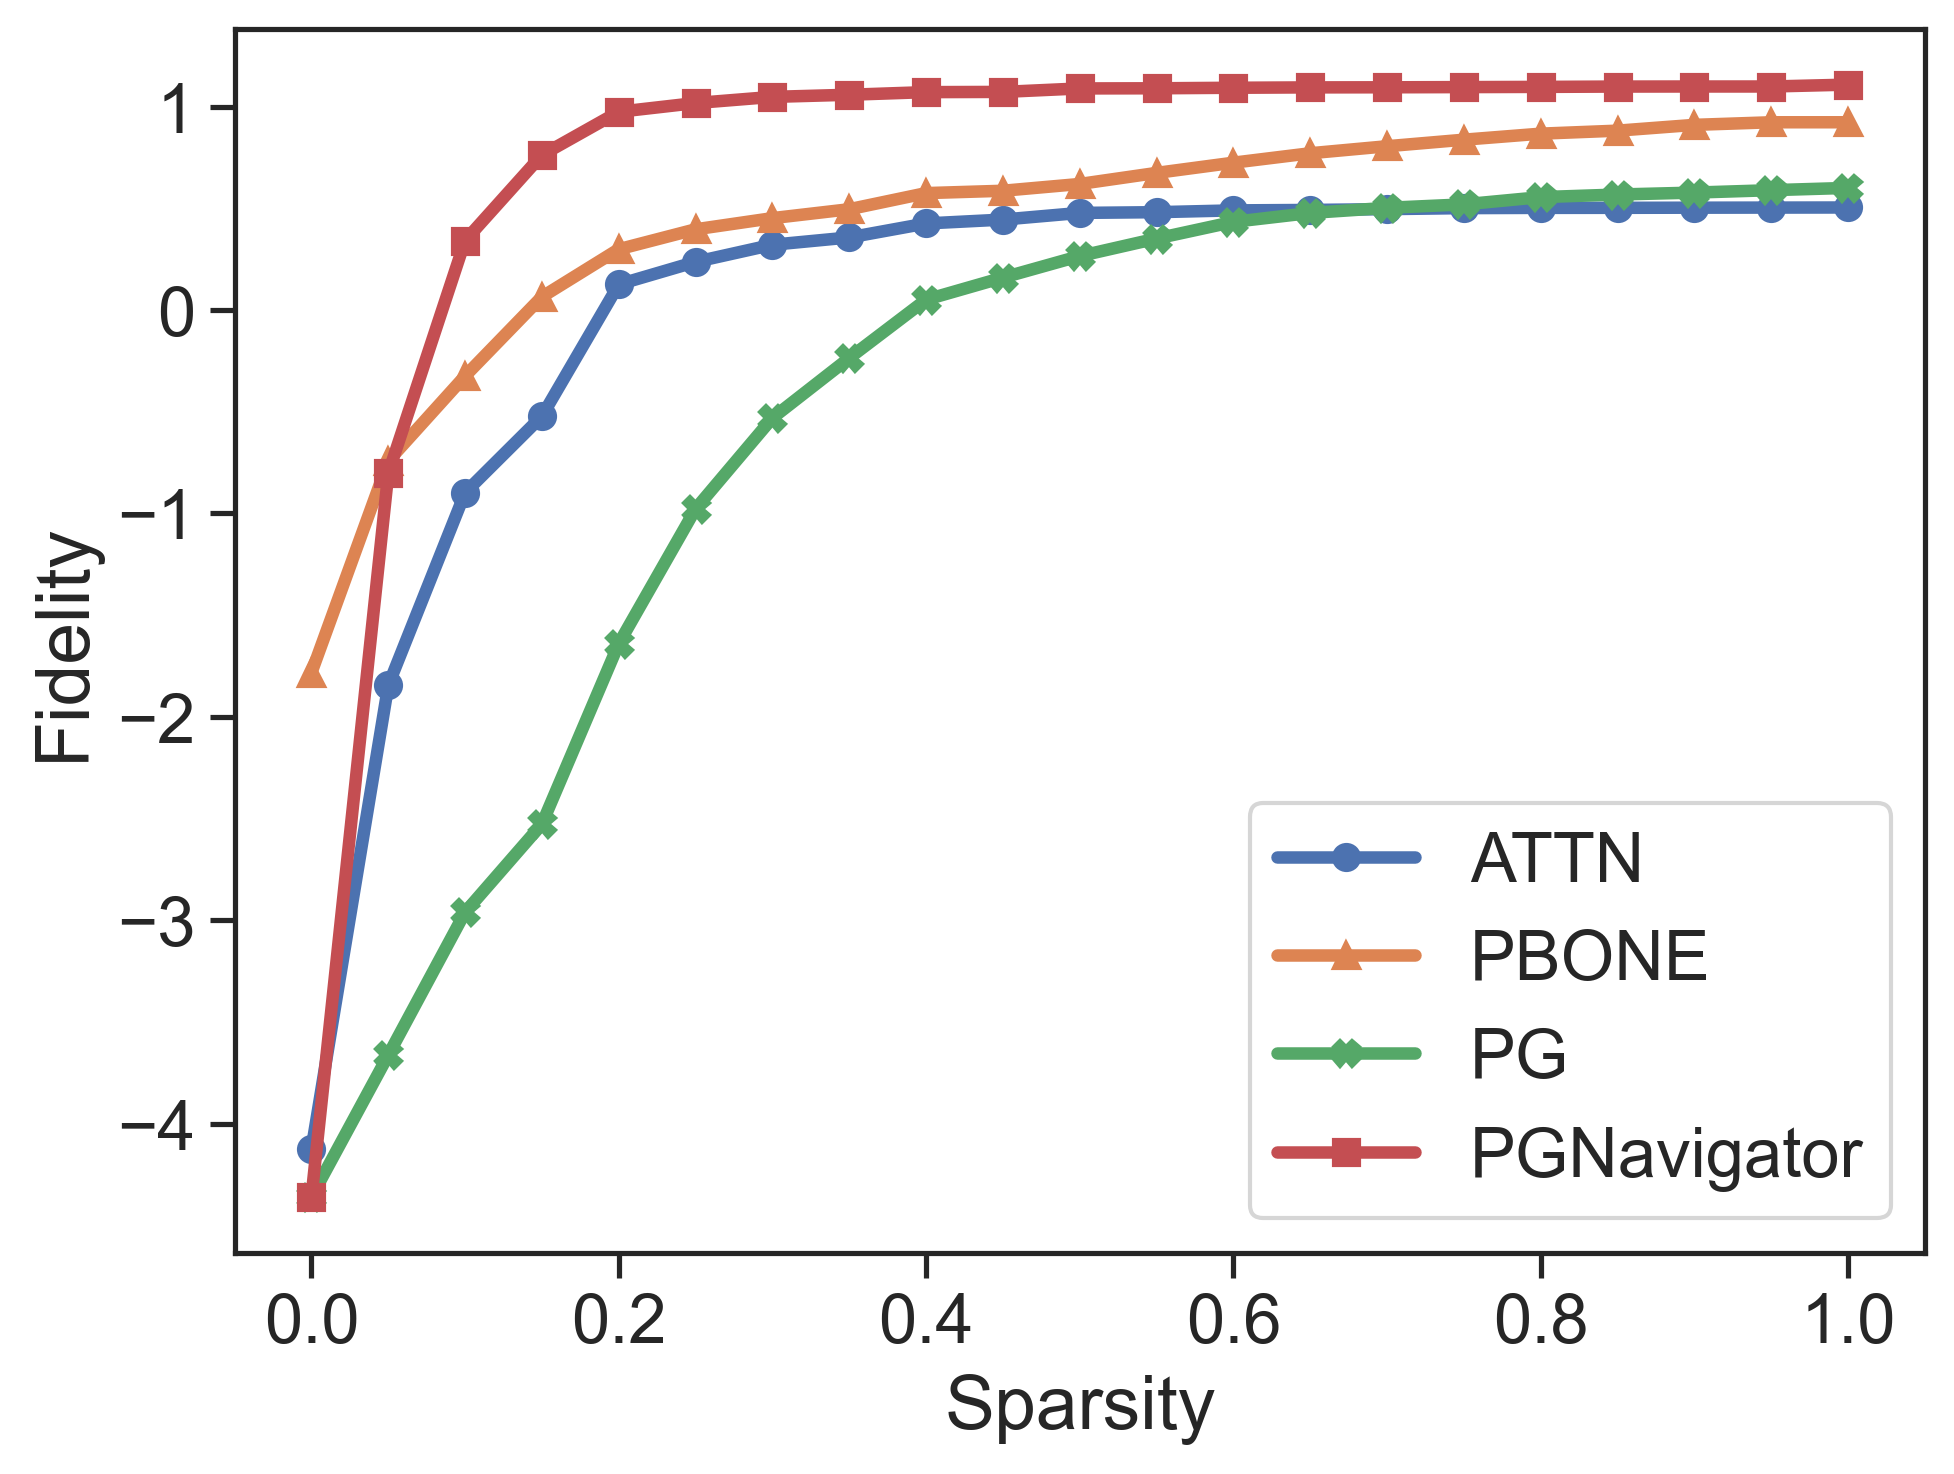

In [142]:
tgat_simulate_v1_files = {
    k: results_path / v
    for k, v in zip(
        explainers,
        [
            "tgat_simulate_v1_subgraphx_tg_3_to_15902_eval_mlp_true_pg_positive_th20.csv",
            "tgat_simulate_v1_attn_explainer_tg_3_to_15902_eval_th25.csv",
            "tgat_simulate_v1_pbone_explainer_tg_3_to_15902_eval_th25.csv",
            "tgat_simulate_v1_pg_explainer_tg_3_to_15902_eval_th25.csv",
            "tgat_simulate_v1_subgraphx_tg_3_to_15902_eval_dot_true_pg_positive_th25.csv",
            "tgat_simulate_v1_subgraphx_tg_3_to_15902_eval_pg_true_pg_positive_th25.csv"
        ],
    )
}

tgat_simulate_v1_tabs = {
    k: pd.read_csv(v).groupby("sparsity").mean()
    for k, v in tgat_simulate_v1_files.items()
}

tgat_simulate_v1_best_fids = {
    k: tab["fid_inv_best"].max() for k, tab in tgat_simulate_v1_tabs.items()
}

tgat_simulate_v1_aufsc = {
    k: np.trapz(tab["fid_inv_best"], tab.index)
    for k, tab in tgat_simulate_v1_tabs.items()
}
print("Best Fid:", tgat_simulate_v1_best_fids)
print("AUFSC:", tgat_simulate_v1_aufsc)

for k, tab in tgat_simulate_v1_tabs.items():
    if k not in ["xtg-og", "attn", "pbone", "pg"] and plot_only_og:
        continue
    plt.plot(tab.index, tab["fid_inv_best"], label=labels[k], marker=markers[k])
plt.xlabel("Sparsity")
plt.ylabel("Fidelity")
plt.legend()
plt.savefig("plots/tgat_simulate_v1.png")

## Simulate V2

Best Fid: {'xtg': 0.7947402311598554, 'attn': 0.035111374714795265, 'pbone': 0.6905835956042888, 'pg': 0.7854348060254958, 'xtg-d': 0.8492246125550831, 'xtg-og': 0.7992661783800405}
AUFSC: {'xtg': 0.6050593150250029, 'attn': -0.12597944340212086, 'pbone': 0.2698994588910364, 'pg': 0.29797246368492347, 'xtg-d': 0.7909700851832681, 'xtg-og': 0.7120196774620198}


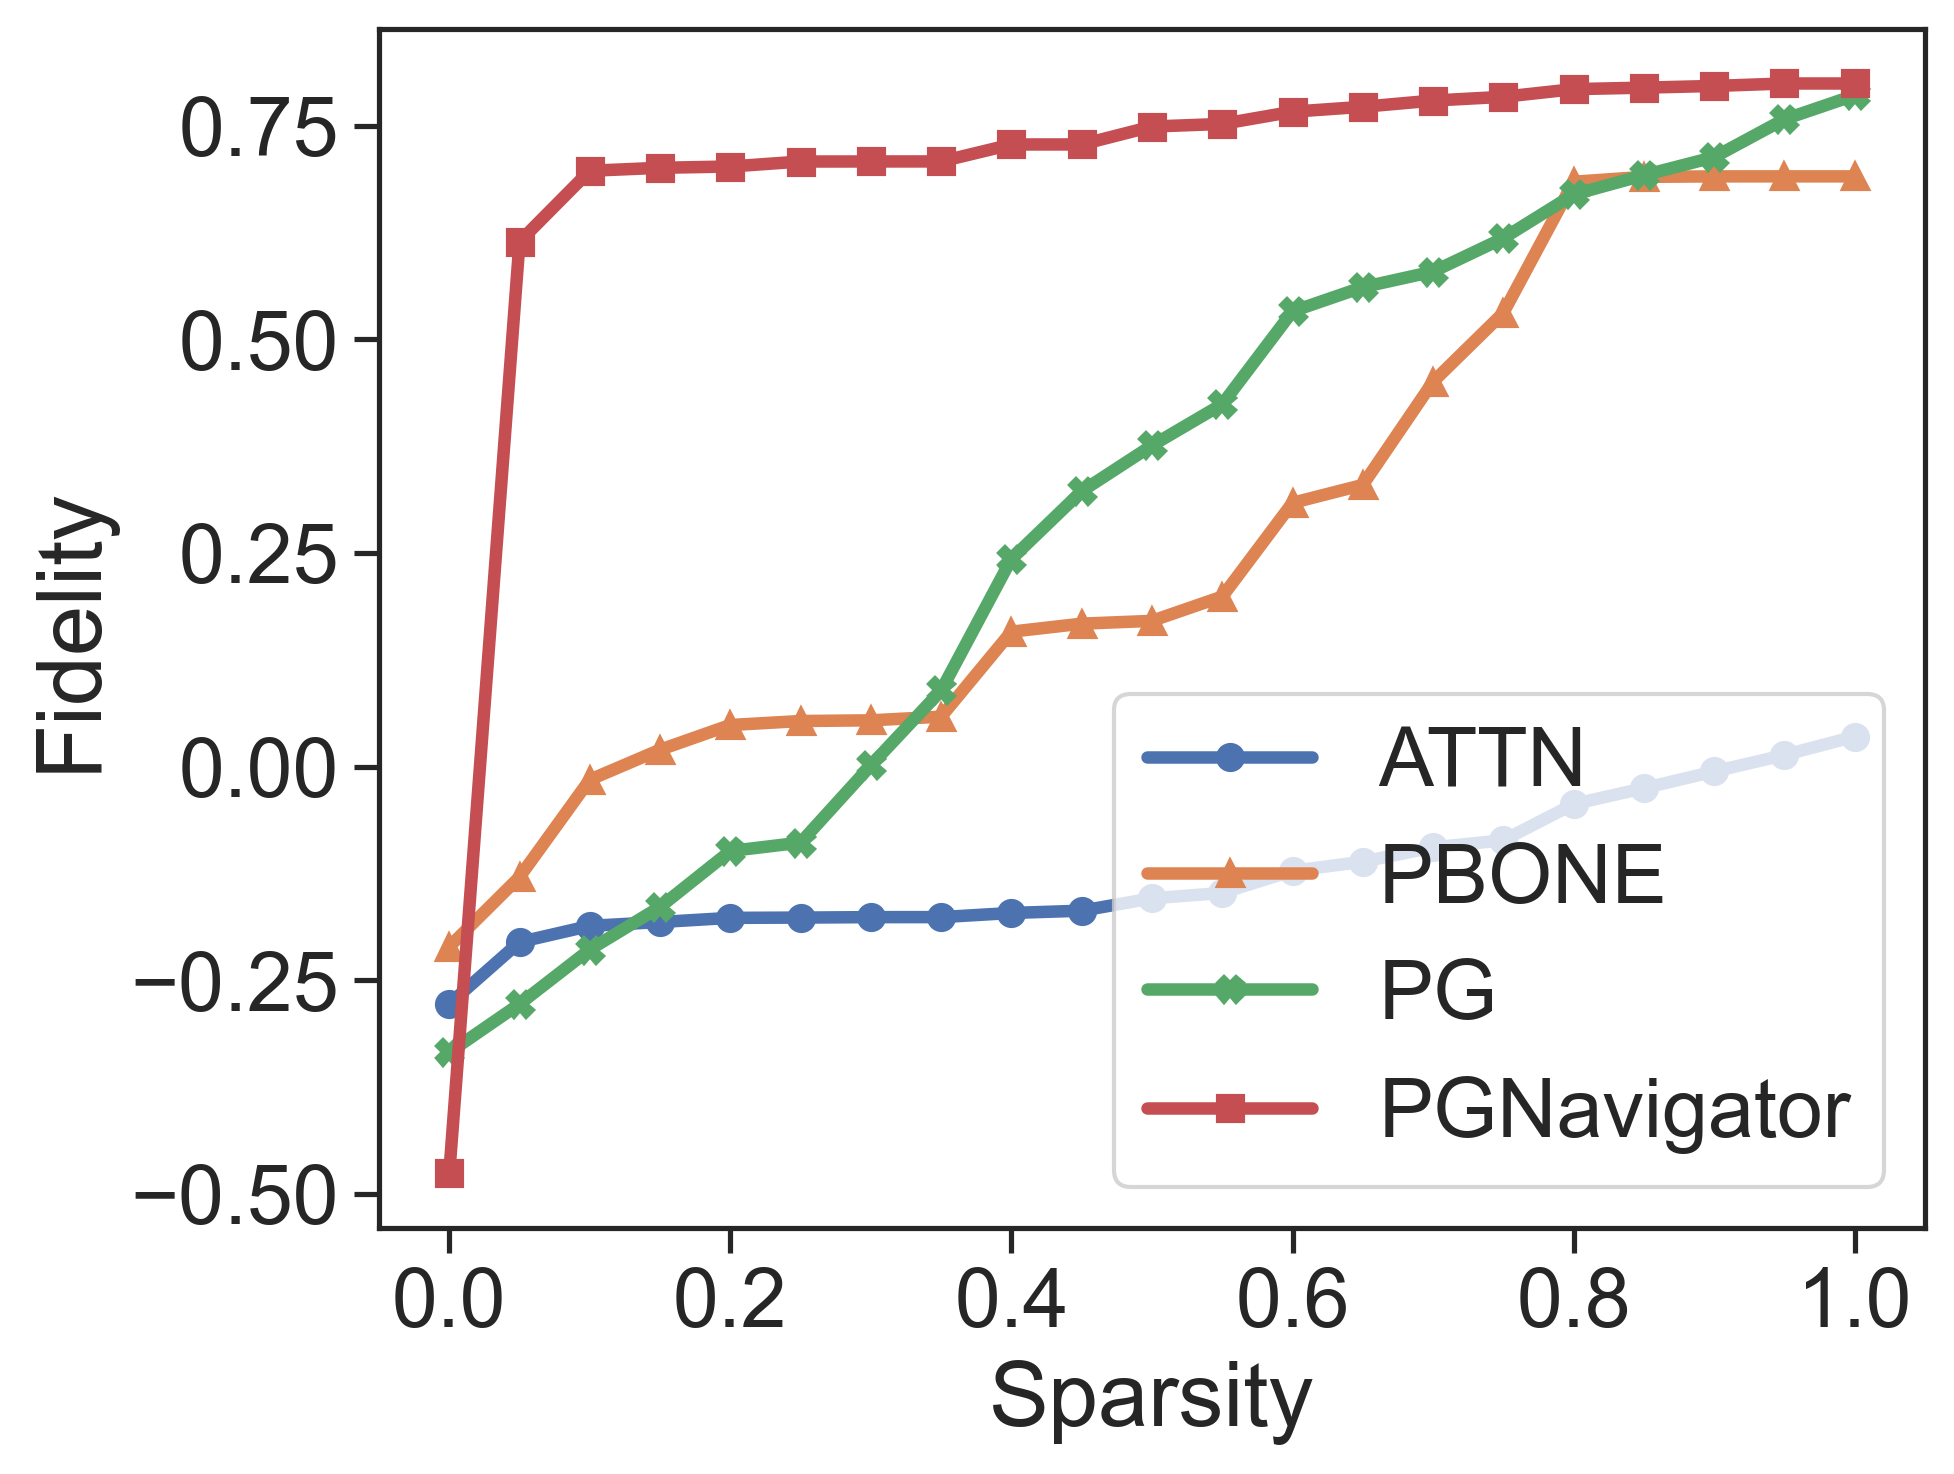

In [178]:
tgat_simulate_v2_files = {
    k: results_path / v
    for k, v in zip(
        explainers,
        [
            "tgat_simulate_v2_subgraphx_tg_3_to_21752_eval_mlp_true_pg_positive_th20.csv",
            "tgat_simulate_v2_attn_explainer_tg_3_to_21752_eval_th25.csv",
            "tgat_simulate_v2_pbone_explainer_tg_3_to_21752_eval_th25.csv",
            "tgat_simulate_v2_pg_explainer_tg_3_to_21752_eval_th25.csv",
            "tgat_simulate_v2_subgraphx_tg_3_to_21752_eval_dot_true_pg_positive_th25.csv",
            "tgat_simulate_v2_subgraphx_tg_3_to_21752_eval_pg_true_pg_positive_th25.csv"
        ],
    )
}
tgat_simulate_v2_tabs = {
    k: pd.read_csv(v).groupby("sparsity").mean()
    for k, v in tgat_simulate_v2_files.items()
}
tgat_simulate_v2_best_fids = {
    k: tab["fid_inv_best"].max() for k, tab in tgat_simulate_v2_tabs.items()
}
tgat_simulate_v2_aufsc = {
    k: np.trapz(tab["fid_inv_best"], tab.index)
    for k, tab in tgat_simulate_v2_tabs.items()
}
print("Best Fid:", tgat_simulate_v2_best_fids)
print("AUFSC:", tgat_simulate_v2_aufsc)

for k, tab in tgat_simulate_v2_tabs.items():
    if k not in ["xtg-og", "attn", "pbone", "pg"] and plot_only_og:
        continue
    plt.plot(tab.index, tab["fid_inv_best"], label=labels[k], marker=markers[k])
plt.xlabel("Sparsity")
plt.ylabel("Fidelity")
plt.legend()
plt.savefig("plots/tgat_simulate_v2.png")

# TGN
## Wikipedia

Best Fid: {'xtg': 0.9347367412596941, 'attn': 0.5148783878684043, 'pbone': 0.6475937870591879, 'pg': 0.45970433977246283, 'xtg-d': 0.943455517962575, 'xtg-og': 0.9597131434828043}
AUFSC: {'xtg': 0.49106371287442735, 'attn': 0.3126810891754925, 'pbone': 0.3932880073327572, 'pg': -0.3673622658334673, 'xtg-d': 0.31716032993420956, 'xtg-og': 0.6996998282931745}


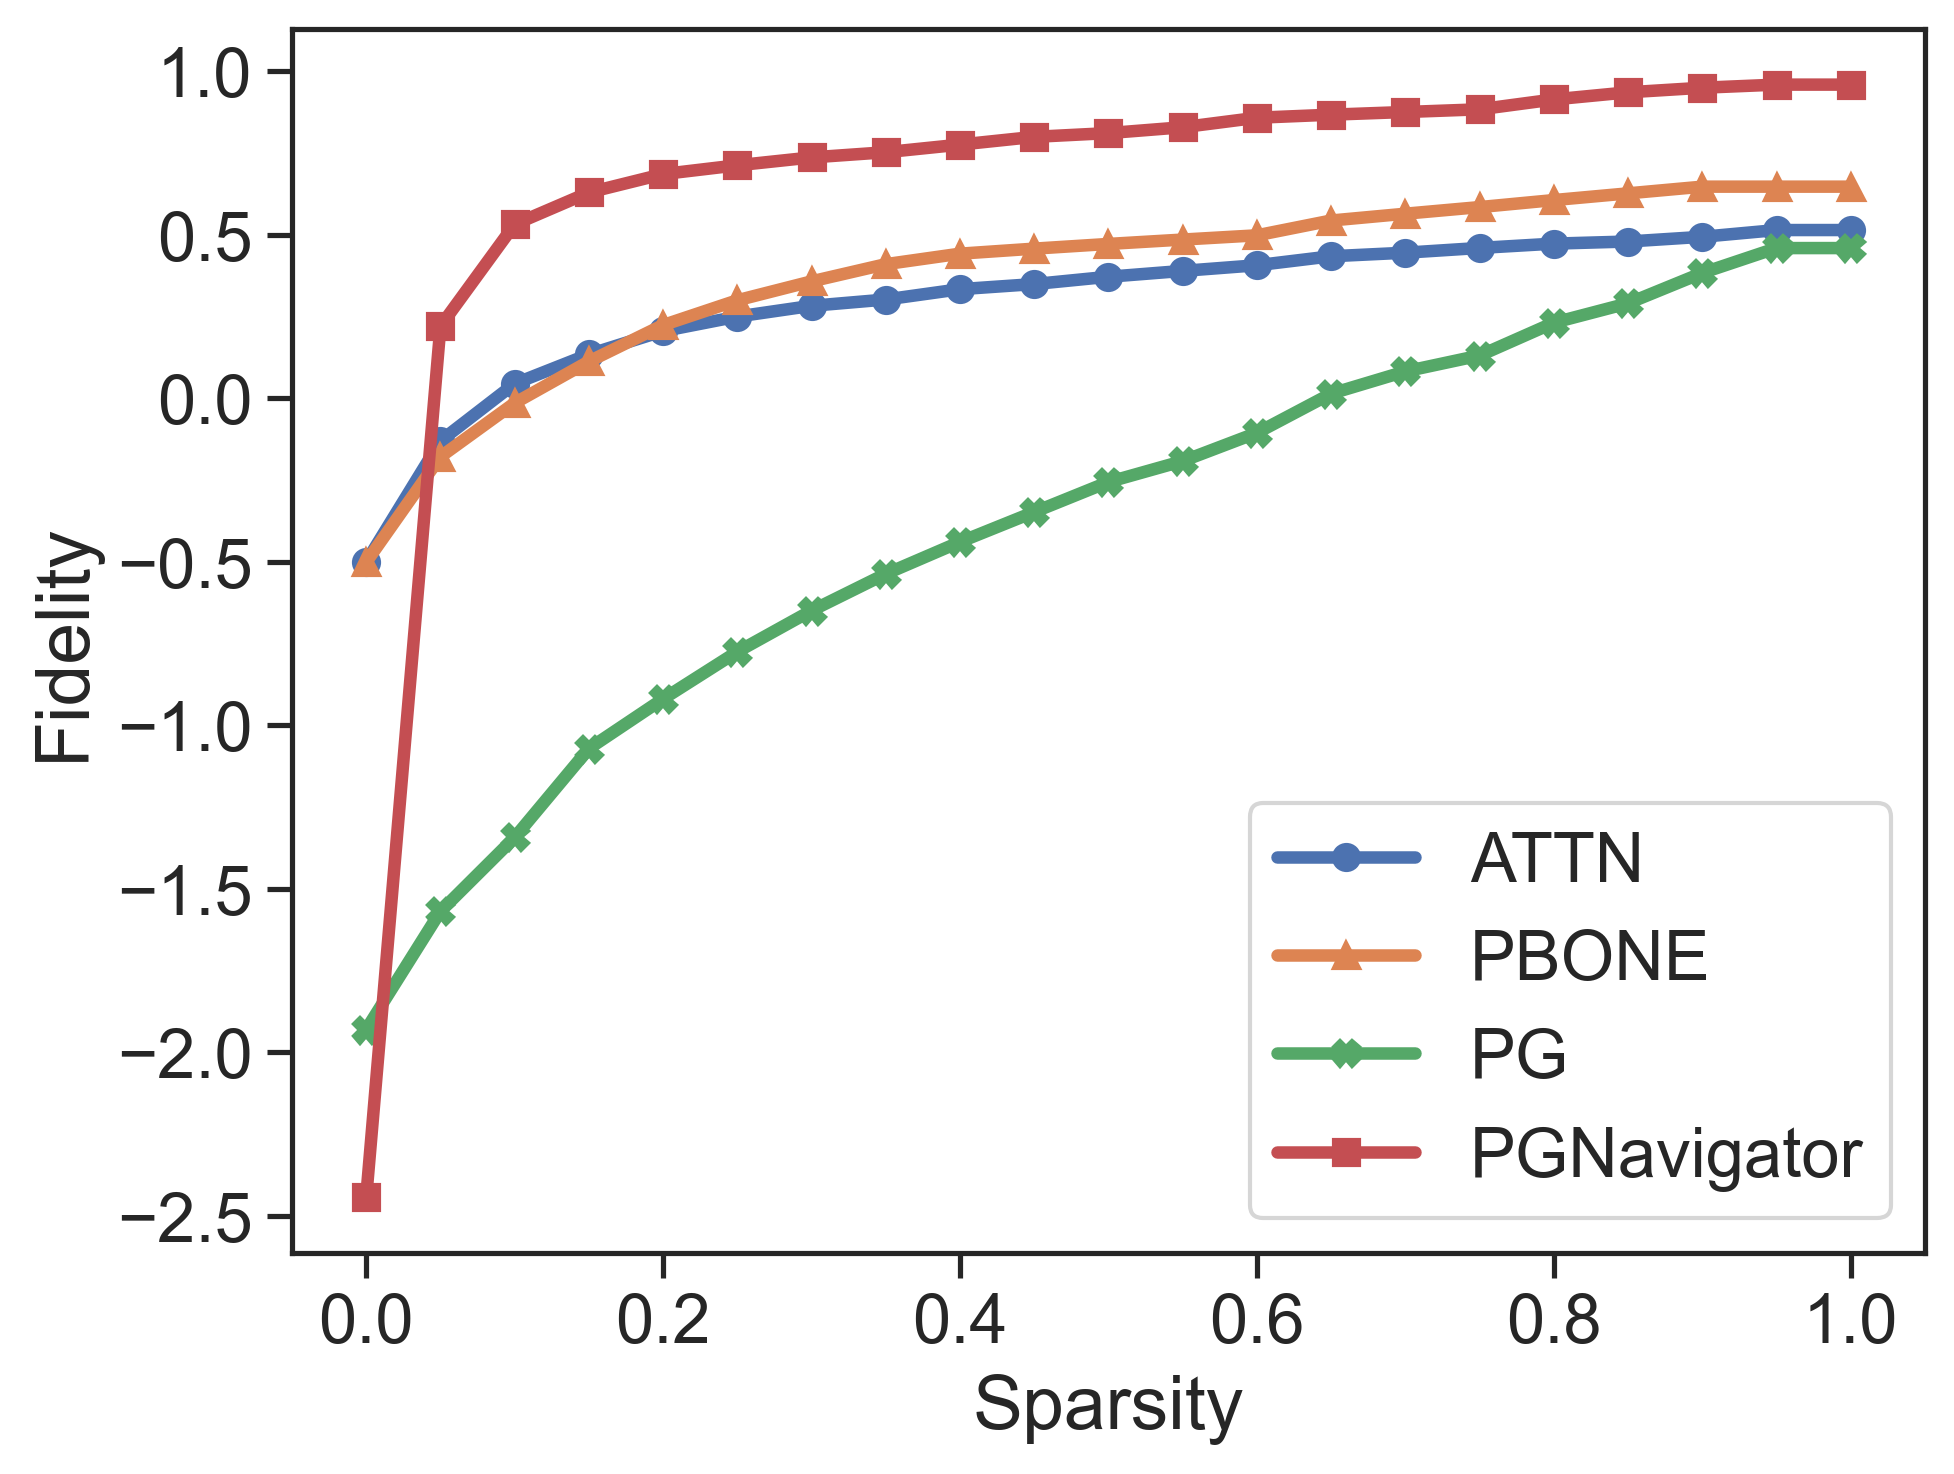

In [144]:
tgn_wikipedia_files = {
    k: results_path / v
    for k, v in zip(
        explainers,
        [
            "tgn_wikipedia_subgraphx_tg_110314_to_155151_eval_mlp_true_pg_positive_th20.csv",
            "tgn_wikipedia_attn_explainer_tg_110314_to_155614_eval_th25.csv",
            "tgn_wikipedia_pbone_explainer_tg_110314_to_155614_eval_th25.csv",
            "tgn_wikipedia_pg_explainer_tg_110314_to_155614_eval_th25.csv",
            "tgn_wikipedia_subgraphx_tg_110314_to_155151_eval_dot_true_pg_positive_th25.csv",
            "tgn_wikipedia_subgraphx_tg_110314_to_155151_eval_pg_true_pg_positive_th25.csv"
        ],
    )
}

tgn_wikipedia_tabs = {
    k: pd.read_csv(v).groupby("sparsity").mean()
    for k, v in tgn_wikipedia_files.items()
}

tgn_wikipedia_best_fids = {
    k: tab["fid_inv_best"].max() for k, tab in tgn_wikipedia_tabs.items()
}
tgn_wikipedia_aufsc = {
    k: np.trapz(tab["fid_inv_best"], tab.index) for k, tab in tgn_wikipedia_tabs.items()
}
print("Best Fid:", tgn_wikipedia_best_fids)
print("AUFSC:", tgn_wikipedia_aufsc)

for k, tab in tgn_wikipedia_tabs.items():
    if k not in ["xtg-og", "attn", "pbone", "pg"] and plot_only_og:
        continue
    plt.plot(tab.index, tab["fid_inv_best"], label=labels[k], marker=markers[k])
plt.xlabel("Sparsity")
plt.ylabel("Fidelity")
plt.legend()
plt.savefig("plots/tgn_wikipedia.png")

## Reddit

Best Fid: {'xtg': 0.255969266295433, 'attn': 0.14476382285356518, 'pbone': 0.24414053630828855, 'pg': 0.11693396629393099, 'xtg-d': 0.2913777559995651, 'xtg-og': 0.2892129041999578}
AUFSC: {'xtg': -1.4603407012969258, 'attn': -1.5458064605053519, 'pbone': -0.6292809361521156, 'pg': -2.209208604266495, 'xtg-d': -1.3910643502660096, 'xtg-og': -1.1197556949984282}


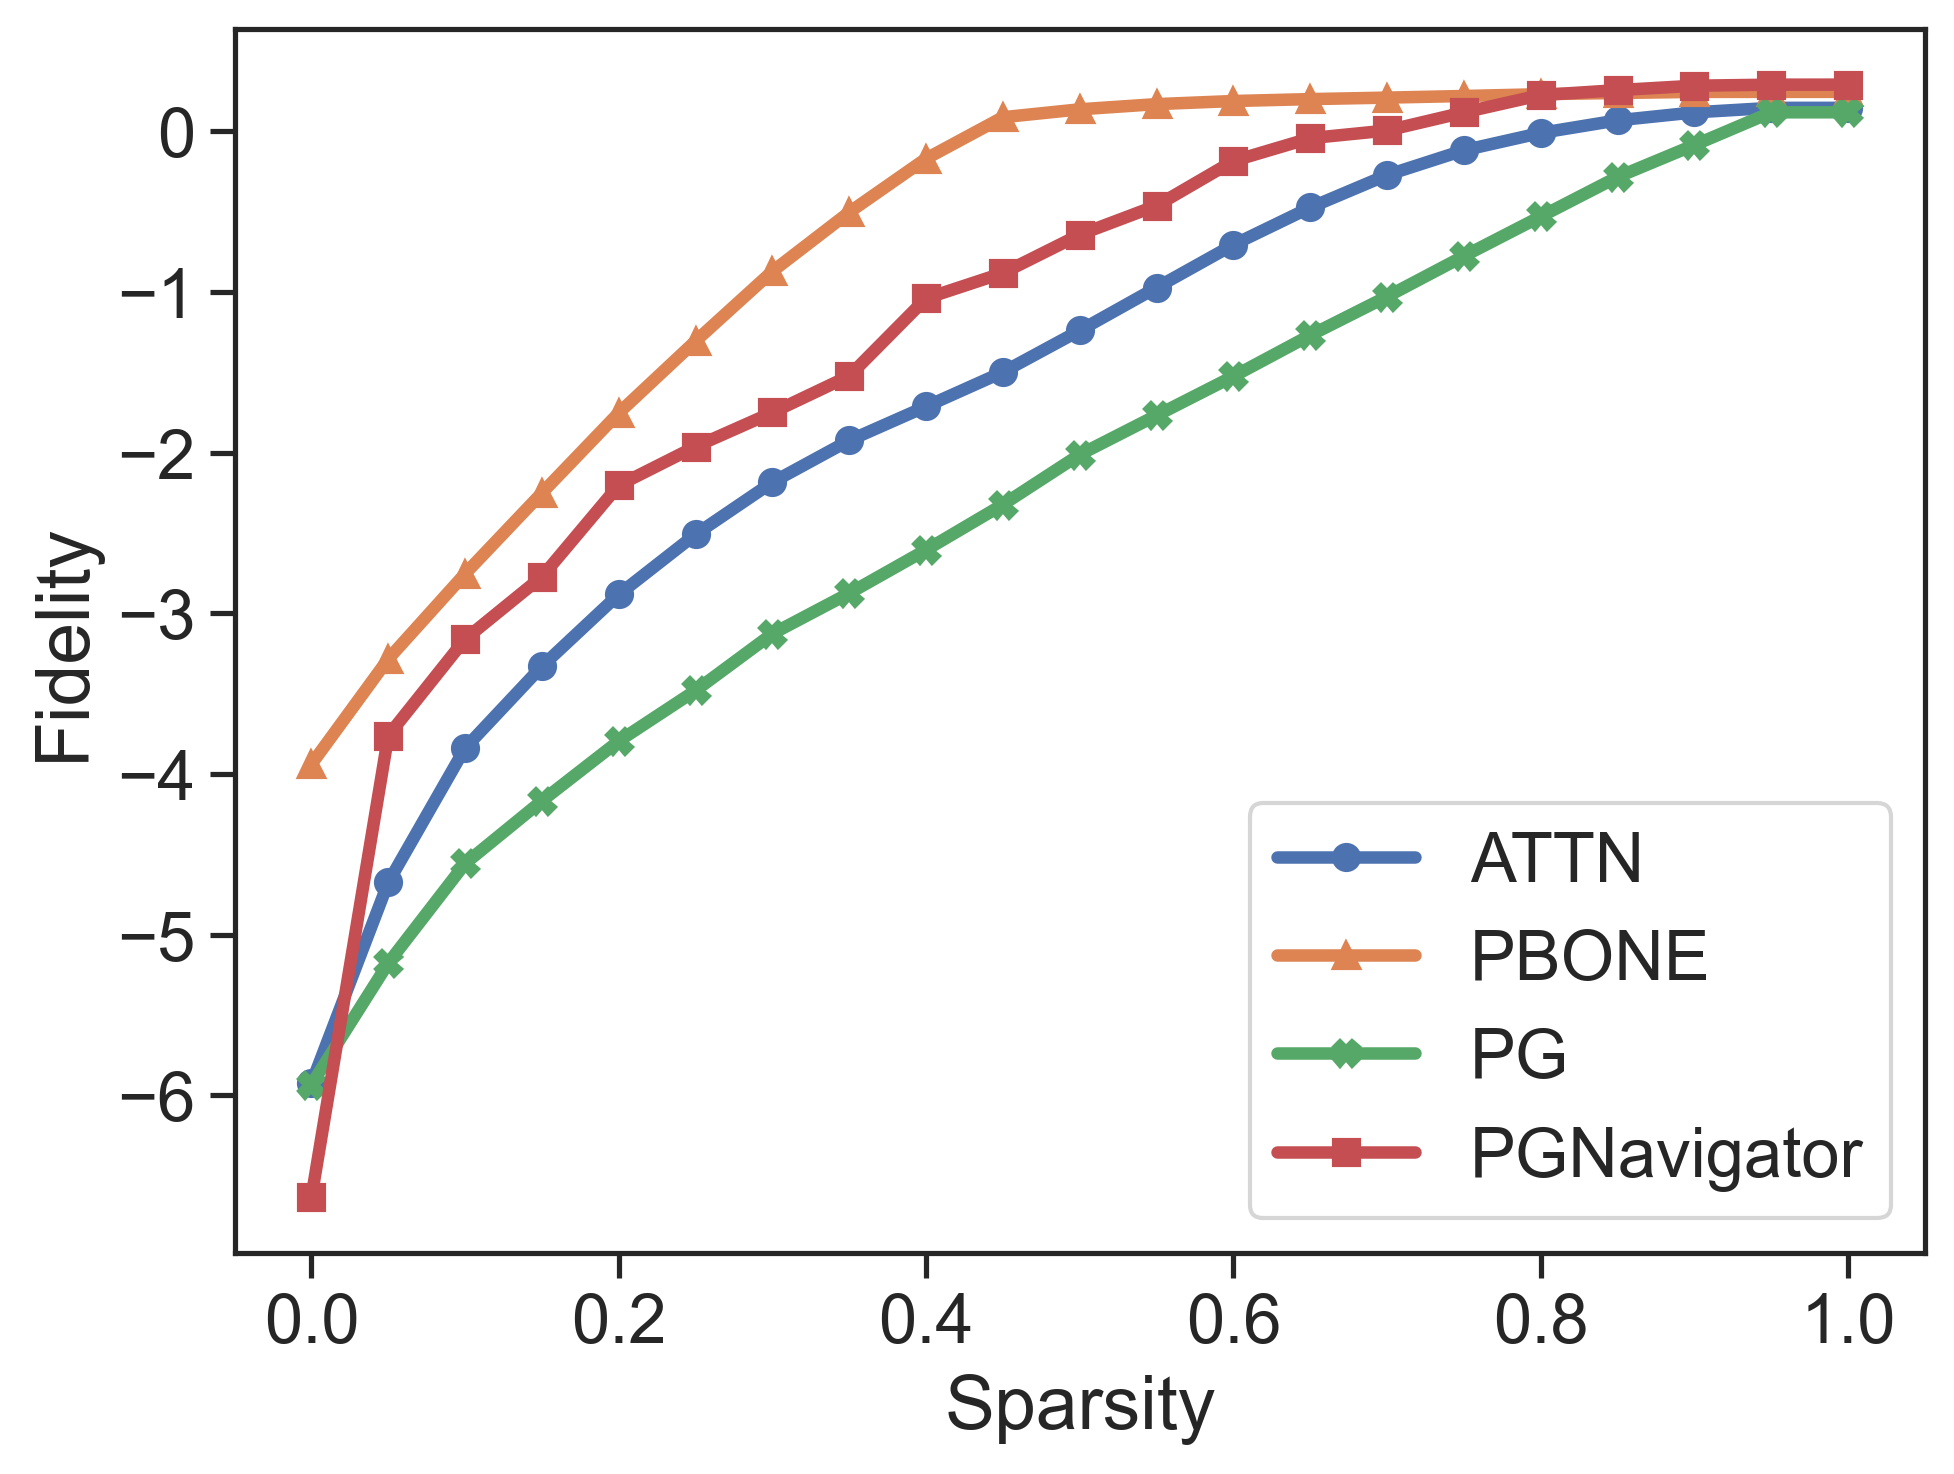

In [145]:
tgn_reddit_files = {
    k: results_path / v
    for k, v in zip(
        explainers,
        [
            "tgn_reddit_subgraphx_tg_470920_to_663534_eval_mlp_true_pg_positive_th20.csv",
            "tgn_reddit_attn_explainer_tg_470920_to_665351_eval_th25.csv",
            "tgn_reddit_pbone_explainer_tg_470920_to_665351_eval_th25.csv",
            "tgn_reddit_pg_explainer_tg_470920_to_665351_eval_th25.csv",
            "tgn_reddit_subgraphx_tg_470920_to_663534_eval_dot_true_pg_positive_th25.csv",
            "tgn_reddit_subgraphx_tg_470920_to_663534_eval_pg_true_pg_positive_th25.csv"
        ],
    )
}

tgn_reddit_tabs = {
    k: pd.read_csv(v).groupby("sparsity").mean() for k, v in tgn_reddit_files.items()
}

tgn_reddit_best_fids = {
    k: tab["fid_inv_best"].max() for k, tab in tgn_reddit_tabs.items()
}

tgn_reddit_aufsc = {
    k: np.trapz(tab["fid_inv_best"], tab.index) for k, tab in tgn_reddit_tabs.items()
}

print("Best Fid:", tgn_reddit_best_fids)
print("AUFSC:", tgn_reddit_aufsc)

for k, tab in tgn_reddit_tabs.items():
    if k not in ["xtg-og", "attn", "pbone", "pg"] and plot_only_og:
        continue
    plt.plot(tab.index, tab["fid_inv_best"], label=labels[k], marker=markers[k])
plt.xlabel("Sparsity")
plt.ylabel("Fidelity")
plt.legend()
plt.savefig("plots/tgn_reddit.png")

## Simulate V1

Best Fid: {'xtg': 1.9075012358964658, 'attn': 1.3582113794251984, 'pbone': 1.6870292179724748, 'pg': 1.302524747801762, 'xtg-d': 1.2187664695814544, 'xtg-og': 1.8240483426580243}
AUFSC: {'xtg': 1.493588796754678, 'attn': 0.7579274691203061, 'pbone': 0.6065710234875772, 'pg': -0.0887317580043101, 'xtg-d': 0.053247118639011, 'xtg-og': 1.445104979475339}


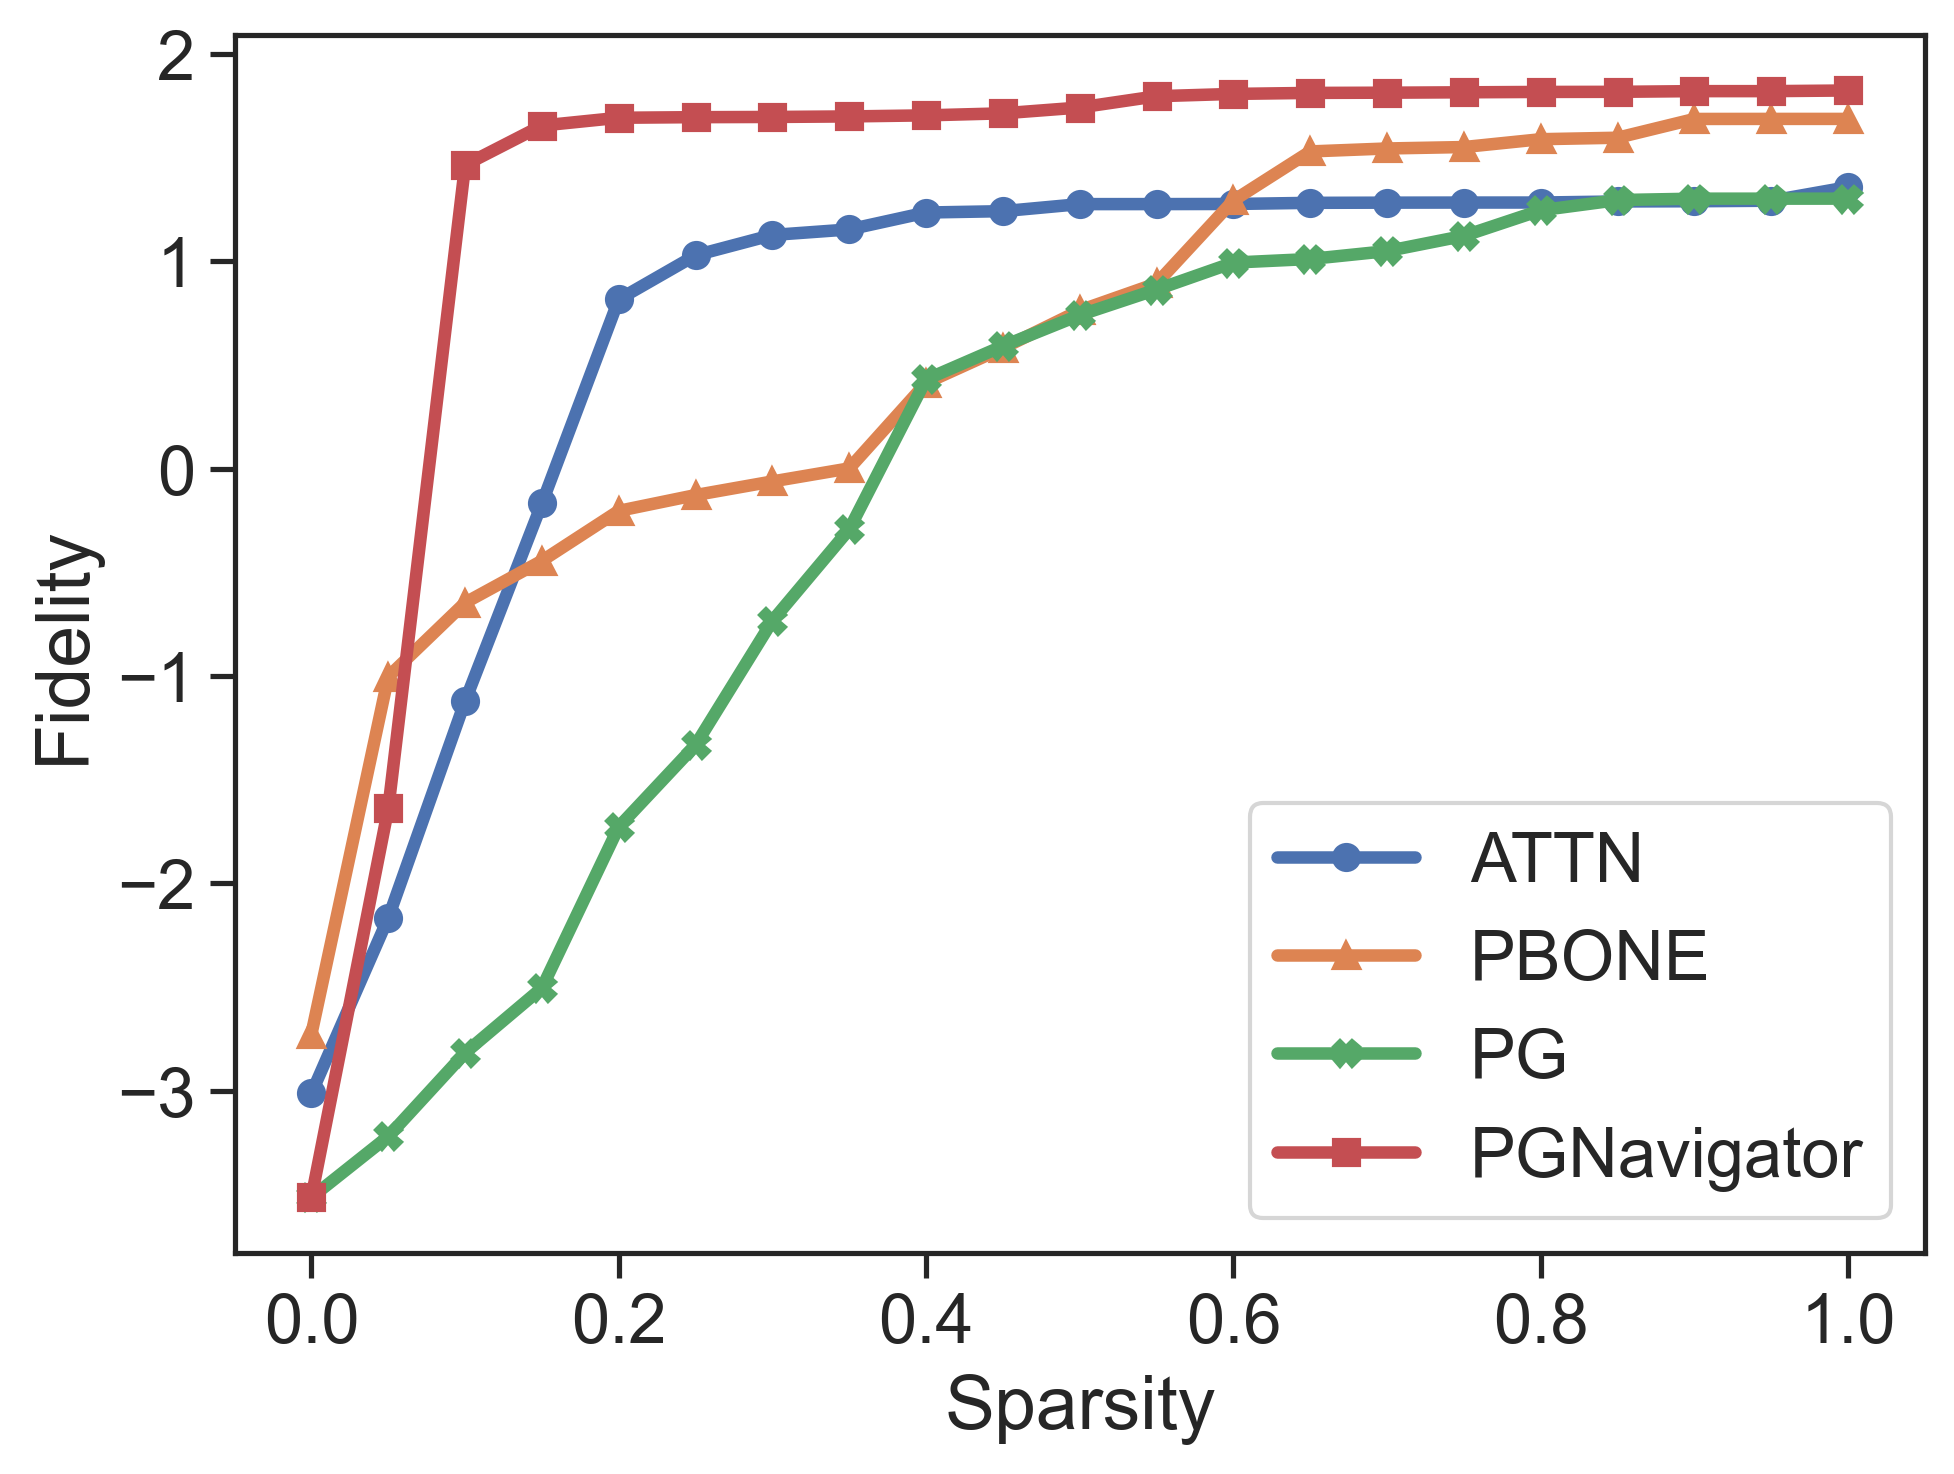

In [146]:
tgn_simulate_v1_files = {
    k: results_path / v
    for k, v in zip(
        explainers,
        [
            "tgn_simulate_v1_subgraphx_tg_3_to_15902_eval_mlp_true_pg_positive_th20.csv",
            "tgn_simulate_v1_attn_explainer_tg_3_to_15902_eval_th25.csv",
            "tgn_simulate_v1_pbone_explainer_tg_3_to_15902_eval_th25.csv",
            "tgn_simulate_v1_pg_explainer_tg_3_to_15902_eval_th25.csv",
            "tgn_simulate_v1_subgraphx_tg_3_to_15902_eval_dot_true_pg_positive_th25.csv",
            "tgn_simulate_v1_subgraphx_tg_3_to_15902_eval_pg_true_pg_positive_th25.csv"
        ],
    )
}

tgn_simulate_v1_tabs = {
    k: pd.read_csv(v).groupby("sparsity").mean()
    for k, v in tgn_simulate_v1_files.items()
}

tgn_simulate_v1_best_fids = {
    k: tab["fid_inv_best"].max() for k, tab in tgn_simulate_v1_tabs.items()
}

tgn_simulate_v1_aufsc = {
    k: np.trapz(tab["fid_inv_best"], tab.index)
    for k, tab in tgn_simulate_v1_tabs.items()
}
print("Best Fid:", tgn_simulate_v1_best_fids)
print("AUFSC:", tgn_simulate_v1_aufsc)

for k, tab in tgn_simulate_v1_tabs.items():
    if k not in ["xtg-og", "attn", "pbone", "pg"] and plot_only_og:
        continue
    plt.plot(tab.index, tab["fid_inv_best"], label=labels[k], marker=markers[k])
plt.xlabel("Sparsity")
plt.ylabel("Fidelity")
plt.legend()
plt.savefig("plots/tgn_simulate_v1.png")

## Simulate V2

Best Fid: {'xtg': 2.4938756166135563, 'attn': 1.330738698442777, 'pbone': 2.908827317403812, 'pg': 0.5555869080856735, 'xtg-d': 2.975381005920616, 'xtg-og': 2.8160523091461145}
AUFSC: {'xtg': 0.8196067307436581, 'attn': -0.5447674413083816, 'pbone': -0.1473800024565528, 'pg': -2.115120007170766, 'xtg-d': 0.40429096622940386, 'xtg-og': 1.9164757087023234}


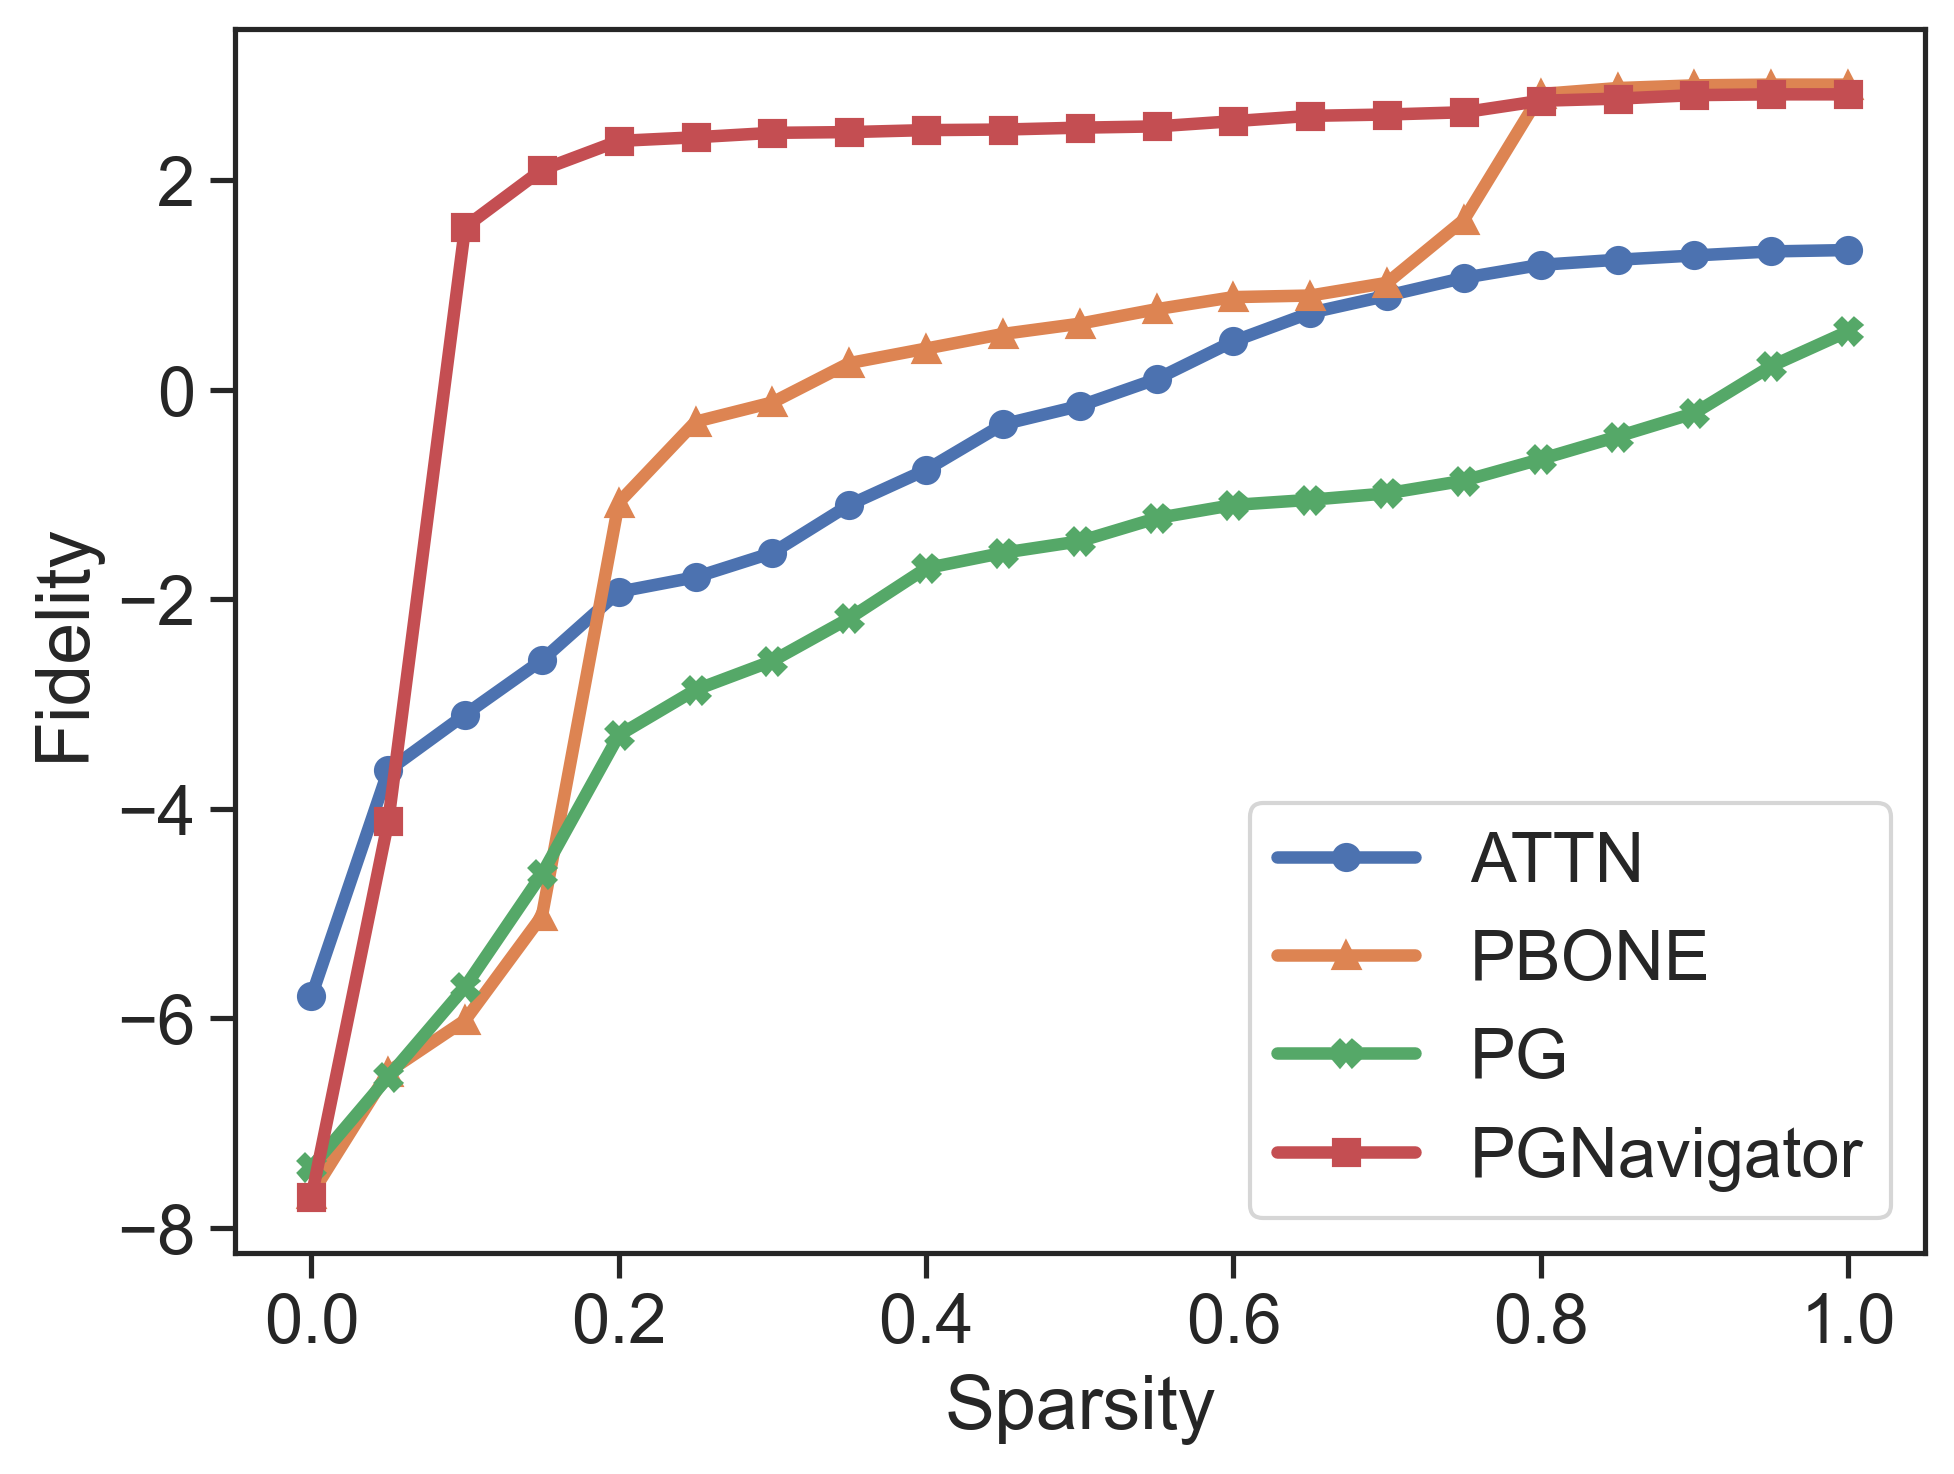

In [147]:
tgn_simulate_v2_files = {
    k: results_path / v
    for k, v in zip(
        explainers,
        [
            "tgn_simulate_v2_subgraphx_tg_3_to_21752_eval_mlp_true_pg_positive_th20.csv",
            "tgn_simulate_v2_attn_explainer_tg_3_to_21752_eval_th25.csv",
            "tgn_simulate_v2_pbone_explainer_tg_3_to_21752_eval_th25.csv",
            "tgn_simulate_v2_pg_explainer_tg_3_to_21752_eval_th25.csv",
            "tgn_simulate_v2_subgraphx_tg_3_to_21752_eval_dot_true_pg_positive_th25.csv",
            "tgn_simulate_v2_subgraphx_tg_3_to_21752_eval_pg_true_pg_positive_th25.csv"
        ],
    )
}
tgn_simulate_v2_tabs = {
    k: pd.read_csv(v).groupby("sparsity").mean()
    for k, v in tgn_simulate_v2_files.items()
}
tgn_simulate_v2_best_fids = {
    k: tab["fid_inv_best"].max() for k, tab in tgn_simulate_v2_tabs.items()
}
tgn_simulate_v2_aufsc = {
    k: np.trapz(tab["fid_inv_best"], tab.index)
    for k, tab in tgn_simulate_v2_tabs.items()
}
print("Best Fid:", tgn_simulate_v2_best_fids)
print("AUFSC:", tgn_simulate_v2_aufsc)

for k, tab in tgn_simulate_v2_tabs.items():
    if k not in ["xtg-og", "attn", "pbone", "pg"] and plot_only_og:
        continue
    plt.plot(tab.index, tab["fid_inv_best"], label=labels[k], marker=markers[k])
plt.xlabel("Sparsity")
plt.ylabel("Fidelity")
plt.legend()
plt.savefig("plots/tgn_simulate_v2.png")

# Assemble everything
Here we assemble everything into a single dataframe and save it to a csv file.

In [148]:
# model = "tgat"
model = "tgn"

locs = locals()
d1 = {
    f"{model}_{dataset}_best_fids": locs[f"{model}_{dataset}_best_fids"]
    for dataset in dataset_to_index
}
d2 = {
    f"{model}_{dataset}_aufsc": locs[f"{model}_{dataset}_aufsc"]
    for dataset in dataset_to_index
}

# zip the two in order to be side by side, my brain is fried i got no better suggestion
d = {}
for (k, v), (k2, v2) in zip(d1.items(), d2.items()):
    d[k] = v
    d[k2] = v2

df_tgat = pd.DataFrame.from_dict(d, orient="columns")

index = pd.MultiIndex(
    levels=[
        ["Wikipedia", "Reddit", "Simulate V1", "Simulate V2"],
        ["Best FID", "AUFSC"],
    ],
    codes=[
        [0, 0, 1, 1, 2, 2, 3, 3],
        [0, 1, 0, 1, 0, 1, 0, 1],
    ],
    names=["", ""],
)

df_tgat.columns = index
df_tgat.index = ["OURS", "ATTN", "PBONE", "PG", "OURS (DOT)", "THEIRS"]
df_tgat = df_tgat.T[
    ["ATTN", "PBONE", "PG", "THEIRS", "OURS", "OURS (DOT)"]
].T  # reorder rows to correspond to their order in OG paper
import matplotlib.colors as mcolors


def color_gradient(val, cmap="coolwarm", vmin=None, vmax=None):
    """
    Takes a scalar and returns a string with
    the css property `'color: ...'` for a color
    based on the value relative to the vmin and vmax.
    """
    cmap = plt.get_cmap(cmap)
    norm = mcolors.AsinhNorm(vmin=vmin, vmax=vmax)
    color = mcolors.rgb2hex(cmap(norm(val)))
    return f" color: {color}({val})"


df_latex = df_tgat
df_latex = (
    df_latex.style.highlight_max(props="font-weight:bold")
    .apply(lambda x: np.where(x == x.nlargest(2)[-1], "font-style:oblique;", None))
    .format(precision=3)
    .to_latex(
        convert_css=True,
        multicol_align="c",
        hrules=True,
        column_format="lrrrrrrrr",
    )
    .replace("\\slshape", "\\underline")
    .replace(
        "\\end{tabular}",
        f"\\end{{tabular}}\n\\caption{{\\label{{tab:{model}_results}}$\\dagger$ Explainer results for {model.upper()} model.}}",
    )
)

df_diff = (df_tgat - locs[f"df_{model}_theirs"]) / locs[f"df_{model}_theirs"] * 100
df_diff = (
    df_diff.style.format(precision=3)
    .to_latex(
        convert_css=True,
        multicol_align="c",
        hrules=True,
        position_float="centering",
        column_format="lrrrrrrrr",
    )
    .replace(
        "\\end{tabular}",
        f"\\end{{tabular}}\n\\caption{{\\label{{tab:{model}_results_diff}}Relative difference in results for {model.upper()} model with respect to the original paper (in \\%).}}",
    )
)
with open(f"{model}_results_tab.tex", "w") as f:
    f.write(df_latex)

with open(f"{model}_results_diff_tab.tex", "w") as f:
    f.write(df_diff)

with open(f"{model}_results_og_tab.tex", "w") as f:
    f.write(
        locs[f"df_{model}_theirs"]
        .style.format(precision=3)
        .to_latex(
            multicol_align="c",
            hrules=True,
            clines="skip-last;data",
            position_float="centering",
            column_format="lcccccccc",
        )
        .replace(
            "\\end{tabular}",
            f"\\end{{tabular}}\n\\caption{{\\label{{tab:{model}_results_og}}Results for {model.upper()} model from the original paper.}}",
        )
    )

# set display precision
print(df_latex)

\begin{tabular}{lrrrrrrrr}
\toprule
 & \multicolumn{2}{c}{Wikipedia} & \multicolumn{2}{c}{Reddit} & \multicolumn{2}{c}{Simulate V1} & \multicolumn{2}{c}{Simulate V2} \\
 & Best FID & AUFSC & Best FID & AUFSC & Best FID & AUFSC & Best FID & AUFSC \\
\midrule
ATTN & 1.358 & 0.758 & 1.331 & -0.545 & 0.515 & 0.313 & 0.145 & -1.546 \\
PBONE & 1.687 & 0.607 & \underline 2.909 & -0.147 & 0.648 & 0.393 & 0.244 & \bfseries -0.629 \\
PG & 1.303 & -0.089 & 0.556 & -2.115 & 0.460 & -0.367 & 0.117 & -2.209 \\
THEIRS & \underline 1.824 & \underline 1.445 & 2.816 & \bfseries 1.916 & \bfseries 0.960 & \bfseries 0.700 & \underline 0.289 & \underline -1.120 \\
OURS & \bfseries 1.908 & \bfseries 1.494 & 2.494 & \underline 0.820 & 0.935 & \underline 0.491 & 0.256 & -1.460 \\
OURS (DOT) & 1.219 & 0.053 & \bfseries 2.975 & 0.404 & \underline 0.943 & 0.317 & \bfseries 0.291 & -1.391 \\
\bottomrule
\end{tabular}
\caption{\label{tab:tgn_results}$\dagger$ Explainer results for TGN model.}



# Decision Explanation
## SimulateV1

Navigator: pg_true
Navigator: mlp_true
Navigator: dot_true


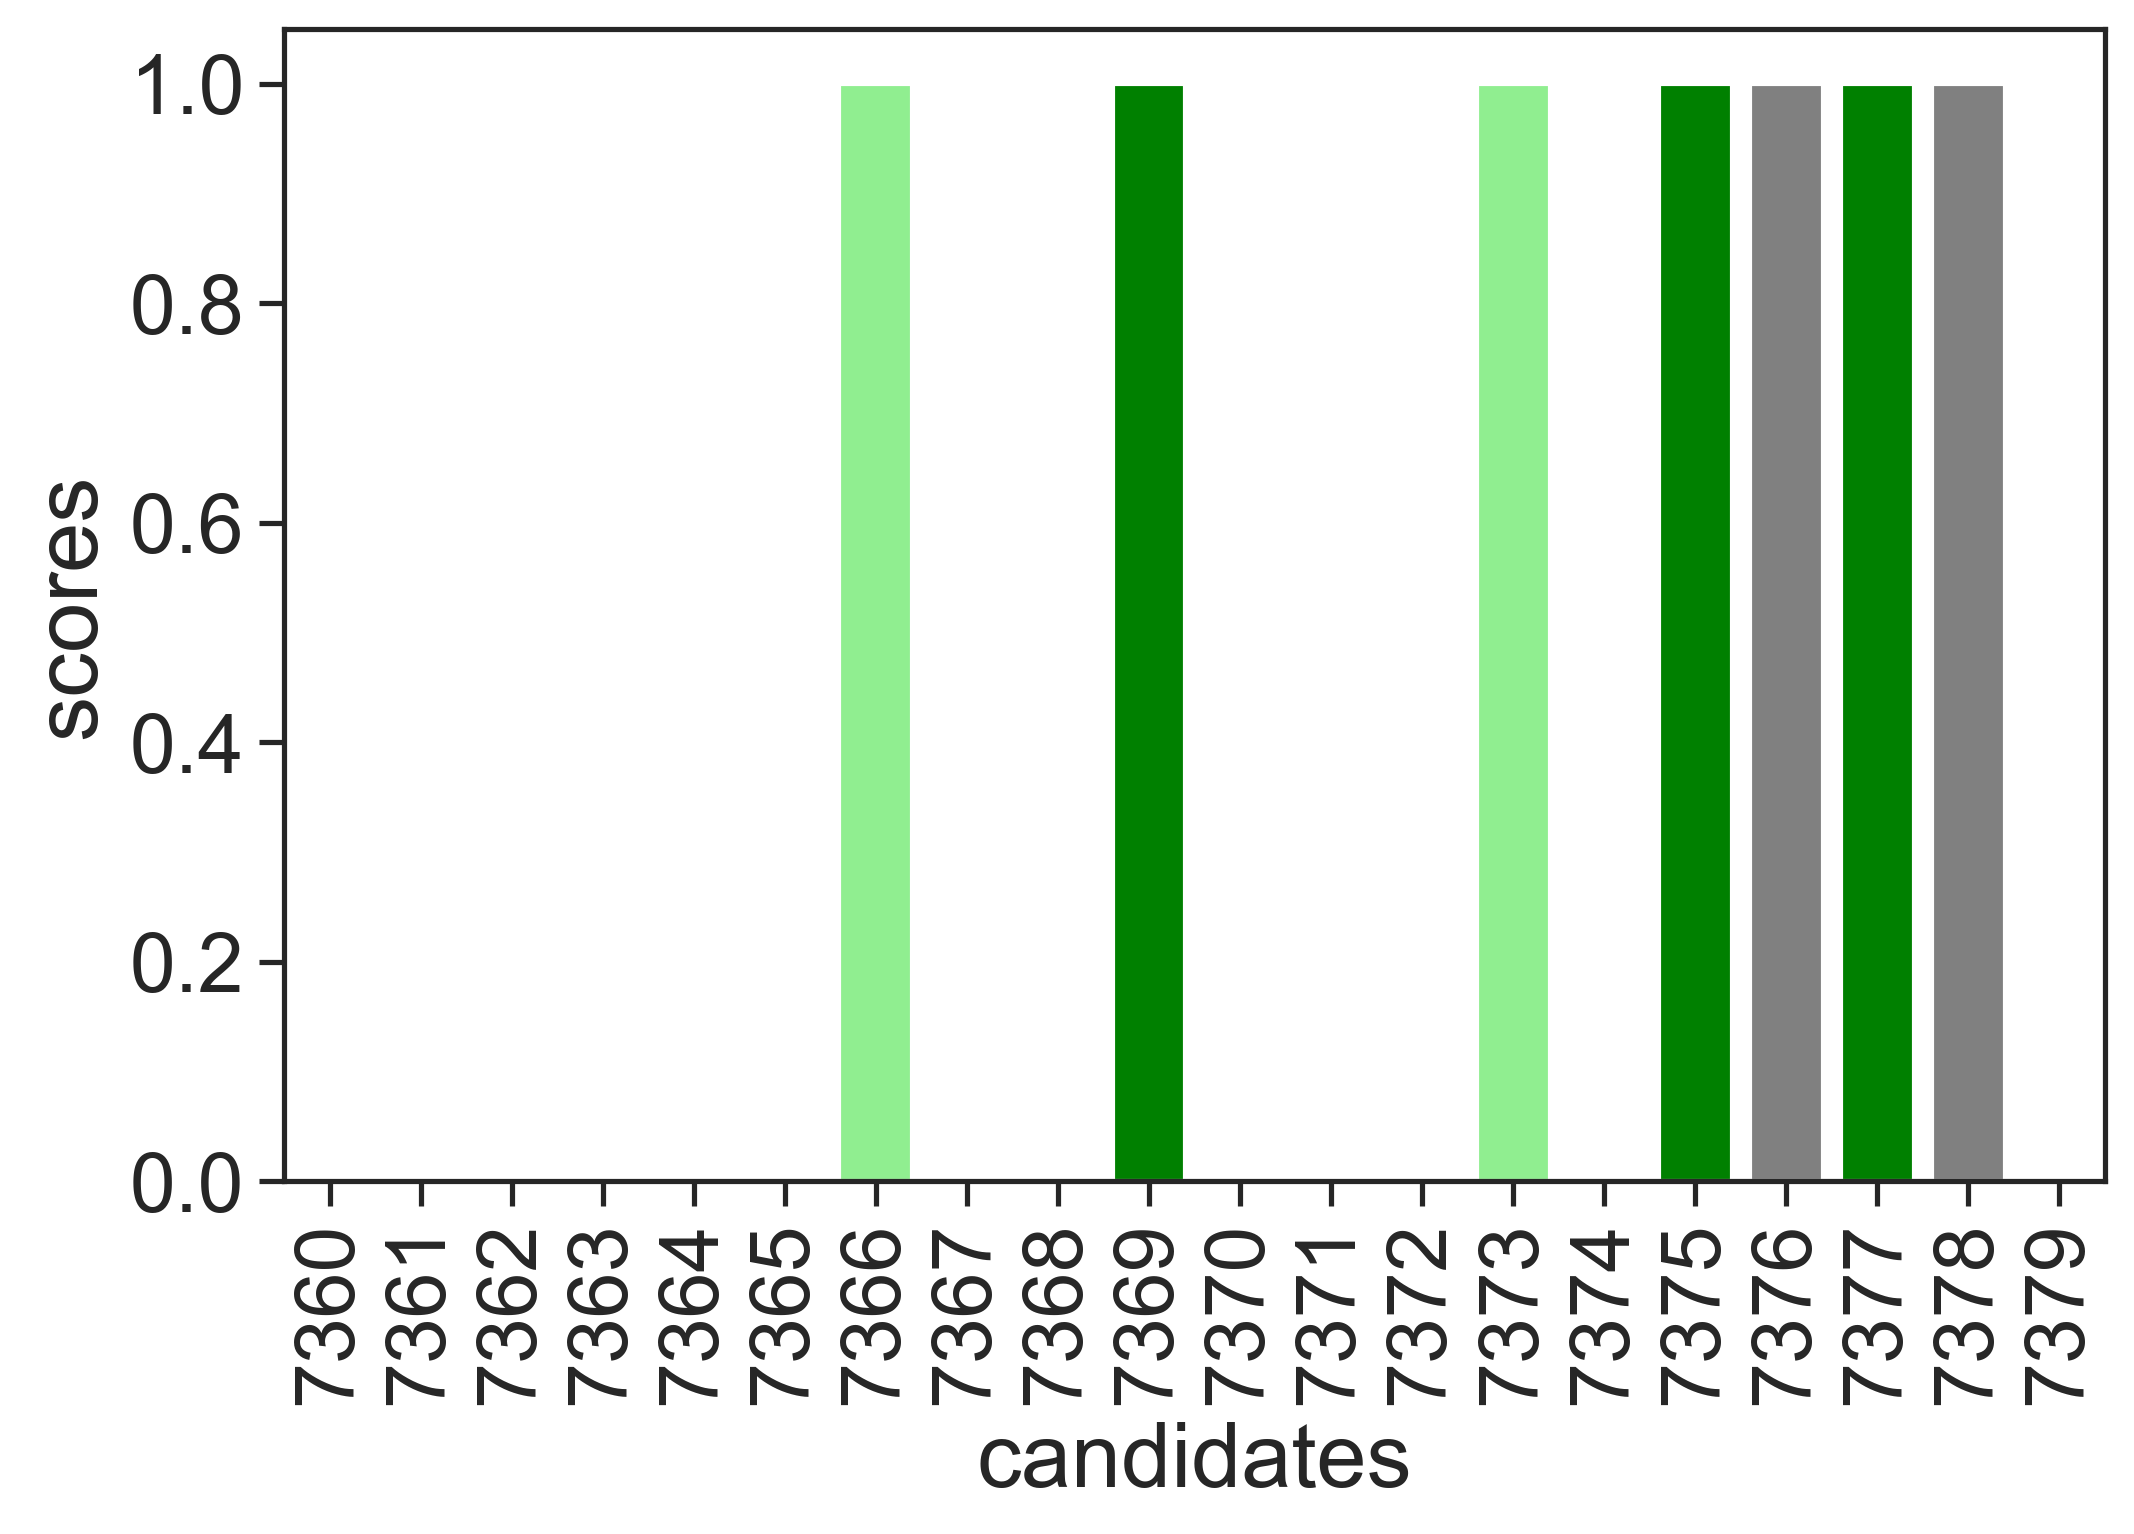

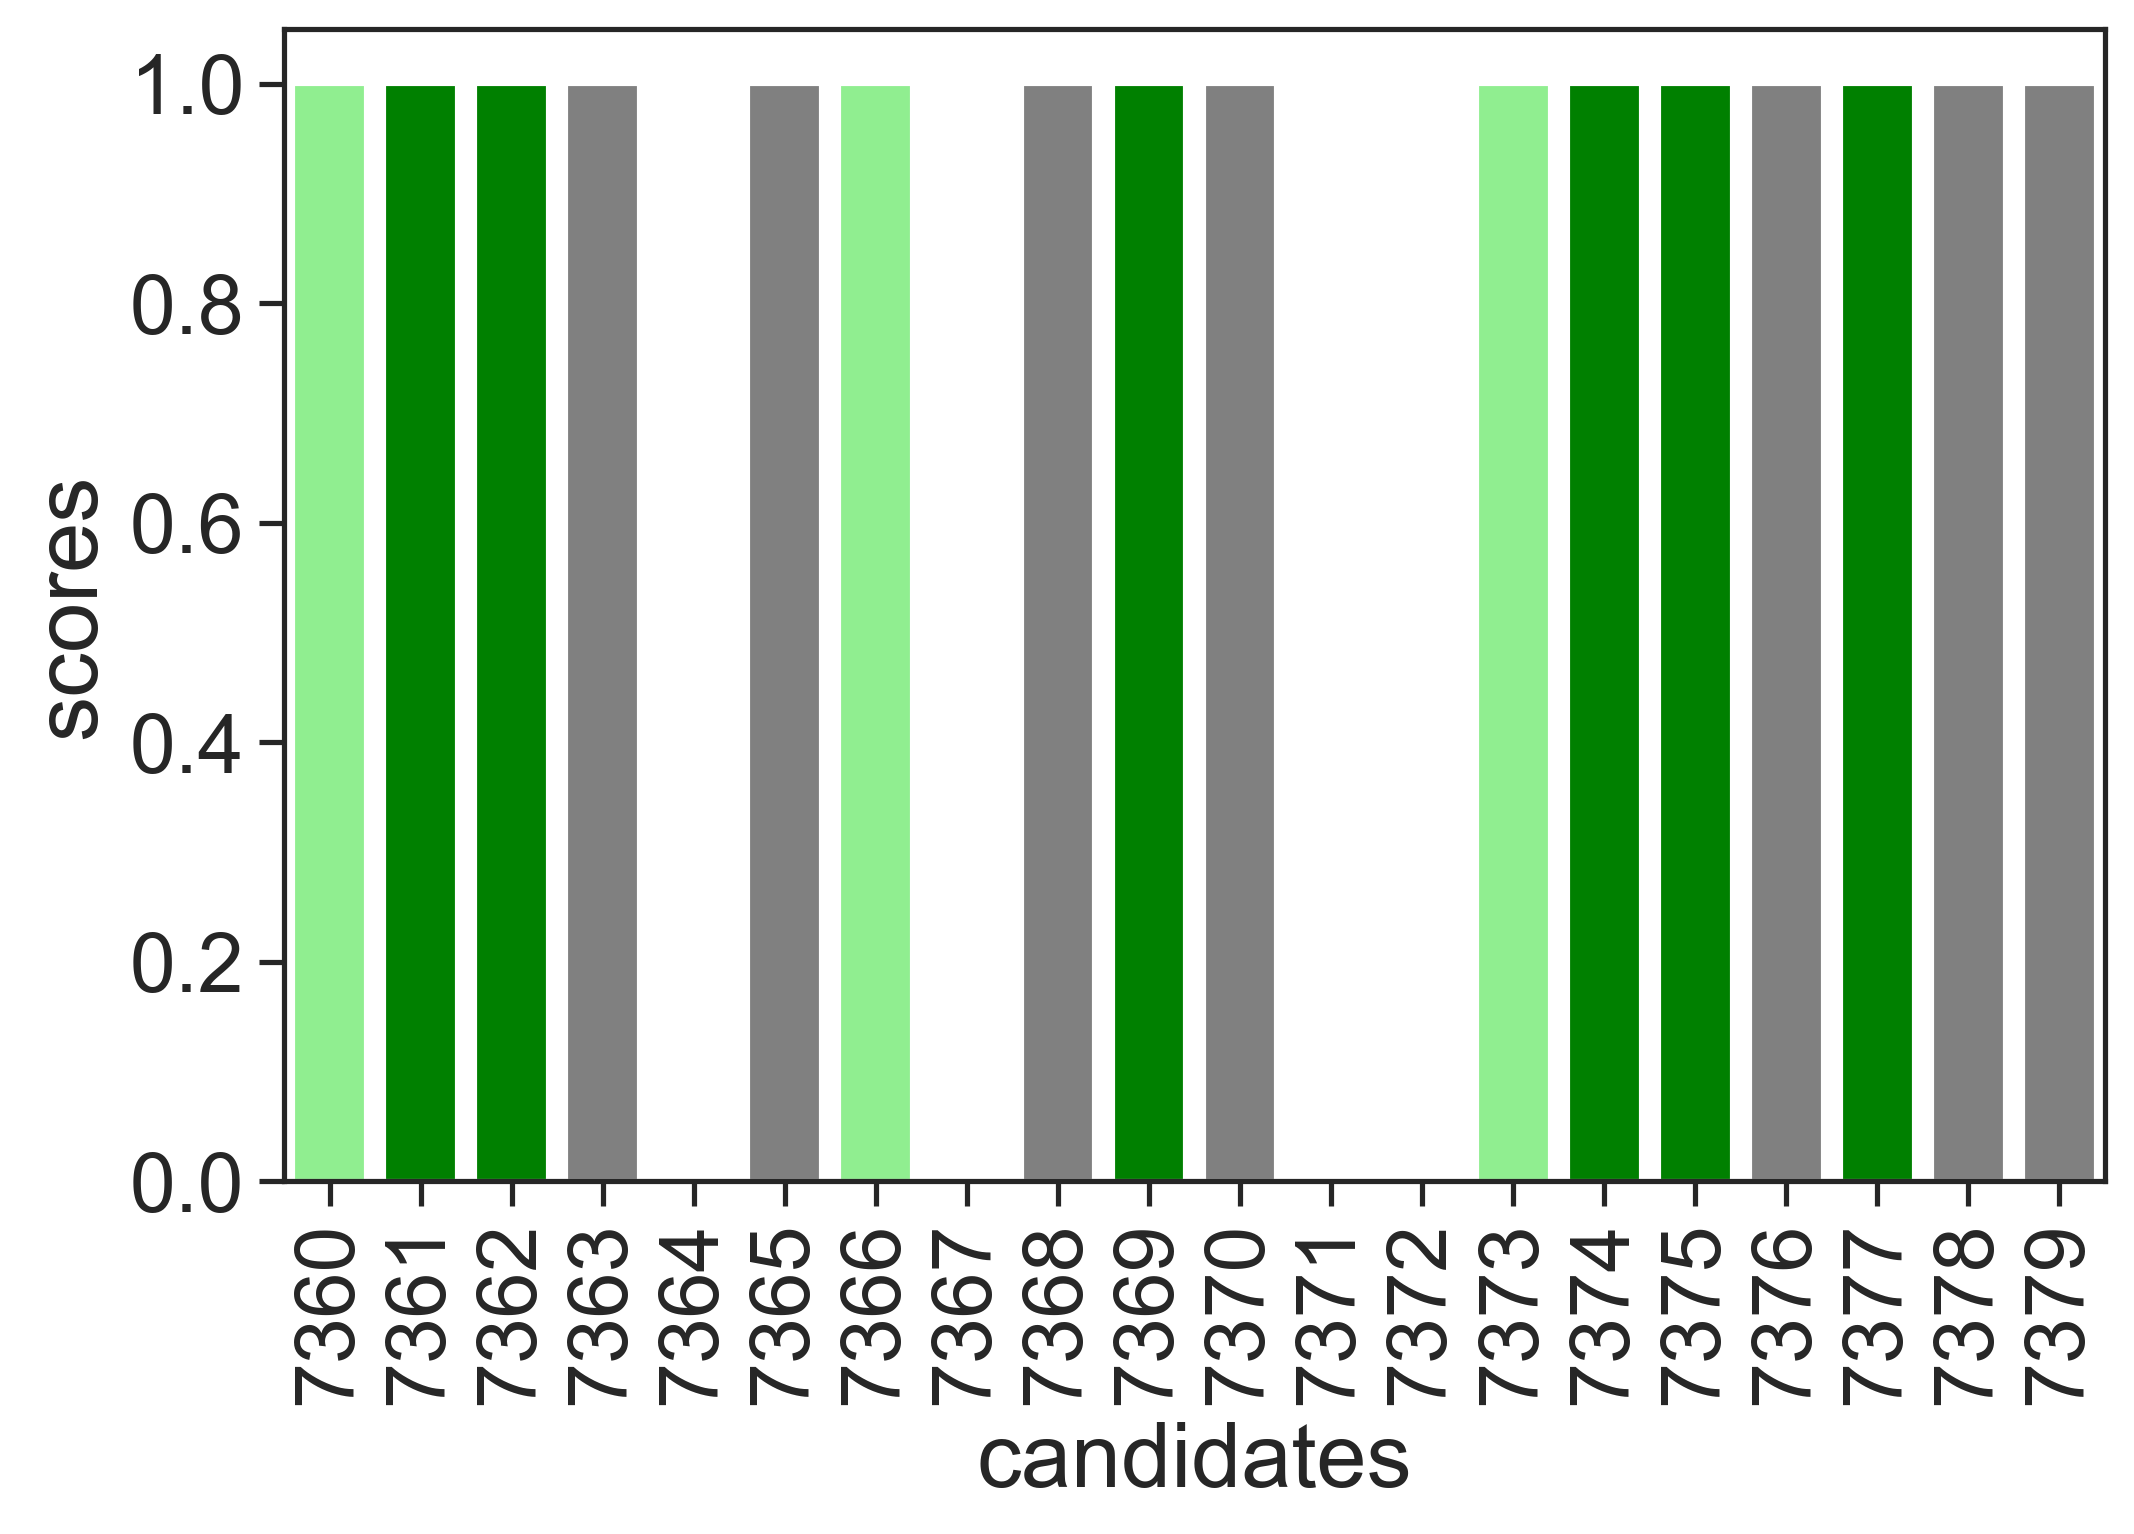

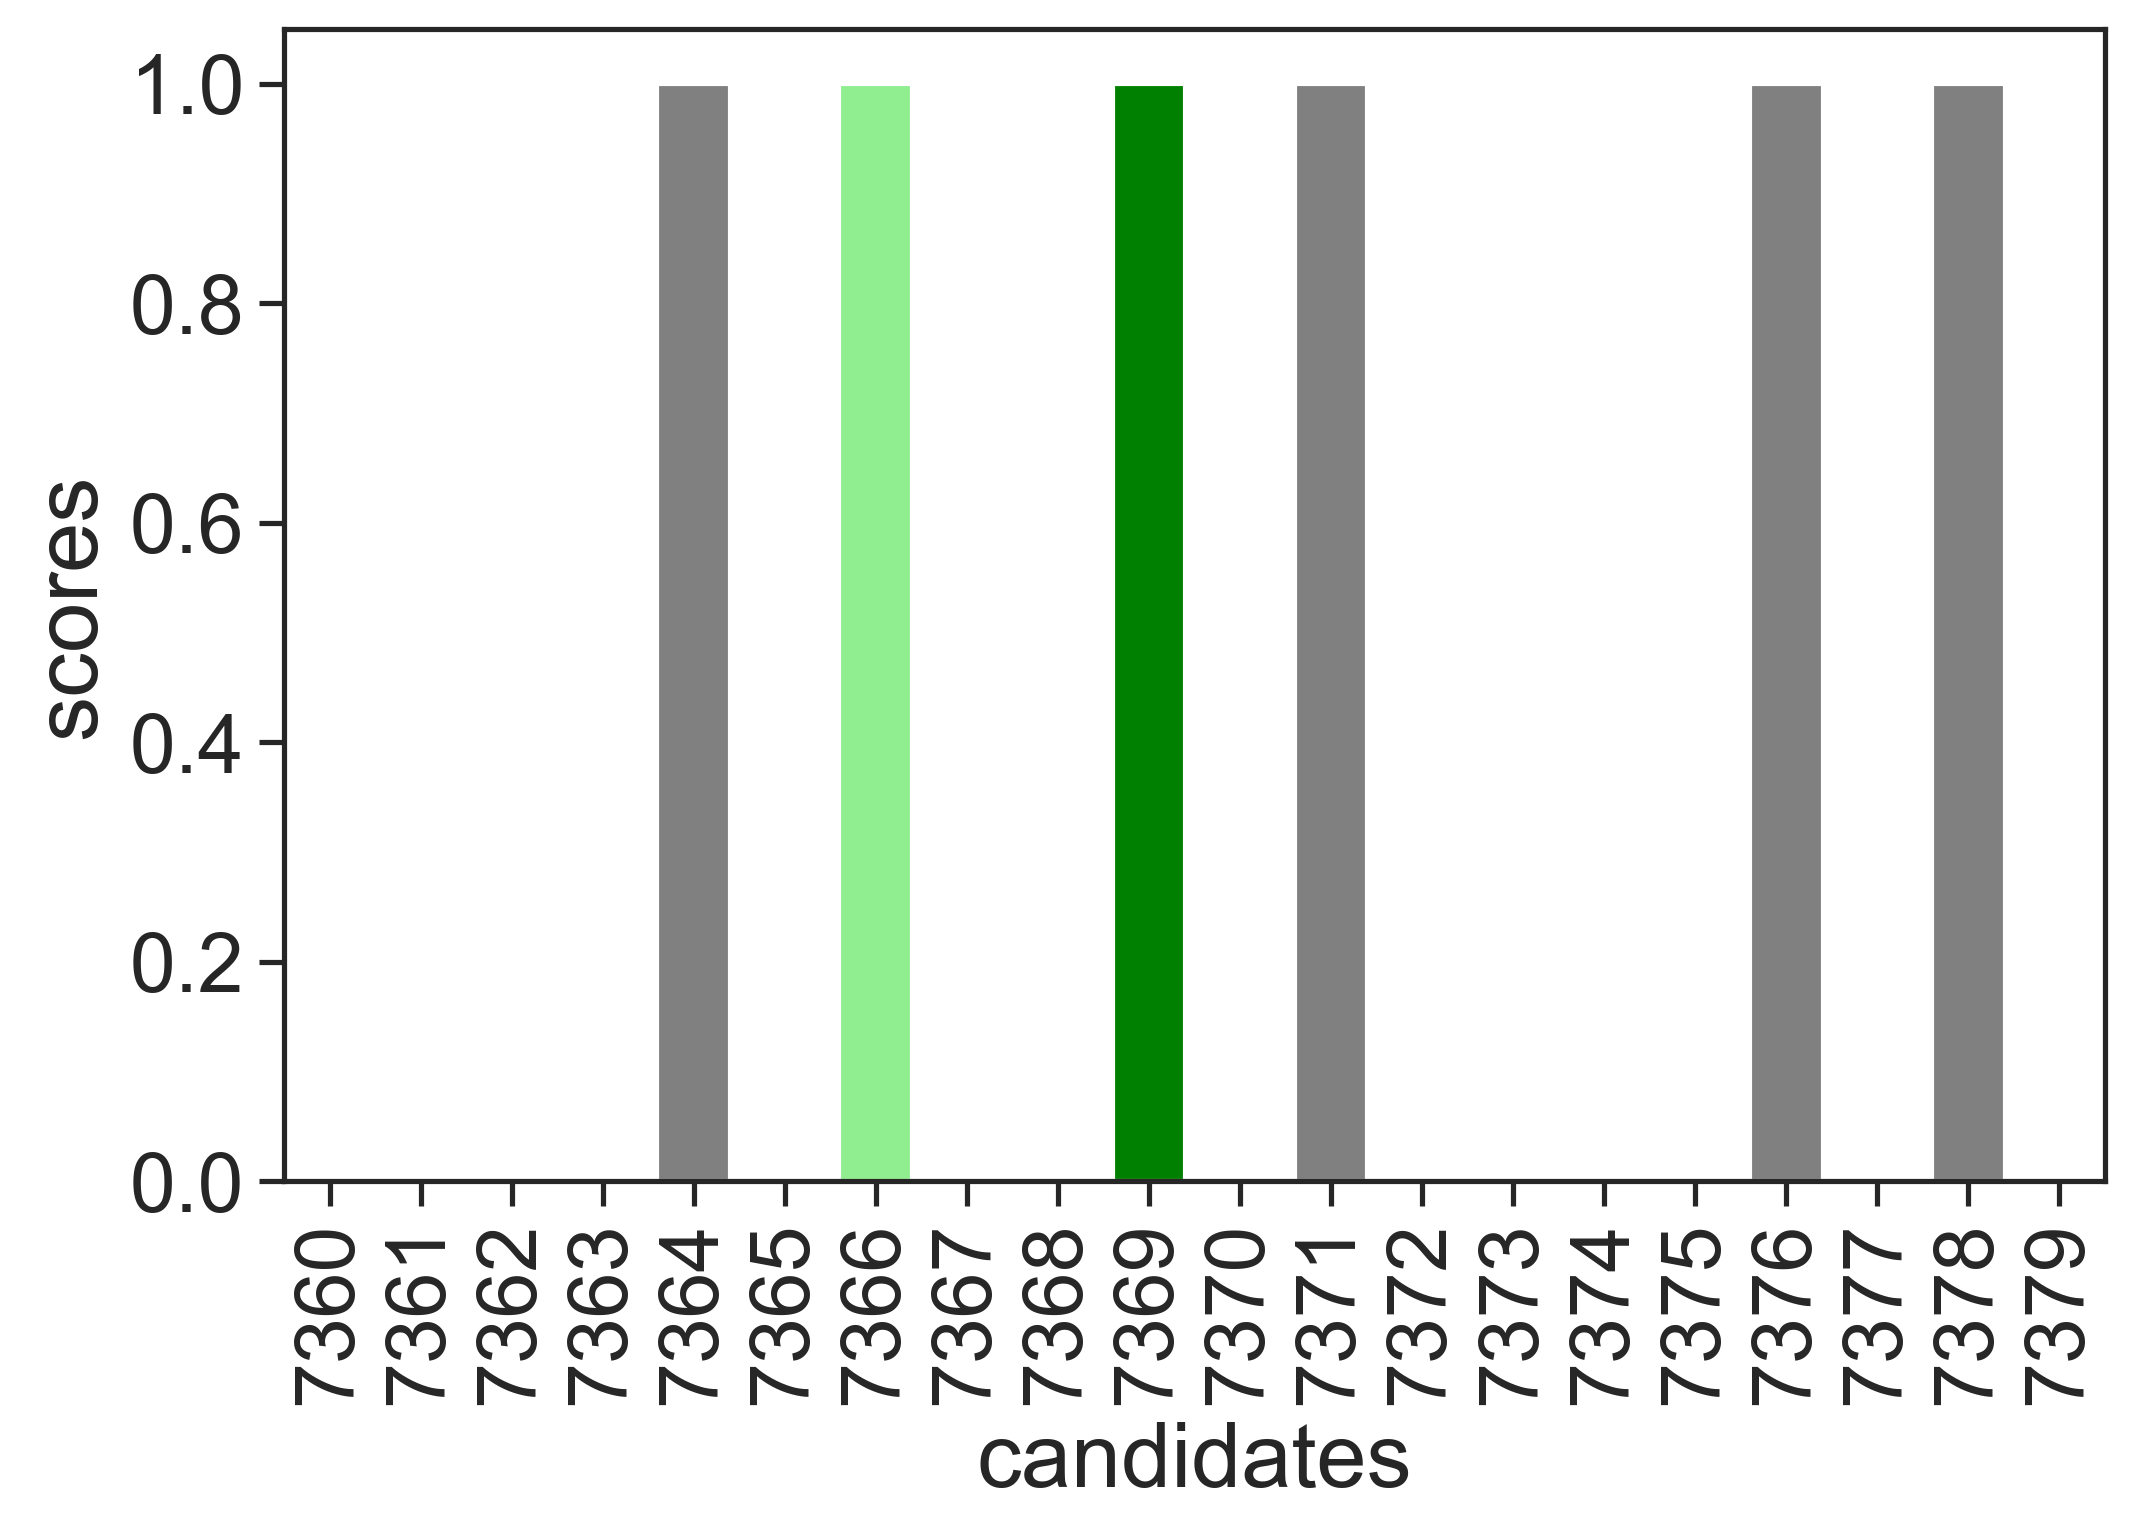

In [176]:
model = "tgat"
threshold = 20
relevancy = [0]*abs(threshold-20)+[1,2, 2, 0, 0, 0, 1, 0, 0, 2, 0, 0, 0, 1, 2, 2, 0, 2, 0, 0]
def get_color(c):
    match c:
        case 0:
            return "grey"
        case 1:
            return "lightgreen"
        case 2:
            return "green"
        case -1:
            return "lightcoral" #dont ask
        case -2:
            return "indianred"
        case _:
            return "white"
colors = [get_color(c) for c in relevancy]
xaxis = range(7380 - threshold, 7380)

for navigator in ["pg_true", "mlp_true", "dot_true"]:
    print("Navigator:", navigator)
    mcts_node_info = next(mcts_path.glob(f"{model}*simulate_v1_7380*{navigator}*{threshold}*"), None)
    if mcts_node_info is None:
        print("No mcts node info found")
        continue
    # mcts_node_info
    node_info = torch.load(mcts_node_info)
    node_info = node_info["saved_MCTSInfo_list"]  # there is only one key in the dict

    best_expansion = max(node_info, key=lambda x: x["P"])

    plt.figure(figsize=(7, 5))
    plt.bar(
        xaxis, [1 if x in best_expansion["coalition"] else 0 for x in xaxis], color=colors
    )

    plt.xlim(7380 - threshold-0.5, 7379+0.5)
    plt.xlabel('candidates')
    plt.ylabel('scores')
    plt.xticks(xaxis, rotation=90)
    plt.savefig(f"plots/simulated_1_7380_{model}_mcts_{navigator}_th{threshold}.png")
# Rotate the ticks 45 degrees

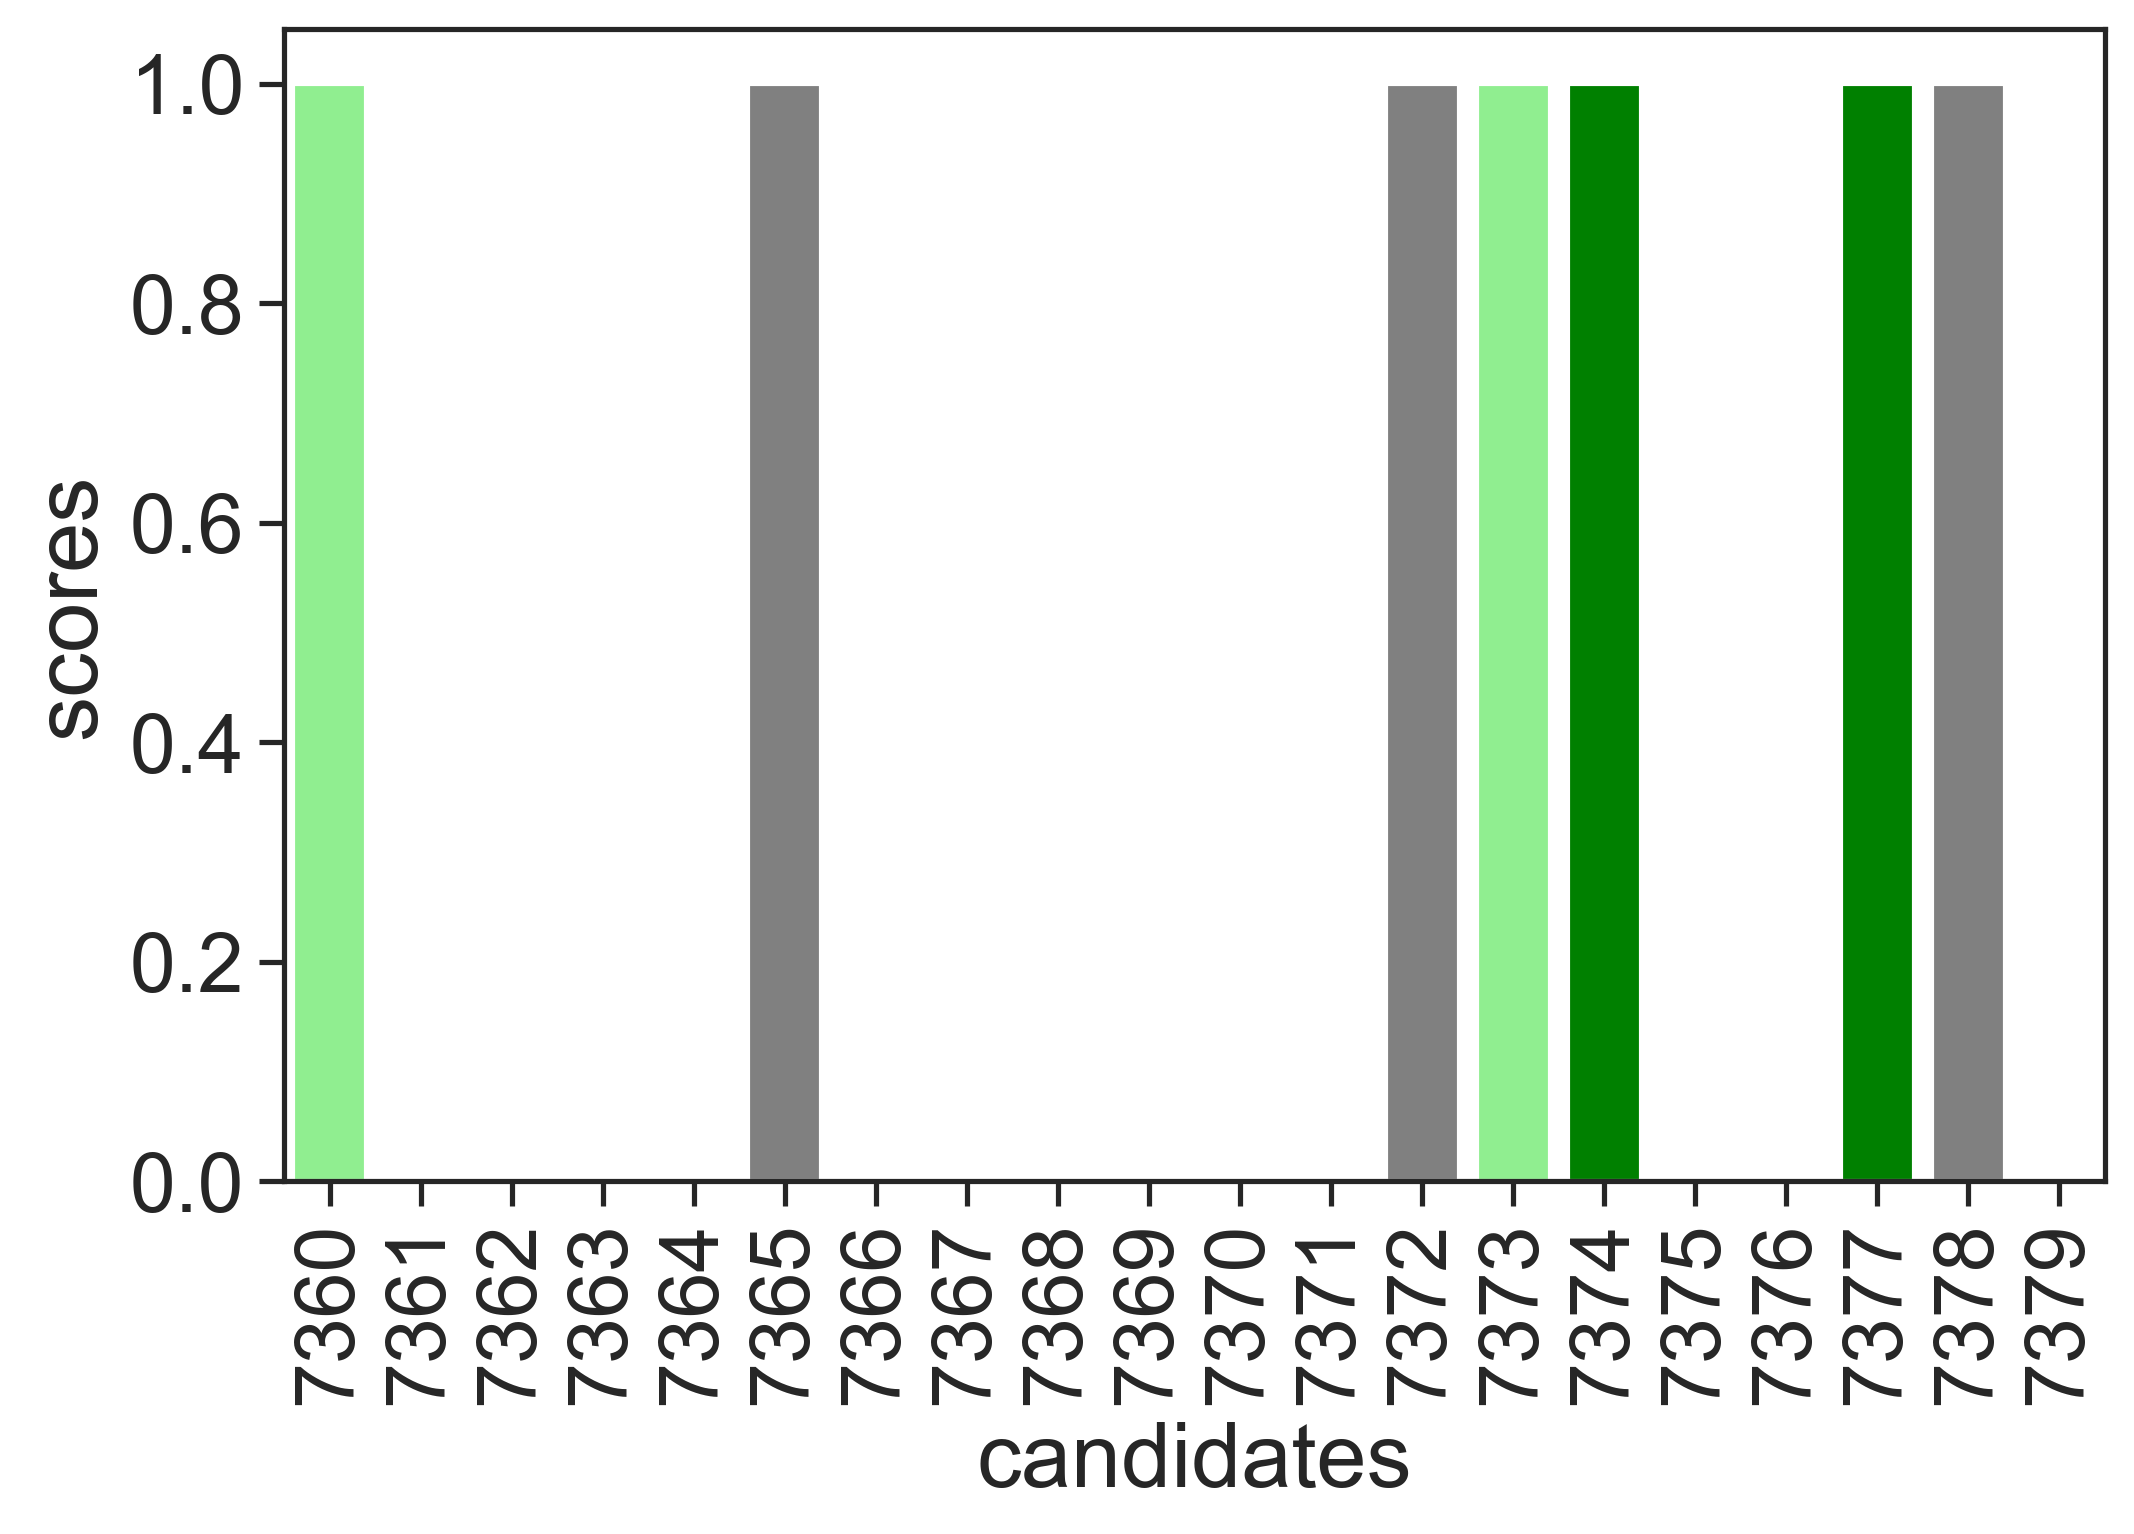

In [177]:
plt.figure(figsize=(7, 5))
xaxis = range(7380 - threshold, 7380)
plt.bar(
    xaxis, [1,0,0,0,0,1,0,0,0,0,0,0,1,1,1,0,0,1,1,0], color=colors
)

plt.xlim(7380 - threshold-0.5, 7379+0.5)
plt.xlabel('candidates')
plt.ylabel('scores')
plt.xticks(xaxis, rotation=90);
plt.savefig("plots/simulated_1_7380_tgat_og.png", bbox_inches='tight')

Navigator: pg_true
Navigator: pg_false
Navigator: dot_true


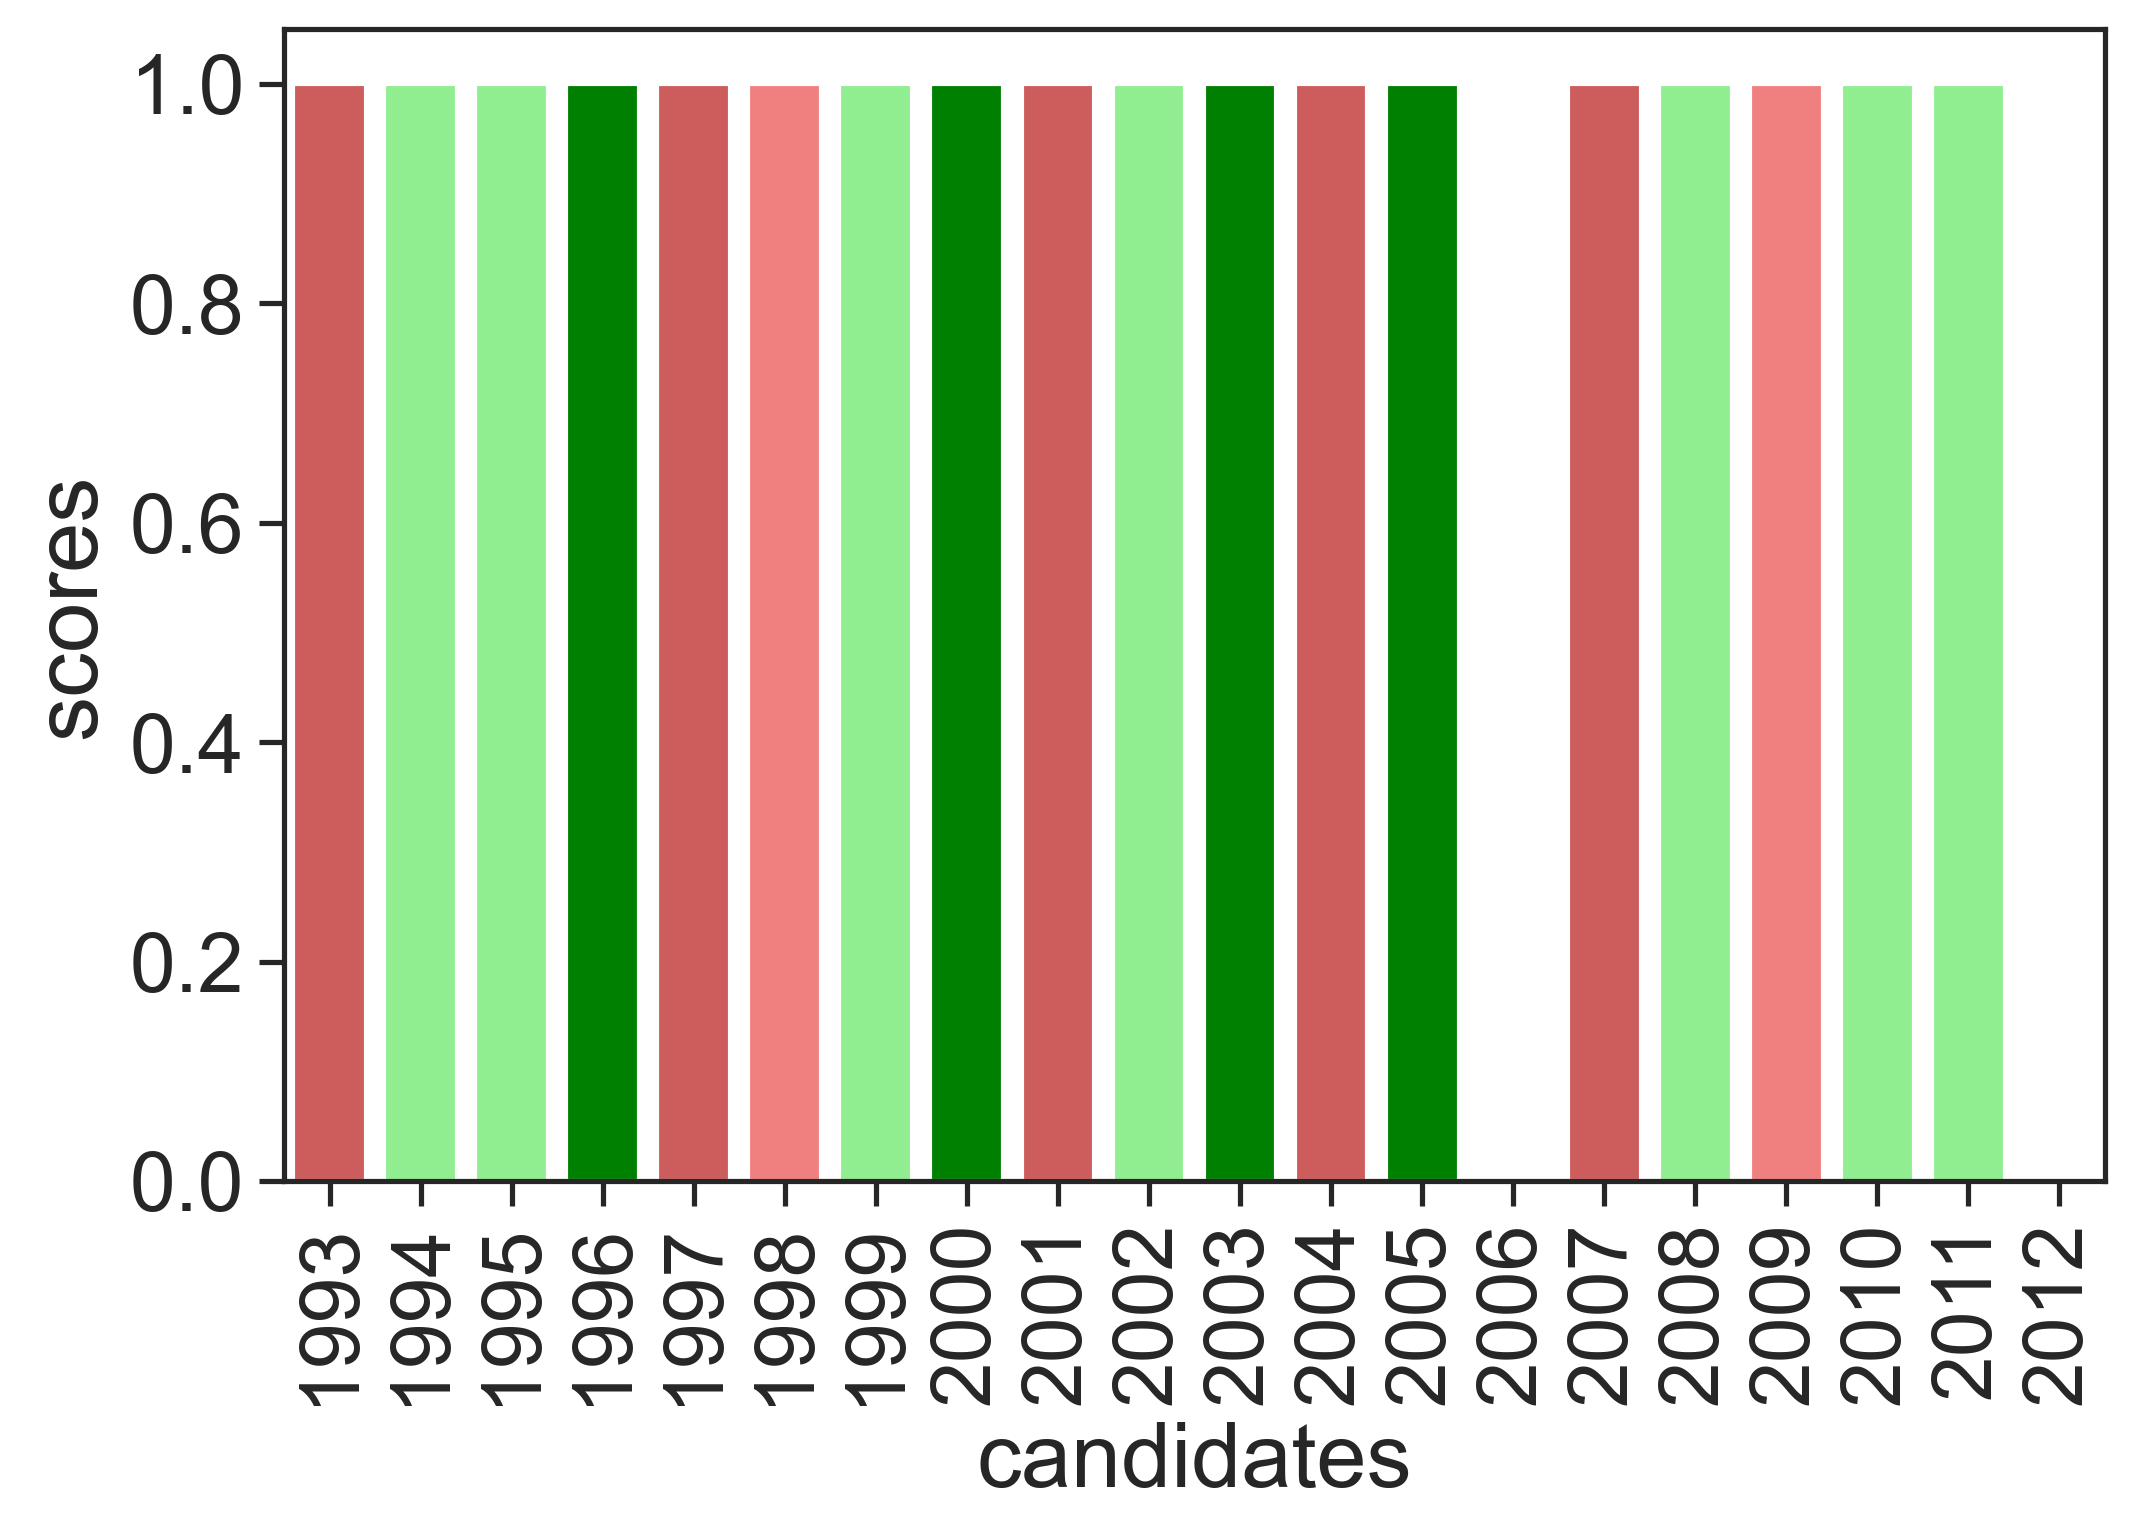

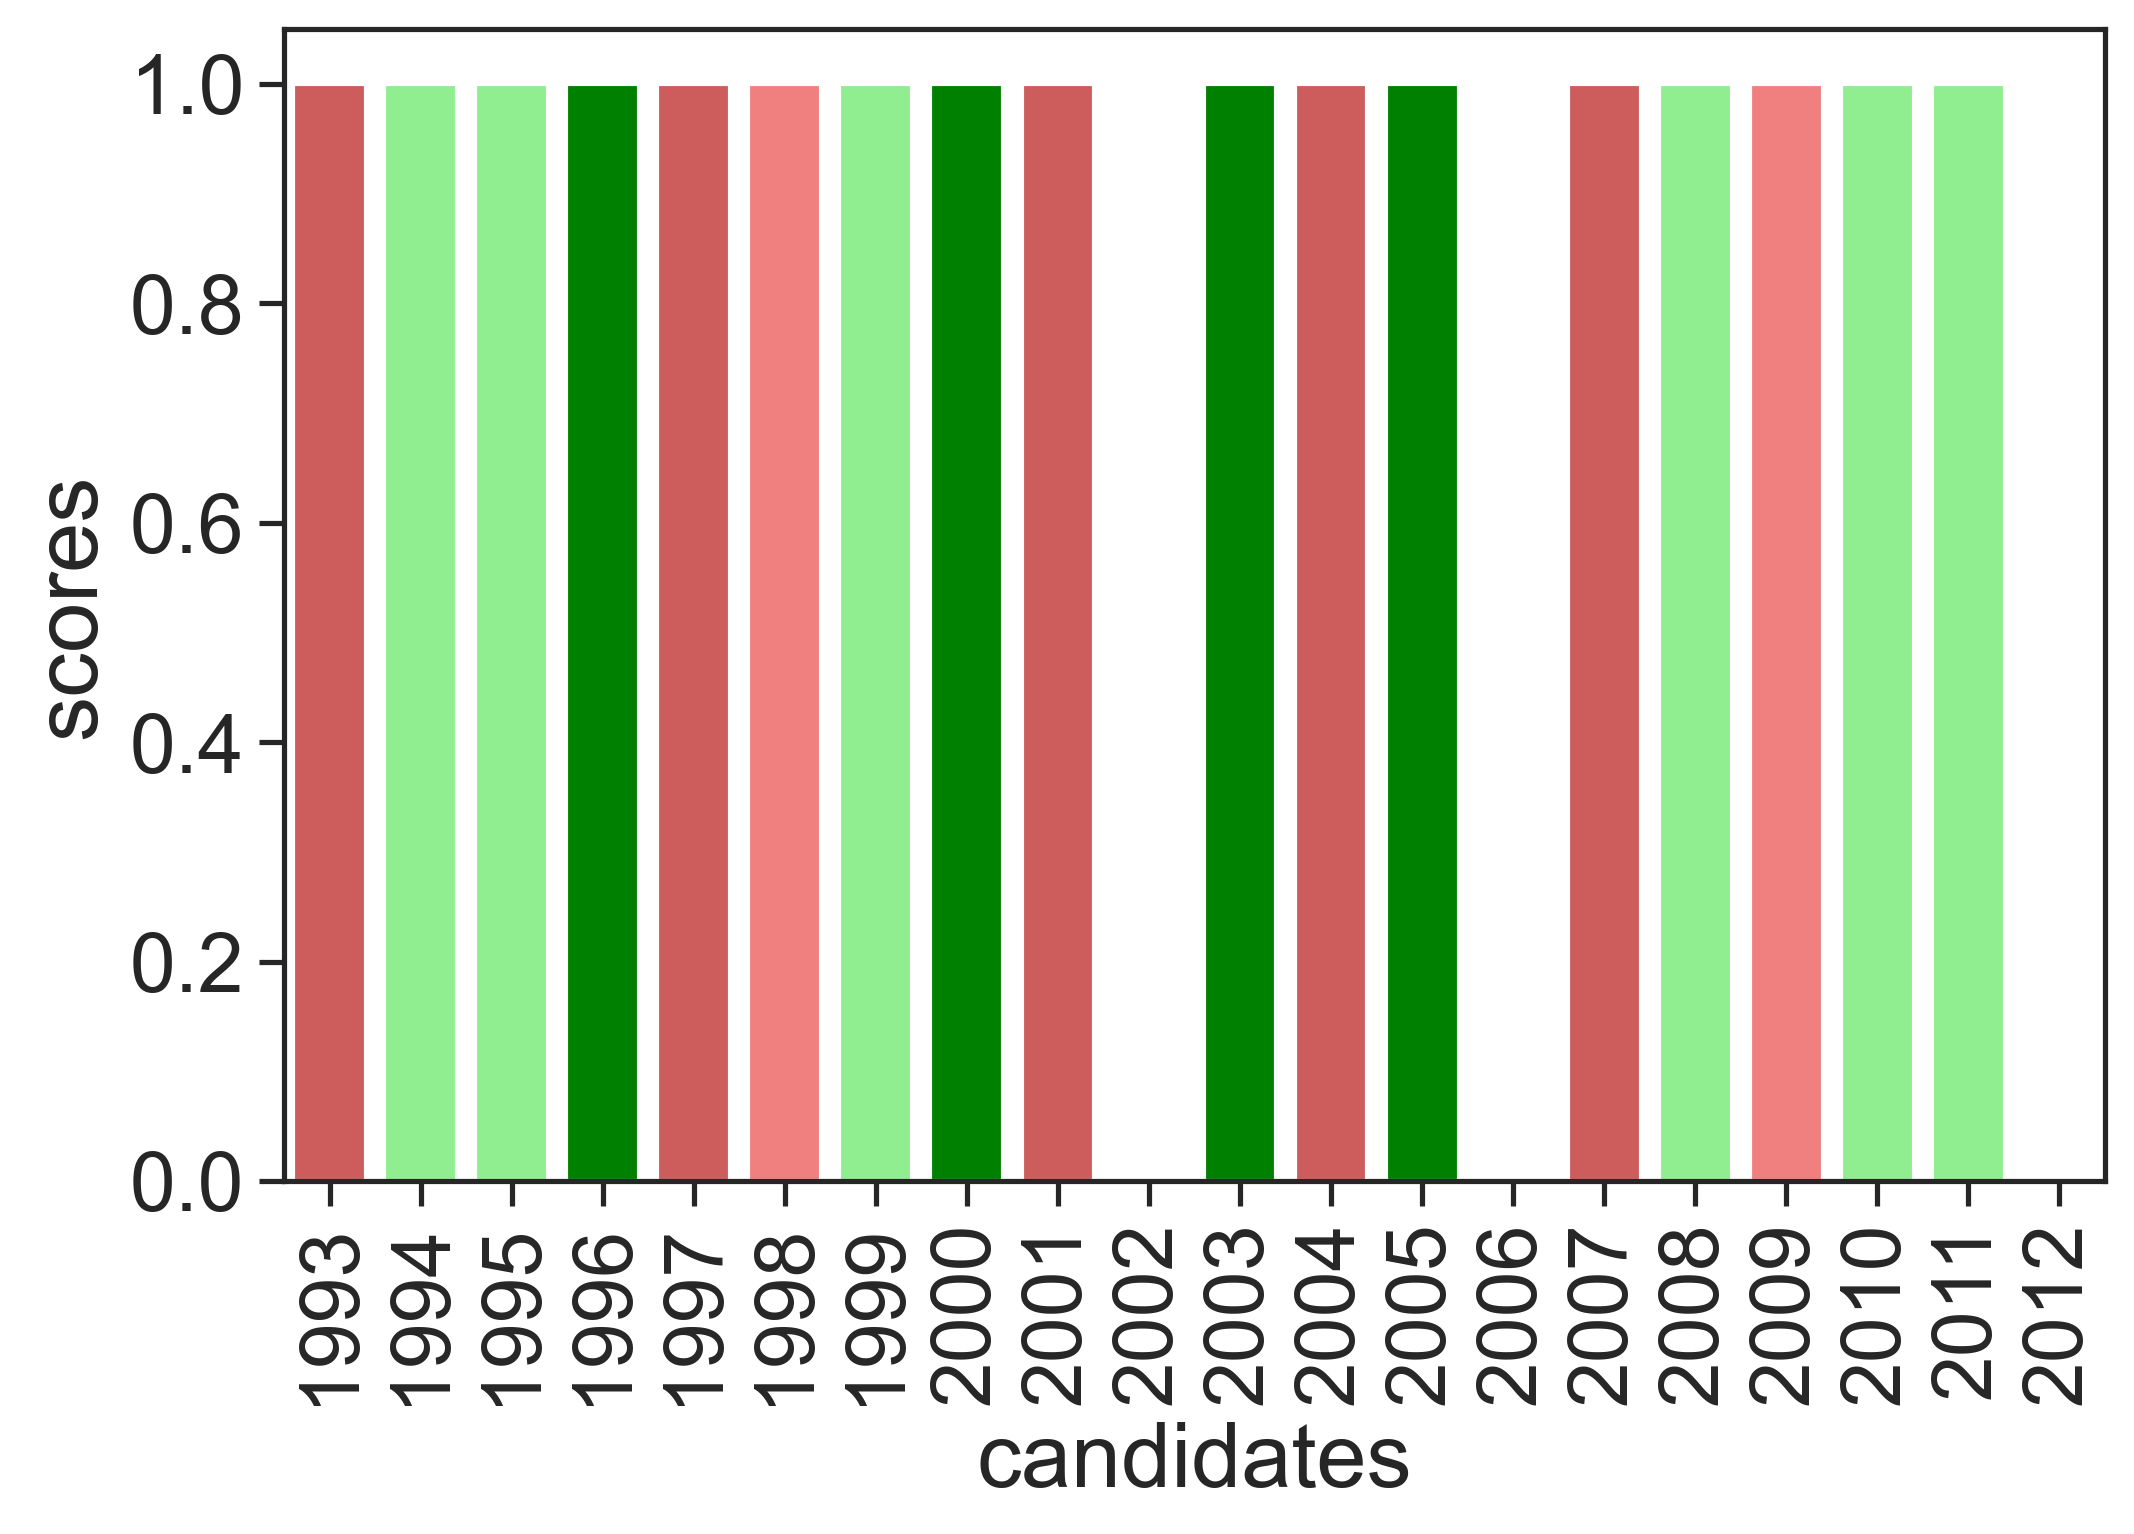

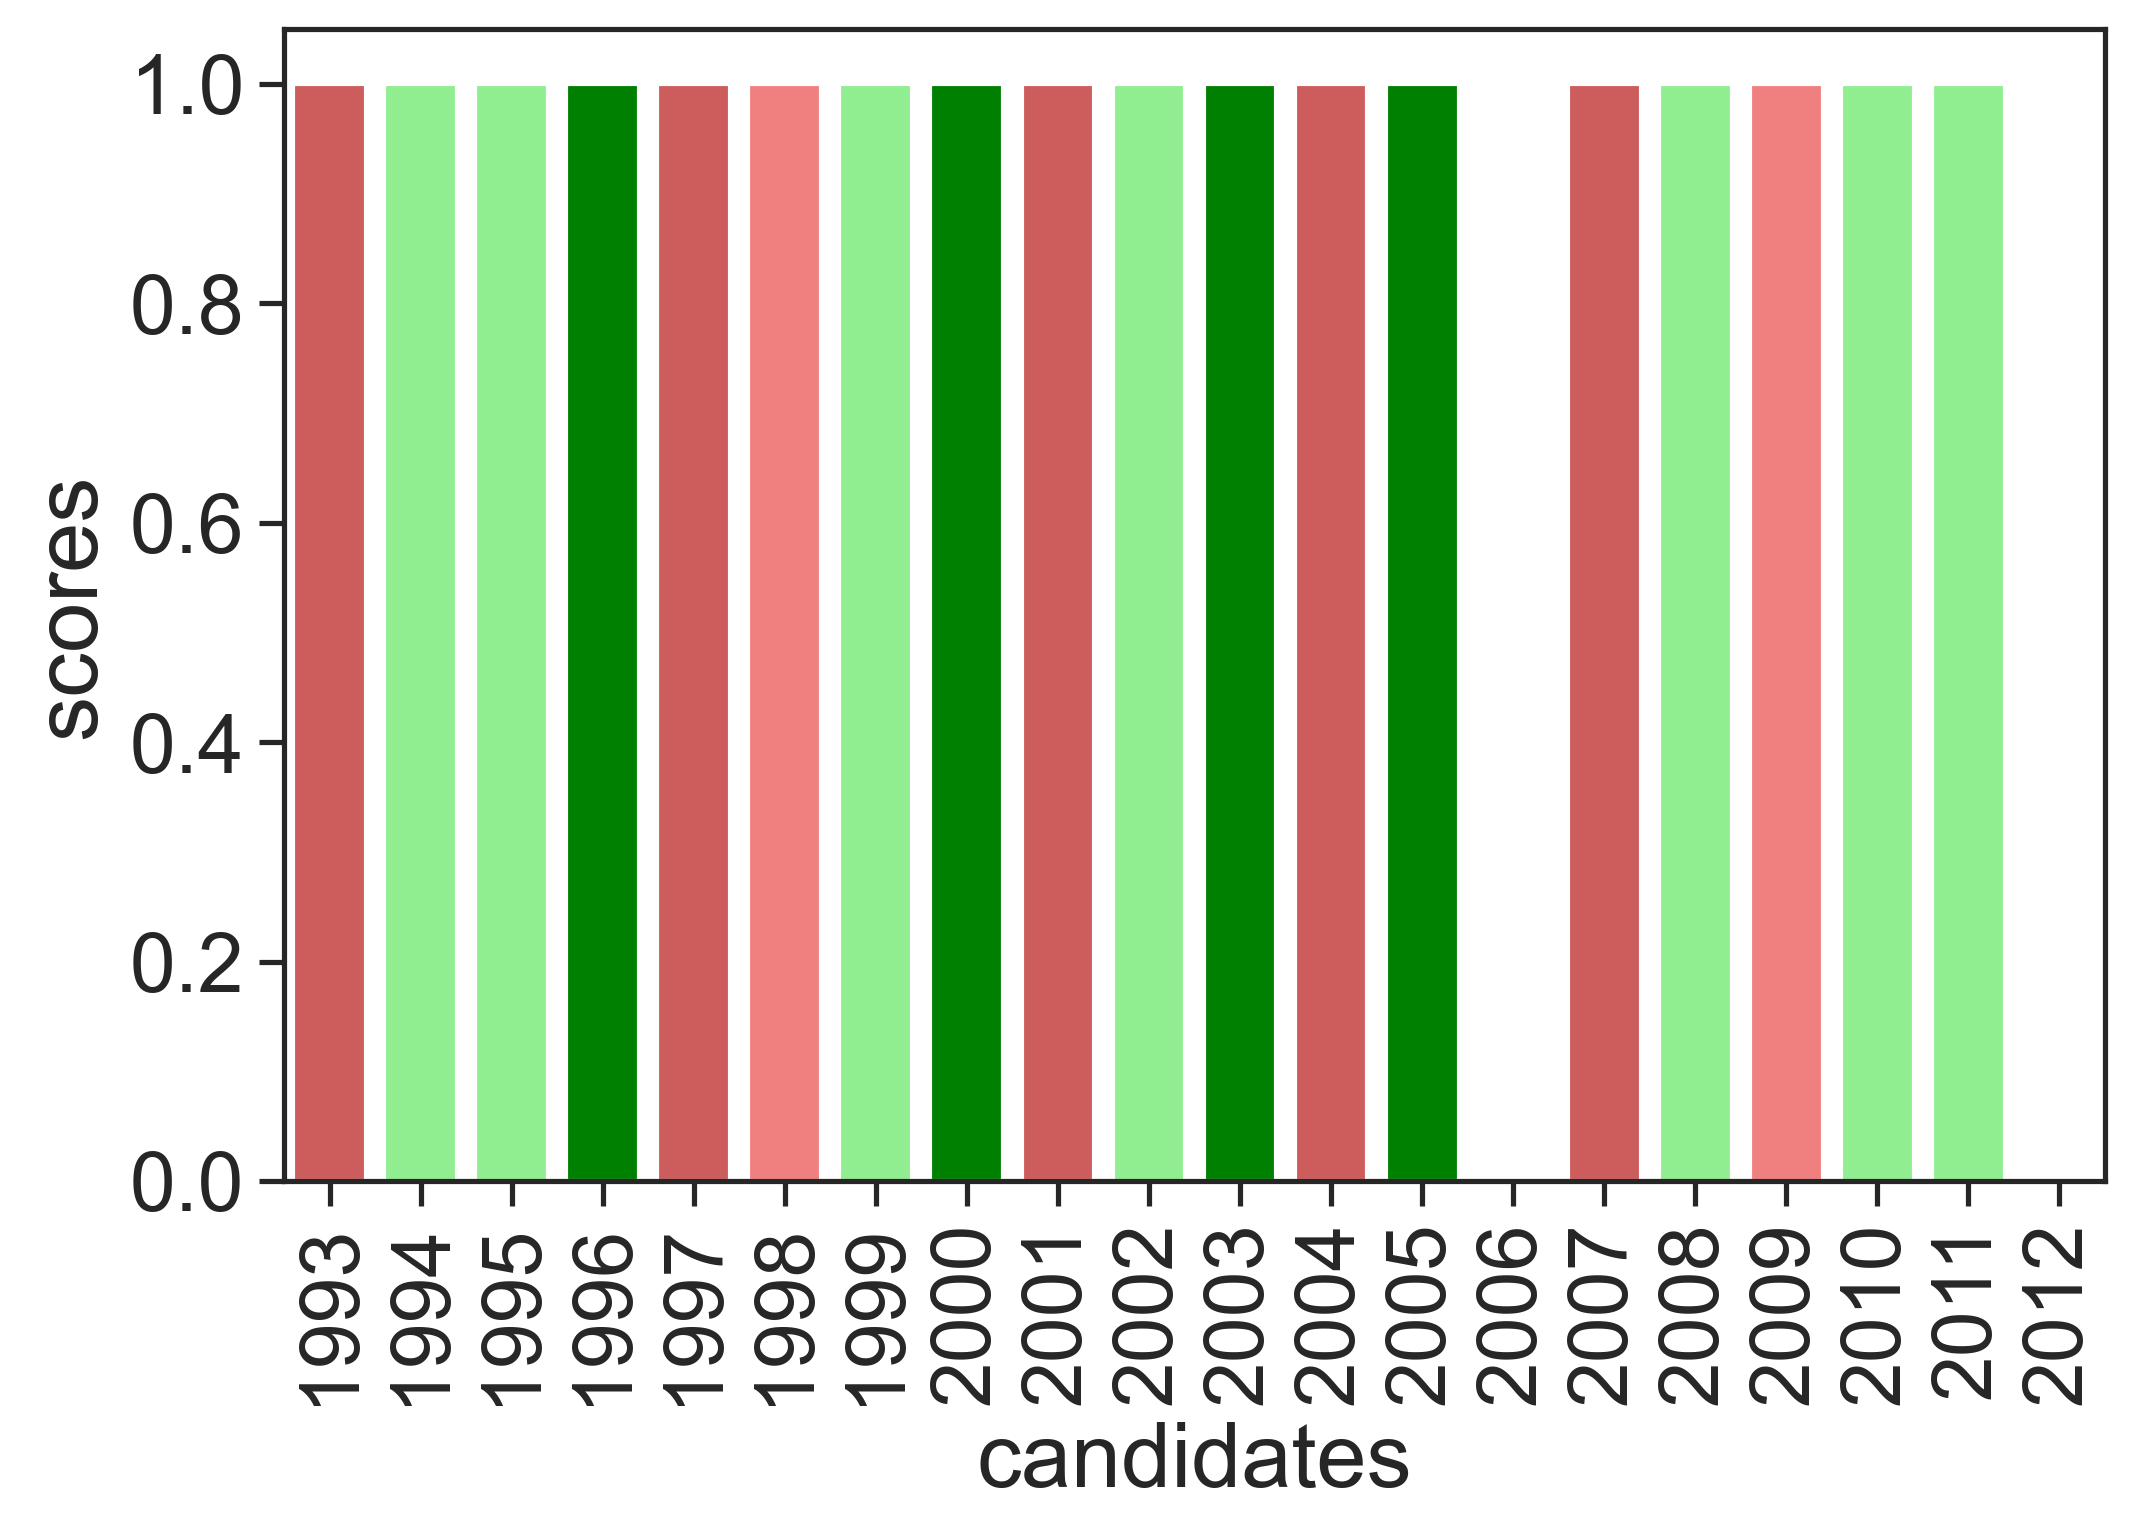

In [174]:
model = "tgat"
threshold = 20
relevancy = [0] * abs(threshold - 20) + [-2,1,1,2,-2,-1,1,2,-2,1,2,-2,2,-2,-2,1,-1,1,1,2]

colors = [get_color(c) for c in relevancy]
xaxis = range(2013 - threshold, 2013)

for navigator in ["pg_true", "pg_false", "dot_true"]:
    print("Navigator:", navigator)
    mcts_node_info = next(
        mcts_path.glob(f"{model}*simulate_v2_2013*{navigator}*{threshold}*")
    )
    # mcts_node_info
    node_info = torch.load(mcts_node_info)
    node_info = node_info["saved_MCTSInfo_list"]  # there is only one key in the dict

    best_expansion = max(node_info, key=lambda x: x["P"])

    plt.figure(figsize=(7, 5))
    plt.bar(
        xaxis,
        [1 if x in best_expansion["coalition"] else 0 for x in xaxis],
        color=colors,
    )

    plt.xlim(2013 - threshold - 0.5, 2013 -1 + 0.5)
    plt.xlabel("candidates")
    plt.ylabel("scores")
    plt.xticks(xaxis, rotation=90)
    plt.savefig(f"plots/simulated_2_2013_{model}_mcts_{navigator}_th{threshold}.png")
# Rotate the ticks 45 degrees

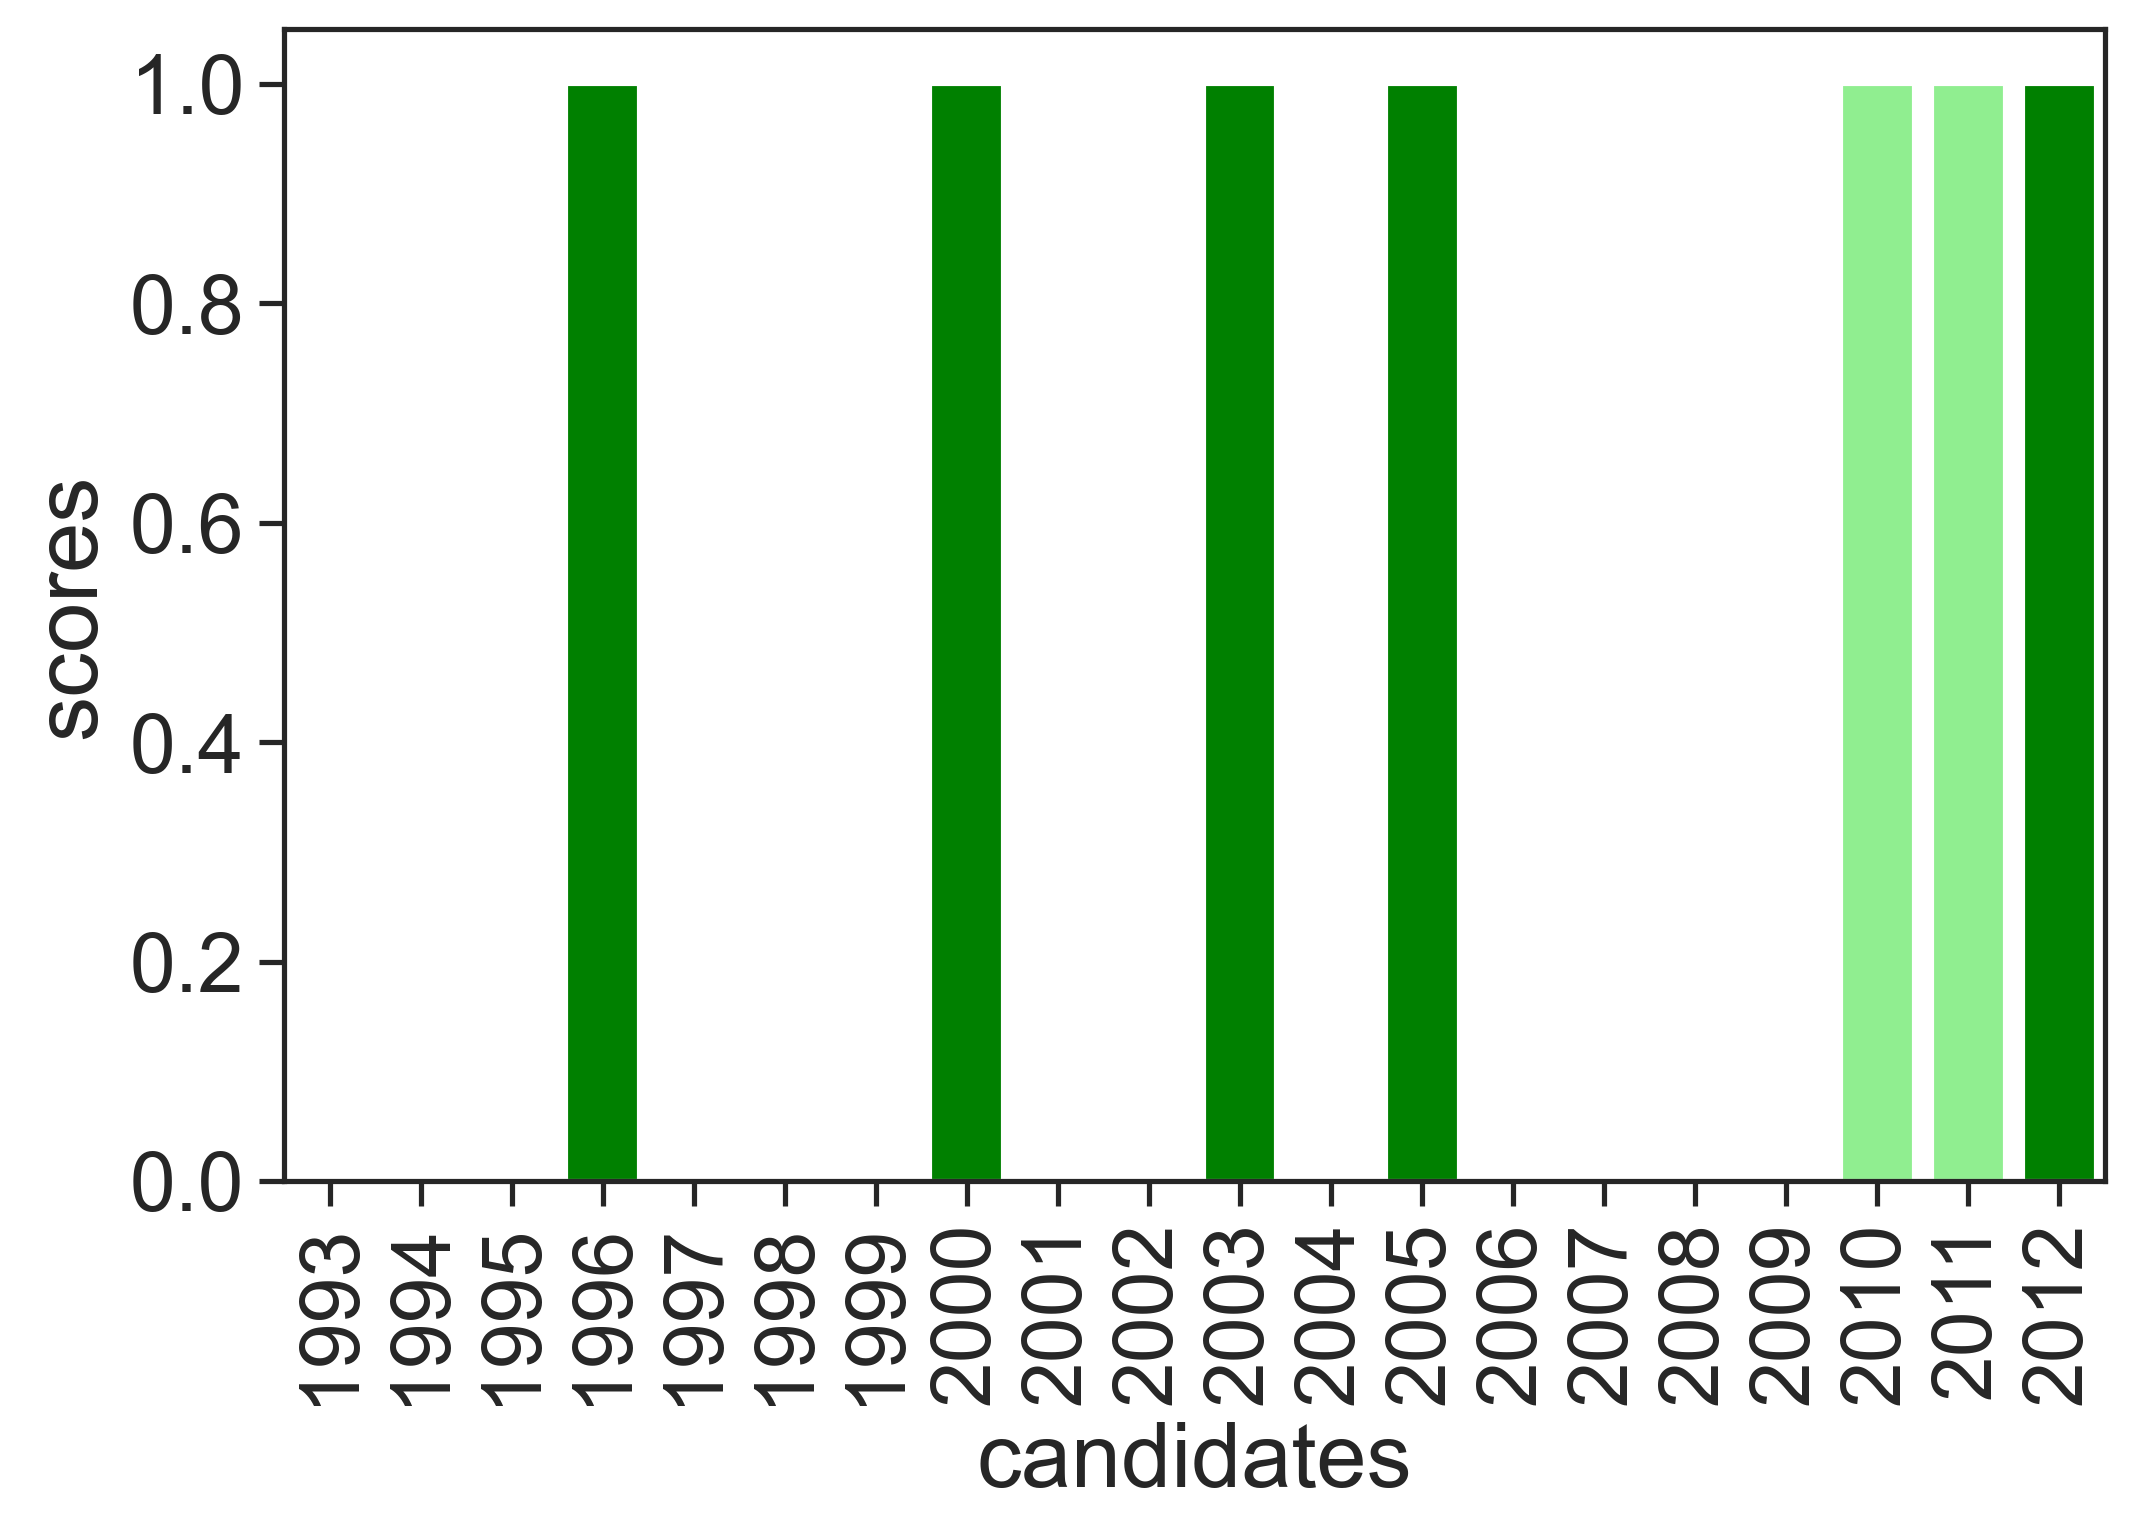

In [168]:
plt.figure(figsize=(7, 5))
xaxis = range(2013 - threshold, 2013)
plt.bar(
    xaxis, [0,0,0,1,0,0,0,1,0,0,1,0,1,0,0,0,0,1,1,1], color=colors
)

plt.xlim(2013 - threshold - 0.5, 2012 + 0.5)
plt.xlabel("candidates")
plt.ylabel("scores")
plt.xticks(xaxis, rotation=90)
plt.savefig("plots/simulated_2_2013_tgat_og.png")

# Runtime comparison

In [153]:
# seconds
training_runtimes = {
    # simulate_v1, simulate_v2, wikipedia, reddit
    "TGAT": [5.0, 6.1, 93, 627.23],
    "TGN": [18.1, 4.2, 84.7, 614],
}

candidate_scores_path = results_path / "candidate_scores"
globs = {
    # XTG, ATTN, PBONE, PG, XTG-D
    k: v
    for k, v in zip(
        ["xtg-og", "xtg-non", "xtg", "xtg-d"],
        [
            "{model}_{dataset}*pg_true*_th25*",
            "{model}_{dataset}*pg_false*_th25*",
            "{model}_{dataset}*mlp_true*_th25*",
            # '{model}_{dataset}*_attn*',
            # '{model}_{dataset}*_pbone*',
            # '{model}_{dataset}*_pg*',
            "{model}_{dataset}*dot_true*_th25*",
        ],
    )
}

model = "tgat"
# model = "tgn"
metric = "runtime"  # rollout, runtime
scores = {}
not_found = []
for explainer in globs:
    scores[explainer] = {}
    for dataset in ["simulate_v1", "simulate_v2", "wikipedia", "reddit"]:
        try:
            glob = candidate_scores_path.glob(
                globs[explainer].format(model=model, dataset=dataset)
            )

            # collate stats for all runs
            arrs = [pd.read_csv(g) for g in glob]
            res = []
            for arr in arrs:
                # find the best score
                boop = arr["best_reward"]
                # normalize
                boop = (boop - boop.min()) / (boop.max() - boop.min())
                # find the idx of the first score above 0.8
                idx = (boop >= 0.8).to_numpy().argmax()
                res.append(arr[metric].to_numpy()[idx])

            sc = np.array(res)

            # filter outliers
            sc = sc[sc - sc.mean() < 3 * sc.std()]
            print(len(sc))
            scores[explainer][dataset] = (sc.mean(), sc.std())
        except (KeyError, StopIteration):
            not_found.append(f"{explainer}_{dataset}")
            continue
print("Not found:", not_found)

# deepcopy to avoid overwriting
explainer_fid_times = pd.DataFrame.from_dict(scores, orient="columns").T
explainer_fid_times = explainer_fid_times.rename(labels, inplace=False).rename(
    dataset_to_index, axis=1, inplace=False
)

explainer_fid_times = explainer_fid_times.applymap(lambda x: f"{x[0]:.2f} ± {x[1]:.1f}")
explainer_fid_latex = (
    explainer_fid_times.style.highlight_min(props="font-weight:bold")
    .to_latex(hrules=True, convert_css=True)
    .replace(
        "\\end{tabular}",
        f"\\end{{tabular}}\n\\caption{{\\label{{tab:{model}_time}}TGNN-X time to 80\% of best fidelity for {model.upper()} model.}}\n",
    )
)

with open(f"{model}_{metric}_tab.tex", "w") as f:
    f.write(explainer_fid_latex)
print(explainer_fid_latex)

102
99
100
100
101
101
100
100
495
499
493
486
102
101
100
98
Not found: []
\begin{tabular}{lllll}
\toprule
 & Synthetic V1 & Synthetic V2 & Wikipedia & Reddit \\
\midrule
PGNavigator & 18.04 ± 14.2 & 11.68 ± 11.7 & \bfseries 20.12 ± 19.7 & 30.06 ± 29.4 \\
PG (NO NAV) & 14.47 ± 13.4 & 9.75 ± 13.4 & 25.51 ± 19.7 & 33.62 ± 31.5 \\
MLPNavigator & \bfseries 12.62 ± 9.9 & \bfseries 11.36 ± 14.5 & 21.61 ± 17.3 & 31.10 ± 34.0 \\
DotProdNavigator & 19.91 ± 17.9 & 11.56 ± 15.5 & 32.48 ± 24.7 & \bfseries 29.94 ± 29.3 \\
\bottomrule
\end{tabular}
\caption{\label{tab:tgat_time}TGNN-X time to 80\% of best fidelity for TGAT model.}




In [154]:
display(explainer_fid_times)

,Synthetic V1,Synthetic V2,Wikipedia,Reddit
PGNavigator,18.04 ± 14.2,11.68 ± 11.7,20.12 ± 19.7,30.06 ± 29.4
PG (NO NAV),14.47 ± 13.4,9.75 ± 13.4,25.51 ± 19.7,33.62 ± 31.5
MLPNavigator,12.62 ± 9.9,11.36 ± 14.5,21.61 ± 17.3,31.10 ± 34.0
DotProdNavigator,19.91 ± 17.9,11.56 ± 15.5,32.48 ± 24.7,29.94 ± 29.3


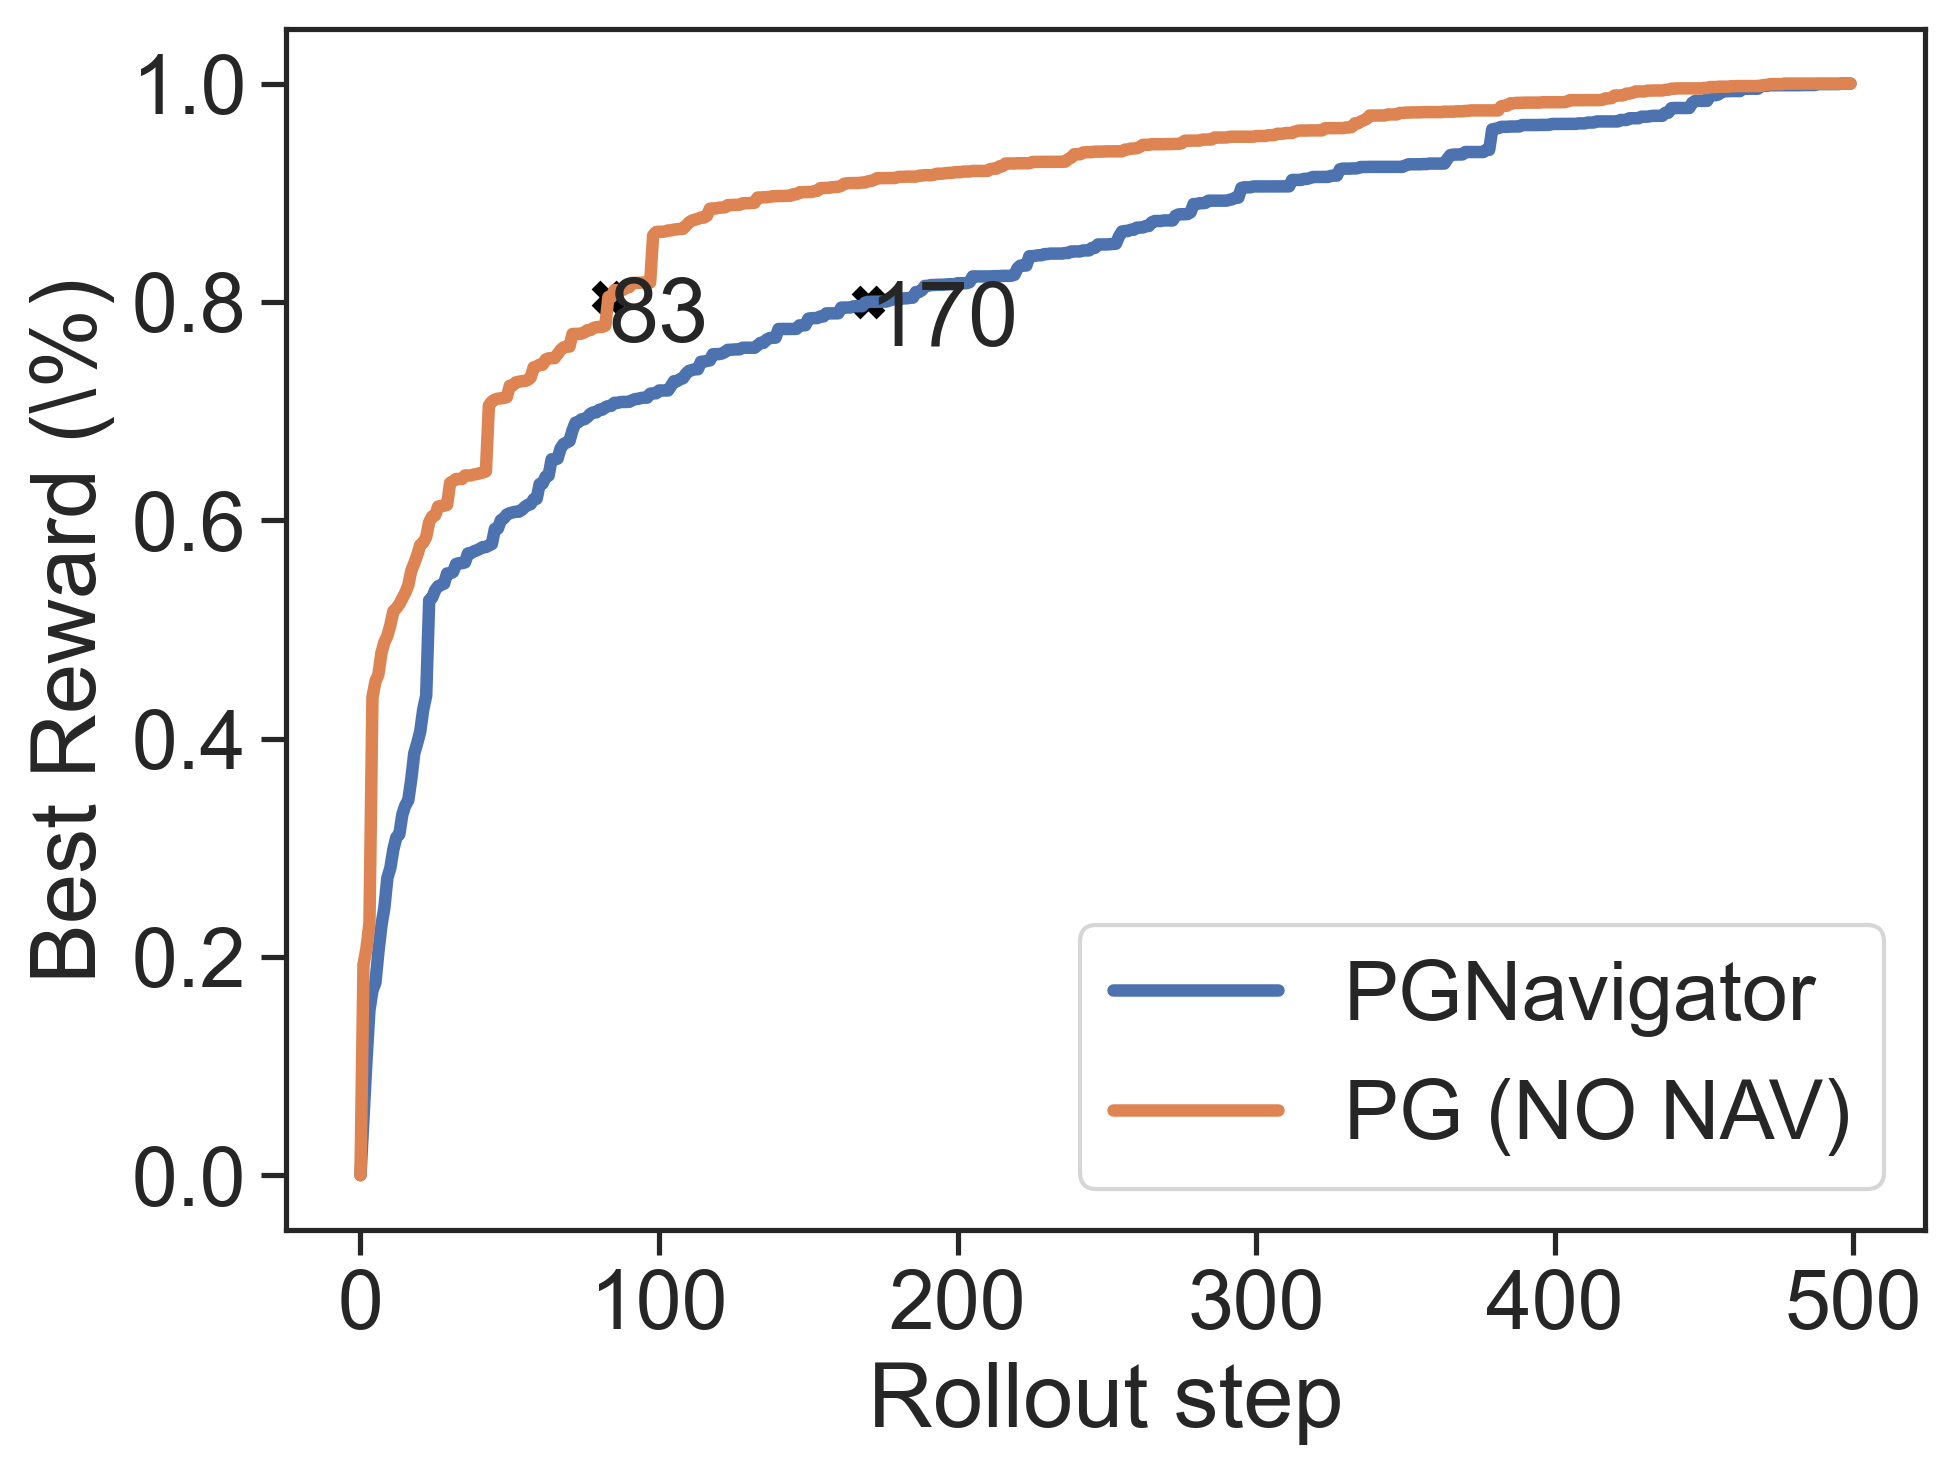

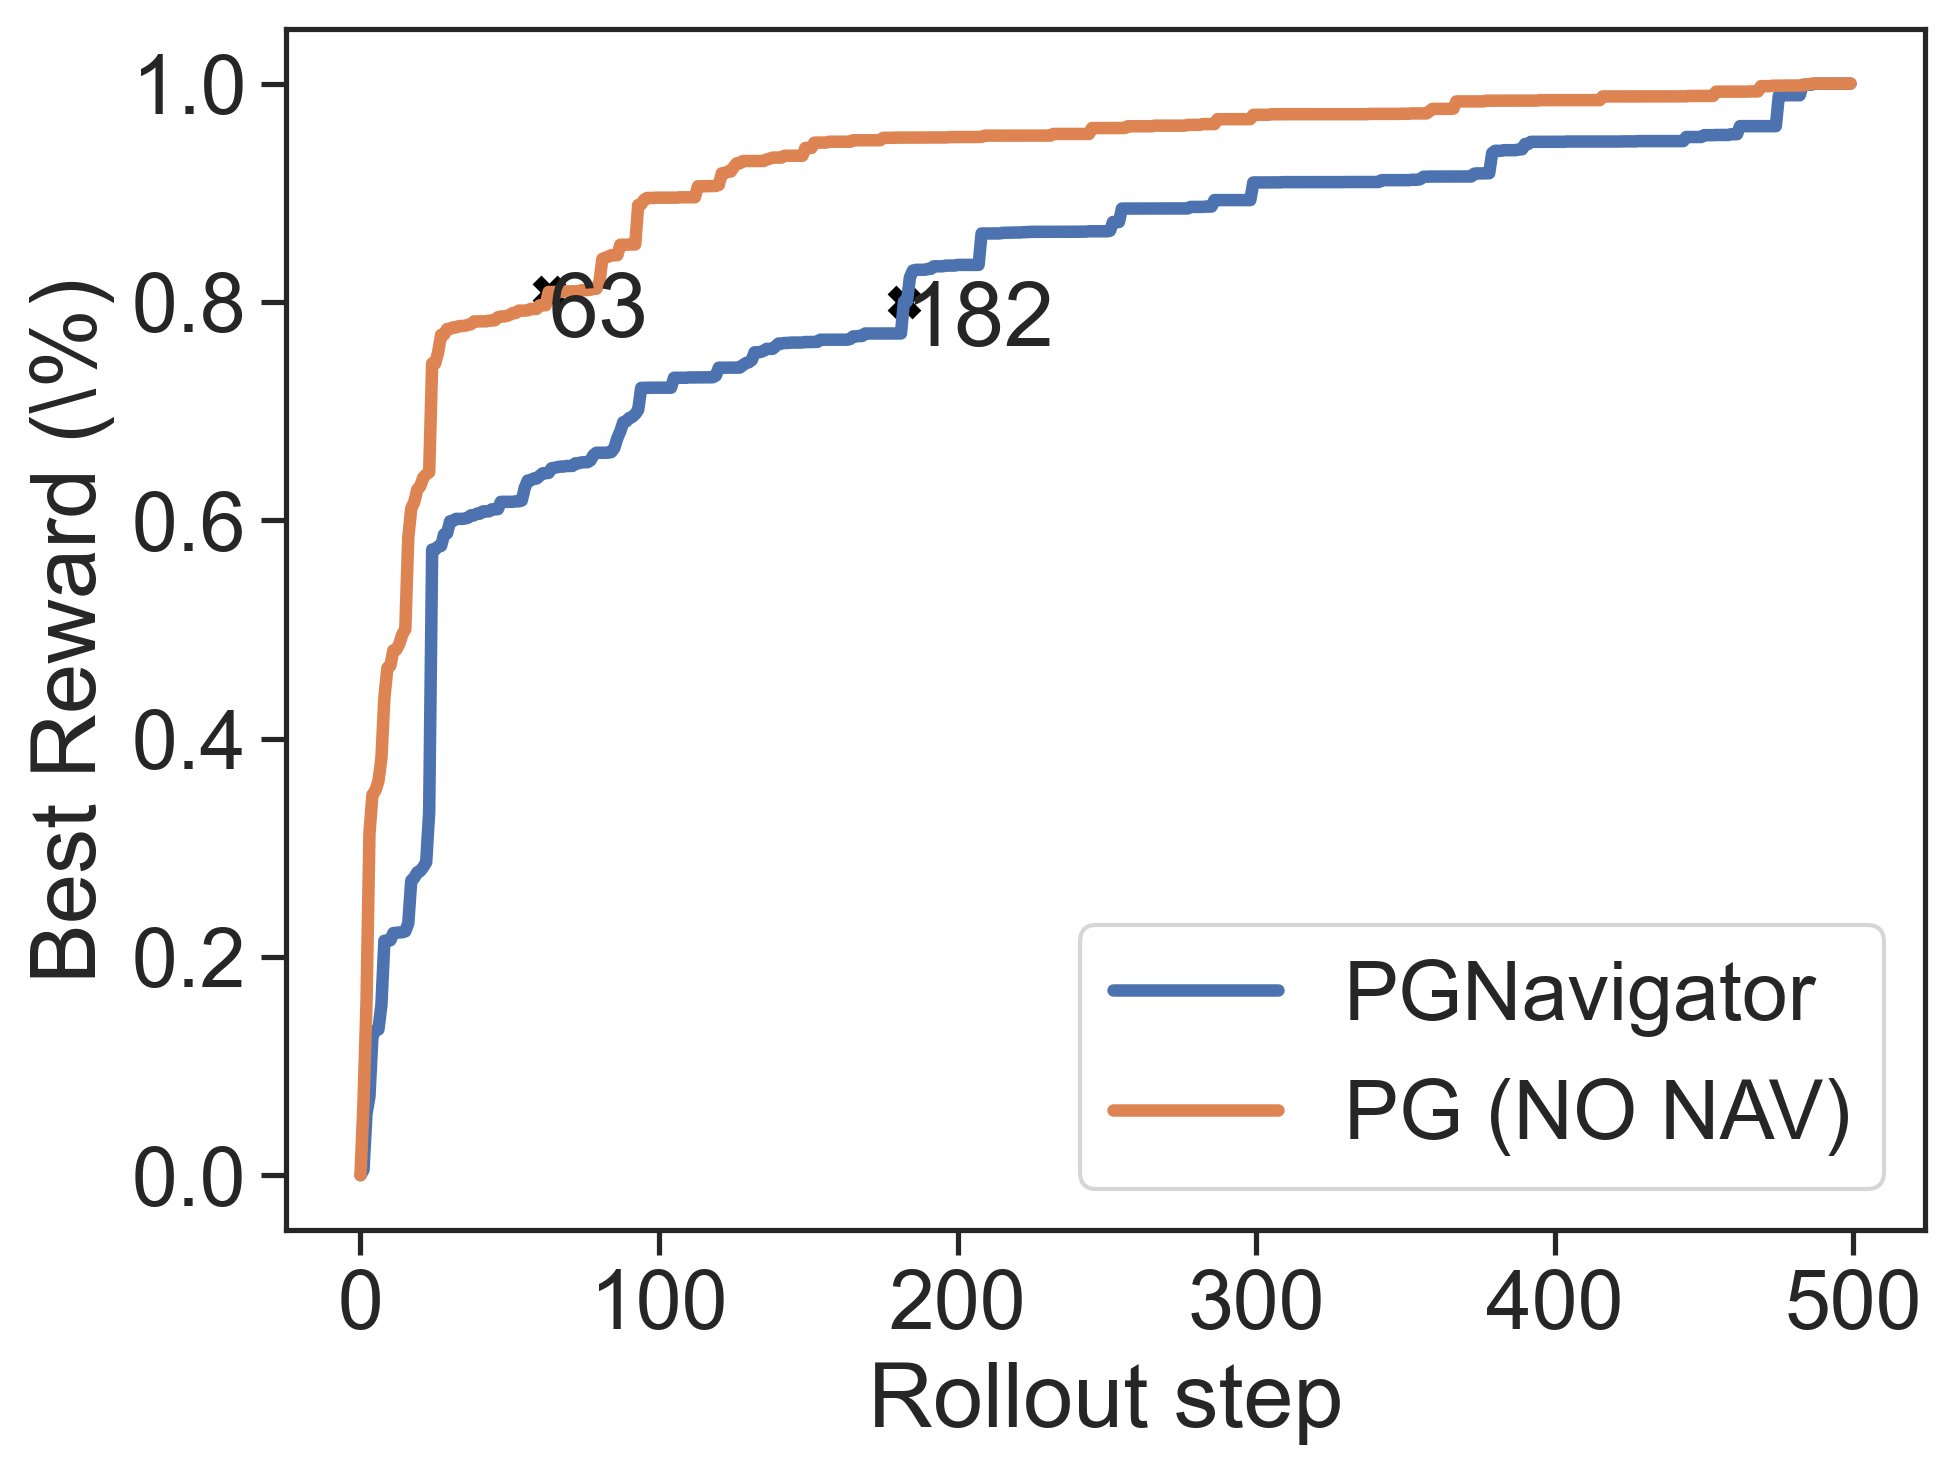

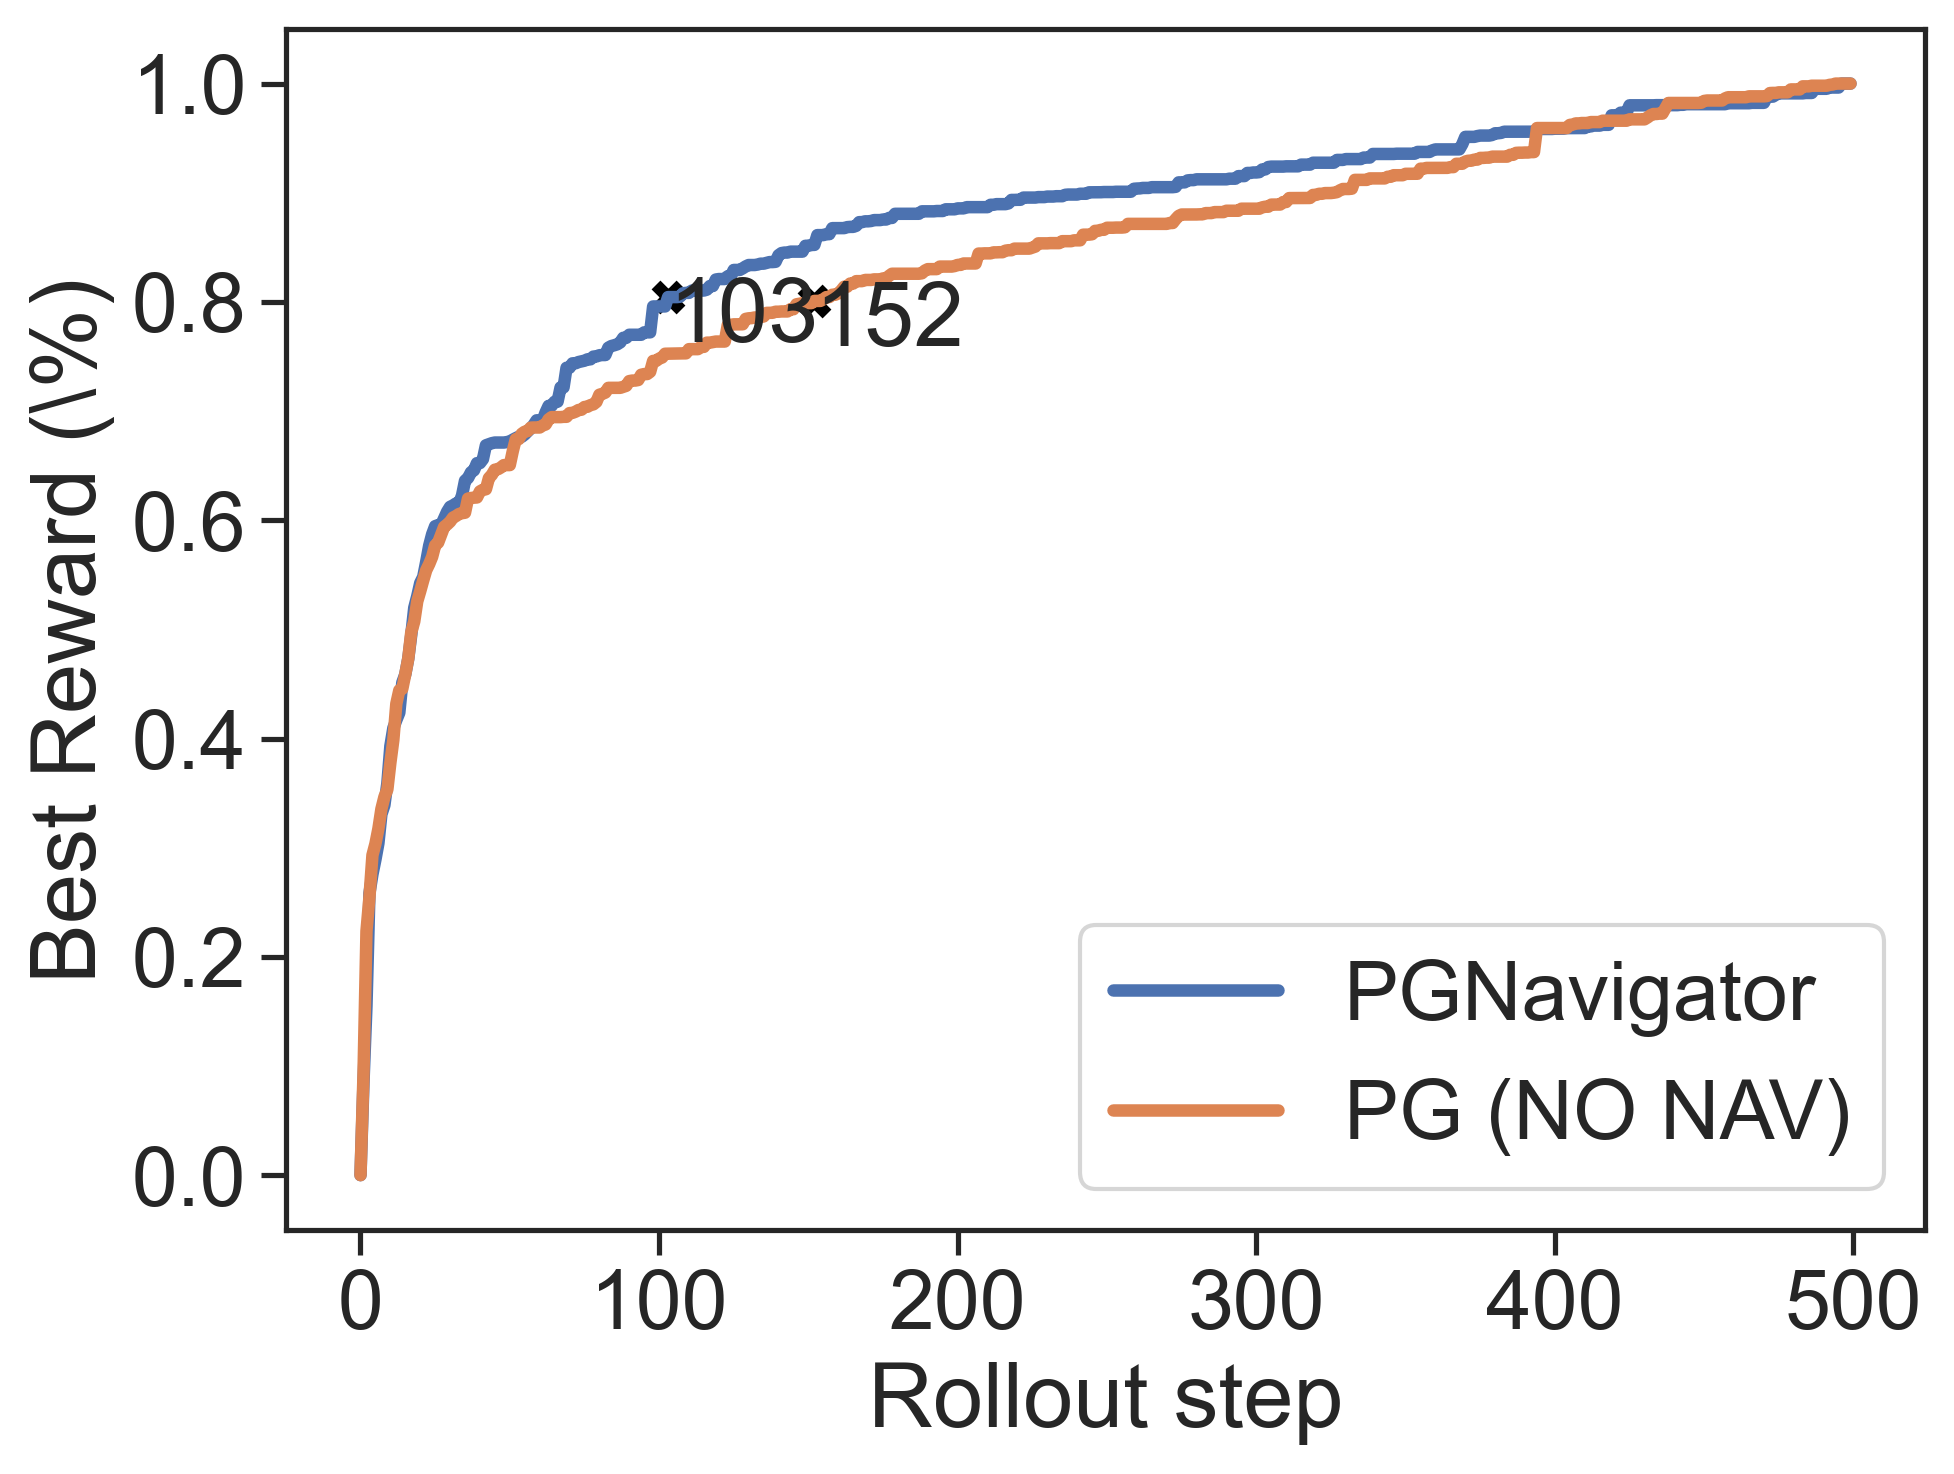

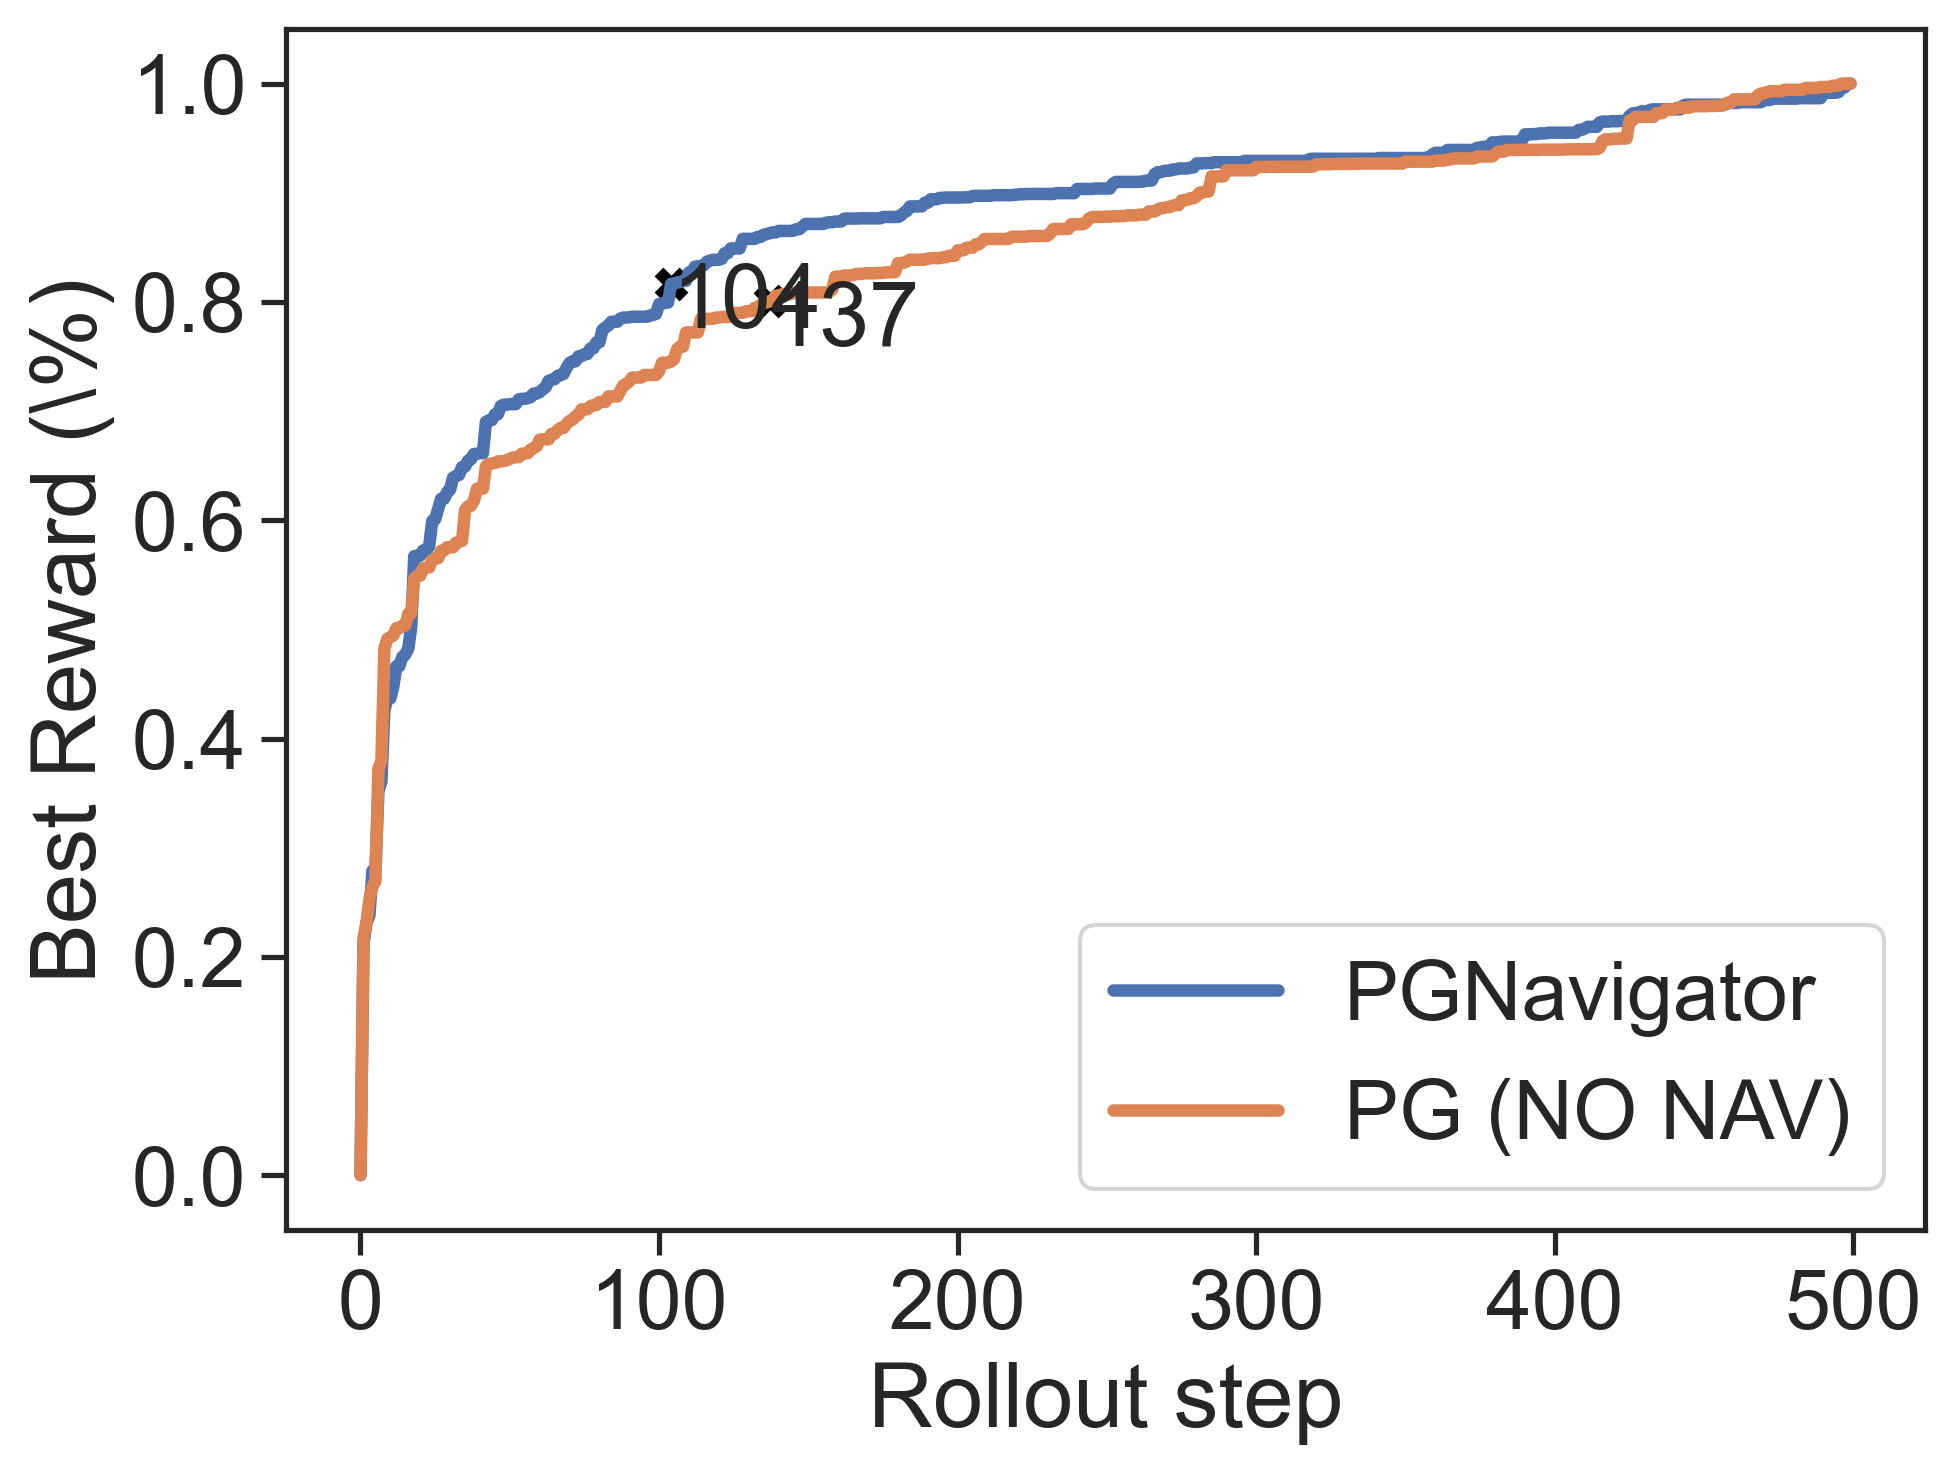

Not found: []


In [170]:
# seconds
training_runtimes = {
    # simulate_v1, simulate_v2, wikipedia, reddit
    "TGAT": [5.0, 6.1, 93, 627.23],
    "TGN": [18.1, 4.2, 84.7, 614],
}



candidate_scores_path = results_path / "candidate_scores"
globs = {
    # XTG, ATTN, PBONE, PG, XTG-D
    k: v
    for k, v in zip(
        ["xtg-og", "xtg-non", "xtg", "xtg-d"],
        [
            "{model}_{dataset}*pg_true*_th25*",
            "{model}_{dataset}*pg_false*_th25*",
            # "{model}_{dataset}*mlp_true*_th25*",
            # '{model}_{dataset}*_attn*',
            # '{model}_{dataset}*_pbone*',
            # '{model}_{dataset}*_pg*',
            # "{model}_{dataset}*dot_true*_th25*",
        ],
    )
}

model = "tgat"
# model = "tgn"
not_found = []
# fig, axs = plt.subplots(2, 2, figsize=(8, 8))
sns.set_style("ticks")
for dataset in ["simulate_v1", "simulate_v2", "wikipedia", "reddit"]:
    for explainer in globs:
        try:
            glob = candidate_scores_path.glob(
                globs[explainer].format(model=model, dataset=dataset)
            )

            # collate stats for all runs
            arrs = [pd.read_csv(g) for g in glob]
            
            mat = [arr["best_reward"].to_numpy() for arr in arrs]
            
            mat = np.array(mat).mean(axis=0)
            # normalize
            mat = (mat - mat.min()) / (mat.max() - mat.min())
            index = np.argmax(mat >= 0.8)
            
            plt.plot(mat, label=labels[explainer])
            plt.scatter(index, mat[index], marker="x", color="black")
            
            plt.text(index, mat[index]-0.04, f"{index}")
            # plt.axhline(y=mat[index], color='r', linestyle='dotted')  # draw horizontal line
            # plt.axvline(x=index, color='r', linestyle='dotted')  # draw vertical line

            plt.xlabel("Rollout step")
            plt.ylabel("Best Reward (\%)")

        except (KeyError, StopIteration):
            not_found.append(f"{explainer}_{dataset}")
            continue
    # plt.title(dataset_to_index[dataset])
    plt.legend()
    plt.savefig(f"plots/{model}_misc_rollout_plot_{dataset}.png")
    plt.show()
print("Not found:", not_found)


In [156]:
candidate_scores_path = results_path / "candidate_scores"
globs = {
    # XTG, ATTN, PBONE, PG, XTG-D
    k: v
    for k, v in zip(
        ["xtg-og", "xtg-non", "xtg", "xtg-d", "attn", "pbone", "pg"],
        [
            "{model}_{dataset}*pg_true*_th20*",
            "{model}_{dataset}*pg_false*_th20*",
            "{model}_{dataset}*mlp_true*_th20*",
            "{model}_{dataset}*dot_true*_th20*",
            "{model}_{dataset}_attn*_th20_can*",
            "{model}_{dataset}_pbone*_th20_can*",
            "{model}_{dataset}_pg*_th20_can*",
        ],
    )
}

# model = "tgat"
model = "tgn"
not_found = []
runtime_df = {}
for explainer in globs:
    runtime_df[explainer] = {}
    for dataset in ["simulate_v1", "simulate_v2", "wikipedia", "reddit"]:
        try:
            glob = candidate_scores_path.glob(
                globs[explainer].format(model=model, dataset=dataset)
            )

            # collate stats for all runs
            arrs = [pd.read_csv(g) for g in glob]

            # only get the last value (since in the mcts algos the values are cumulative whilst for the rest its duplicated across all)
            mat = [arr["runtime"].to_numpy()[-1] for arr in arrs]

            mat = np.mean(mat)
            runtime_df[explainer][dataset] = mat
        
        except (KeyError, StopIteration):
            not_found.append(f"{explainer}_{dataset}")
            continue
print("Not found:", not_found)

runtime_df = pd.DataFrame.from_dict(runtime_df, orient="columns").T
runtime_df = runtime_df.rename(labels, inplace=False).rename(
    dataset_to_index, axis=1, inplace=False
)

runtime_df = runtime_df.loc[["ATTN", "PBONE", "PG", "THEIRS", "THEIRS (NO NAV)", "OURS", "OURS (DOT)"]]
latex = runtime_df.style.format(precision=3).to_latex(
    convert_css=True, multicol_align="c", hrules=True, column_format="lrrrrrrrr"
).replace(r'\end{tabular}', r'\end{tabular}' + f'\n\\caption{{\\label{{tab:{model}_runtime_single}}Runtime comparison for a single explanation with {model.upper()} base model (in seconds).}}')

with open(f"{model}_runtime_single_tab.tex", "w") as f:
    f.write(latex)
print(latex)

Not found: []


KeyError: "['THEIRS', 'THEIRS (NO NAV)', 'OURS', 'OURS (DOT)'] not in index"